Floors_in_the_building
-1.0        2
 1.0      380
 2.0      553
 3.0      933
 4.0     3239
 5.0     9687
 6.0     1192
 7.0      866
 8.0     1462
 9.0     5833
 10.0    2596
 11.0    1643
 12.0    2287
 13.0     954
 14.0    2984
 15.0    1669
 16.0    1865
 17.0     910
 18.0     946
 19.0     176
 20.0     116
 21.0      85
 22.0     216
 23.0      91
 24.0      22
 25.0      14
 26.0       7
 28.0       1
 30.0       1
 32.0       3
Name: count, dtype: int64


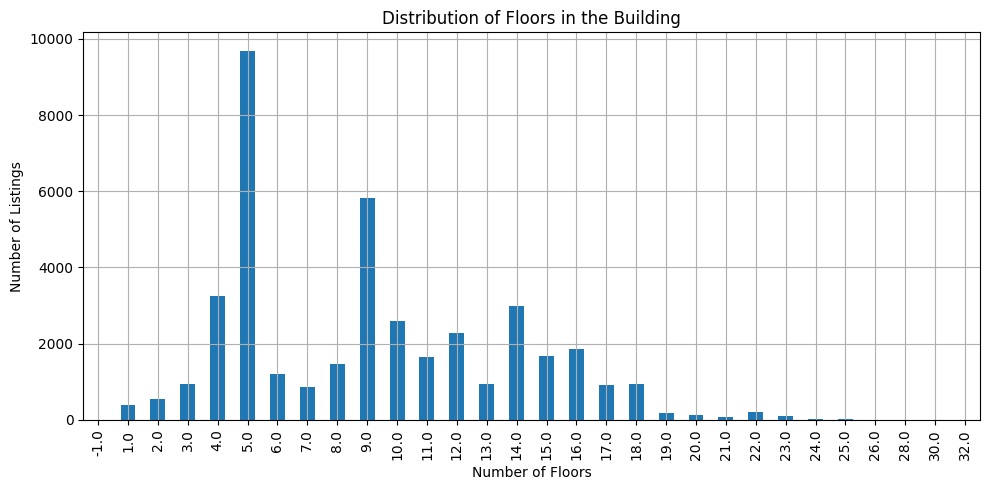

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
train_df = pd.read_csv('datasets/summative/apartment_for_rent_train.csv')
test_df = pd.read_csv("datasets/summative/apartment_for_rent_test_edited.csv")

# Align columns (keep only common ones)
common_cols = train_df.columns.intersection(test_df.columns)
train_df_aligned = train_df[common_cols]
test_df_aligned = test_df[common_cols]

# Merge them
merged_df = pd.concat([train_df_aligned, test_df_aligned], ignore_index=True)
df = merged_df.copy()

# Clean column name if needed
df.columns = df.columns.str.strip()  # removes whitespace

# View unique values and their counts
floor_counts = df['Floors_in_the_building'].value_counts().sort_index()
print(floor_counts)

# Optional: visualize the distribution
plt.figure(figsize=(10, 5))
floor_counts.plot(kind='bar')
plt.title('Distribution of Floors in the Building')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# Convert All Column Names to Lowercase
df.columns = df.columns.str.lower()

In [4]:
# Convert to Monthly Rent
def convert_to_monthly_rent(row):
    if row['duration'] == 'daily':
        return row['price'] * 365 / 12
    elif row['duration']== 'monthly':
        return row['price'] 
    else:
        return None

In [5]:
df['monthly_price'] = df.apply(convert_to_monthly_rent, axis=1)

In [6]:
df

reg_id  gender  age construction_type  new_construction  elevator  \
0           3    Male   60             Stone               0.0       0.0   
1           2  Female   51             Stone               0.0       0.0   
2           2    Male   20             Stone               0.0       0.0   
3           7  Female   57               NaN               0.0       0.0   
4           4  Female   43             Stone               1.0       1.0   
...       ...     ...  ...               ...               ...       ...   
40729       1  Female   48          Monolith               1.0       1.0   
40730       1  Female   49          Monolith               1.0       1.0   
40731       1  Female   25             Stone               0.0       1.0   
40732       1  Female   53            Panels               0.0       1.0   
40733       1    Male   70            Panels               0.0       1.0   

       floors_in_the_building  floor_area  number_of_rooms  \
0                         5.0        41.0              2.0   
1                         5.0        76.0              4.0   
2                         5.0        78.0              3.0   
3                        -1.0         NaN              0.0   
4                        12.0        40.0              1.0   
...                       ...         ...              ...   
40729                    11.0        85.0              3.0   
40730                     9.0       130.0              4.0   
40731                     4.0       170.0              8.0   
40732                     9.0        51.0              2.0   
40733                     9.0        54.0              2.0   

       number_of_bathrooms  ...  utility_payments  \
0                      1.0  ...              10.0   
1                      1.0  ...              10.0   
2                      1.0  ...              10.0   
3                      0.0  ...               0.0   
4                      1.0  ...               0.0   
...                    ...  ...               ...   
40729                  1.0  ...               0.0   
40730                  2.0  ...              10.0   
40731                  2.0  ...               0.0   
40732                  1.0  ...              11.0   
40733                  1.0  ...              11.0   

                                  address      price currency duration  \
0                       Ararat › Artashat    20000.0      AMD    daily   
1                    Armavir › Echmiadzin   270000.0      AMD  monthly   
2                    Armavir › Echmiadzin   160000.0      AMD  monthly   
3             Lernagorts Street, Vardenis    80000.0      AMD  monthly   
4      Antarayin 1st blok 10, Tsaghkadzor    20000.0      AMD    daily   
...                                   ...        ...      ...      ...   
40729             Amiryan Street, Yerevan     2000.0      USD  monthly   
40730        Նիկողայոս Ադոնց փողոց, Երևան  1000000.0      AMD  monthly   
40731              Teryan street, Yerevan     2990.0      USD  monthly   
40732             Amiryan Street, Yerevan    25000.0      AMD    daily   
40733            Tumanyan street, Yerevan    25000.0      AMD    daily   

         datetime  amenities  appliances parking   monthly_price  
0      24/11/2022       none        none    none   608333.333333  
1      24/11/2022       none        none    none   270000.000000  
2      15/12/2022       none        none    none   160000.000000  
3      15/12/2022       none        none    none    80000.000000  
4      24/11/2022       none        none    none   608333.333333  
...           ...        ...         ...     ...             ...  
40729  24/11/2022       none        none    none     2000.000000  
40730  24/11/2022       none        none    none  1000000.000000  
40731  24/11/2022       none        none    none     2990.000000  
40732  24/11/2022       none        none    none   760416.666667  
40733  24/11/2022       none        none    none   760416.666667  

[40734 rows x 27 c

In [7]:
# Convert to USD (from other currencies)
exchange_rates = { 'USD': 1.00,
                  'EUR': 1.10,
                  'RUB': 0.013,
                  'AMD': 0.0026
                 }
# Map rates ti each row
df['exchange_rate'] = df['currency'].map(exchange_rates)

# Multiply to get USD rent
df['monthly_price_usd'] = df['monthly_price'] * df['exchange_rate']

In [8]:
df

reg_id  gender  age construction_type  new_construction  elevator  \
0           3    Male   60             Stone               0.0       0.0   
1           2  Female   51             Stone               0.0       0.0   
2           2    Male   20             Stone               0.0       0.0   
3           7  Female   57               NaN               0.0       0.0   
4           4  Female   43             Stone               1.0       1.0   
...       ...     ...  ...               ...               ...       ...   
40729       1  Female   48          Monolith               1.0       1.0   
40730       1  Female   49          Monolith               1.0       1.0   
40731       1  Female   25             Stone               0.0       1.0   
40732       1  Female   53            Panels               0.0       1.0   
40733       1    Male   70            Panels               0.0       1.0   

       floors_in_the_building  floor_area  number_of_rooms  \
0                         5.0        41.0              2.0   
1                         5.0        76.0              4.0   
2                         5.0        78.0              3.0   
3                        -1.0         NaN              0.0   
4                        12.0        40.0              1.0   
...                       ...         ...              ...   
40729                    11.0        85.0              3.0   
40730                     9.0       130.0              4.0   
40731                     4.0       170.0              8.0   
40732                     9.0        51.0              2.0   
40733                     9.0        54.0              2.0   

       number_of_bathrooms  ...      price  currency duration    datetime  \
0                      1.0  ...    20000.0       AMD    daily  24/11/2022   
1                      1.0  ...   270000.0       AMD  monthly  24/11/2022   
2                      1.0  ...   160000.0       AMD  monthly  15/12/2022   
3                      0.0  ...    80000.0       AMD  monthly  15/12/2022   
4                      1.0  ...    20000.0       AMD    daily  24/11/2022   
...                    ...  ...        ...       ...      ...         ...   
40729                  1.0  ...     2000.0       USD  monthly  24/11/2022   
40730                  2.0  ...  1000000.0       AMD  monthly  24/11/2022   
40731                  2.0  ...     2990.0       USD  monthly  24/11/2022   
40732                  1.0  ...    25000.0       AMD    daily  24/11/2022   
40733                  1.0  ...    25000.0       AMD    daily  24/11/2022   

      amenities  appliances  parking   monthly_price exchange_rate  \
0          none        none     none   608333.333333        0.0026   
1          none        none     none   270000.000000        0.0026   
2          none        none     none   160000.000000        0.0026   
3          none        none     none    80000.000000        0.0026   
4          none        none     none   608333.333333        0.0026   
...         ...         ...      ...             ...           ...   
40729      none        none     none     2000.000000        1.0000   
40730      none        none     none  1000000.000000        0.0026   
40731      none        none     none     2990.000000        1.0000   
40732      none        none     none   760416.666667        0.0026   
40733      none        none     none   760416.666667        0.0026   

       monthly_price_usd  
0            1581.666667  
1             702.000000  
2             416.000000  
3             208.000000  
4            1581.666667  
...                  ...  
40729        2000.000000  
40730        2600.000000  
40731        2990.000000  
40732        1977.083333  
40733        1977.083333  

[40734 rows x 29 columns]

In [9]:
 # Function to Show Unique Values in a Column
def show_unique_values(df, column_name):
    if column_name in df.columns:
        unique_vals = set(df[column_name].dropna().unique())
        print(f"Unique values in '{column_name}':")
        print(unique_vals)
    else: 
        print(f"Column '{column_name}' not found in DataFrame.")

In [10]:
discrete_fields = [
    'gender', 'construction_type', 'elevator', 'balcony',
    'number_of_rooms', 'number_of_bathrooms', 'floor',
    'furniture', 'parking', 'renovation', 'duration',
    'amenities', 'appliances', 'children_are_welcome',
    'pets_allowed', 'utility_payments'
]

In [11]:
for col in discrete_fields:
    show_unique_values(df, col)

Unique values in 'gender':
{'Male', 'Female'}
Unique values in 'construction_type':
{'Panels', 'cassette', 'panels', 'monolith', 'Monolith', 'wooden', 'Wooden', 'Bricks', 'Cassette', 'stone', 'bricks', 'Stone'}
Unique values in 'elevator':
{0.0, 1.0}
Unique values in 'balcony':
{'Open balcony', 'Multiple balconies', 'open_balcony', '0', 'closed_balcony', 'not_available', 'Not available', 'multiple_balconies', 'Closed balcony'}
Unique values in 'number_of_rooms':
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}
Unique values in 'number_of_bathrooms':
{0.0, 1.0, 2.0, 3.0}
Unique values in 'floor':
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0}
Unique values in 'furniture':
{'1', 'By agreement', '0', 'partial_furniture', 'Partial Furniture', 'Not available', 'Available', '2'}
Unique values in 'parking':
{'outdoor_parking,_covered_parking', 'none', 'covered_parking,_garage', 'covered_parking', 'garage', 'none ',

In [12]:
# String Cleaning Function
# replace space with _, remove leading and tailing space and _
def clean_str(val):
    if pd.isna(val):
        return val
    return str(val).strip().lower().replace(" ", "_").strip("_")

In [13]:
columns_to_clean = [
    'gender', 'construction_type', 'balcony', 'furniture',
    'parking', 'renovation', 'duration'
]
for col in columns_to_clean:
    df[col] = df[col].apply(clean_str)

In [14]:
df

reg_id  gender  age construction_type  new_construction  elevator  \
0           3    male   60             stone               0.0       0.0   
1           2  female   51             stone               0.0       0.0   
2           2    male   20             stone               0.0       0.0   
3           7  female   57               NaN               0.0       0.0   
4           4  female   43             stone               1.0       1.0   
...       ...     ...  ...               ...               ...       ...   
40729       1  female   48          monolith               1.0       1.0   
40730       1  female   49          monolith               1.0       1.0   
40731       1  female   25             stone               0.0       1.0   
40732       1  female   53            panels               0.0       1.0   
40733       1    male   70            panels               0.0       1.0   

       floors_in_the_building  floor_area  number_of_rooms  \
0                         5.0        41.0              2.0   
1                         5.0        76.0              4.0   
2                         5.0        78.0              3.0   
3                        -1.0         NaN              0.0   
4                        12.0        40.0              1.0   
...                       ...         ...              ...   
40729                    11.0        85.0              3.0   
40730                     9.0       130.0              4.0   
40731                     4.0       170.0              8.0   
40732                     9.0        51.0              2.0   
40733                     9.0        54.0              2.0   

       number_of_bathrooms  ...      price  currency duration    datetime  \
0                      1.0  ...    20000.0       AMD    daily  24/11/2022   
1                      1.0  ...   270000.0       AMD  monthly  24/11/2022   
2                      1.0  ...   160000.0       AMD  monthly  15/12/2022   
3                      0.0  ...    80000.0       AMD  monthly  15/12/2022   
4                      1.0  ...    20000.0       AMD    daily  24/11/2022   
...                    ...  ...        ...       ...      ...         ...   
40729                  1.0  ...     2000.0       USD  monthly  24/11/2022   
40730                  2.0  ...  1000000.0       AMD  monthly  24/11/2022   
40731                  2.0  ...     2990.0       USD  monthly  24/11/2022   
40732                  1.0  ...    25000.0       AMD    daily  24/11/2022   
40733                  1.0  ...    25000.0       AMD    daily  24/11/2022   

      amenities  appliances  parking   monthly_price exchange_rate  \
0          none        none     none   608333.333333        0.0026   
1          none        none     none   270000.000000        0.0026   
2          none        none     none   160000.000000        0.0026   
3          none        none     none    80000.000000        0.0026   
4          none        none     none   608333.333333        0.0026   
...         ...         ...      ...             ...           ...   
40729      none        none     none     2000.000000        1.0000   
40730      none        none     none  1000000.000000        0.0026   
40731      none        none     none     2990.000000        1.0000   
40732      none        none     none   760416.666667        0.0026   
40733      none        none     none   760416.666667        0.0026   

       monthly_price_usd  
0            1581.666667  
1             702.000000  
2             416.000000  
3             208.000000  
4            1581.666667  
...                  ...  
40729        2000.000000  
40730        2600.000000  
40731        2990.000000  
40732        1977.083333  
40733        1977.083333  

[40734 rows x 29 columns]

In [15]:
for col in discrete_fields:
    show_unique_values(df, col)

Unique values in 'gender':
{'female', 'male'}
Unique values in 'construction_type':
{'cassette', 'panels', 'monolith', 'wooden', 'stone', 'bricks'}
Unique values in 'elevator':
{0.0, 1.0}
Unique values in 'balcony':
{'open_balcony', '0', 'not_available', 'multiple_balconies', 'closed_balcony'}
Unique values in 'number_of_rooms':
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}
Unique values in 'number_of_bathrooms':
{0.0, 1.0, 2.0, 3.0}
Unique values in 'floor':
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0}
Unique values in 'furniture':
{'available', '1', '0', 'partial_furniture', 'not_available', 'by_agreement', '2'}
Unique values in 'parking':
{'outdoor_parking,_covered_parking', 'none', 'covered_parking,_garage', 'covered_parking', 'garage', 'outdoor_parking', 'outdoor_parking,_covered_parking,_garage', 'outdoor_parking,_garage'}
Unique values in 'renovation':
{'major_renovation', 'euro_renovation', 'old

In [16]:
df

reg_id  gender  age construction_type  new_construction  elevator  \
0           3    male   60             stone               0.0       0.0   
1           2  female   51             stone               0.0       0.0   
2           2    male   20             stone               0.0       0.0   
3           7  female   57               NaN               0.0       0.0   
4           4  female   43             stone               1.0       1.0   
...       ...     ...  ...               ...               ...       ...   
40729       1  female   48          monolith               1.0       1.0   
40730       1  female   49          monolith               1.0       1.0   
40731       1  female   25             stone               0.0       1.0   
40732       1  female   53            panels               0.0       1.0   
40733       1    male   70            panels               0.0       1.0   

       floors_in_the_building  floor_area  number_of_rooms  \
0                         5.0        41.0              2.0   
1                         5.0        76.0              4.0   
2                         5.0        78.0              3.0   
3                        -1.0         NaN              0.0   
4                        12.0        40.0              1.0   
...                       ...         ...              ...   
40729                    11.0        85.0              3.0   
40730                     9.0       130.0              4.0   
40731                     4.0       170.0              8.0   
40732                     9.0        51.0              2.0   
40733                     9.0        54.0              2.0   

       number_of_bathrooms  ...      price  currency duration    datetime  \
0                      1.0  ...    20000.0       AMD    daily  24/11/2022   
1                      1.0  ...   270000.0       AMD  monthly  24/11/2022   
2                      1.0  ...   160000.0       AMD  monthly  15/12/2022   
3                      0.0  ...    80000.0       AMD  monthly  15/12/2022   
4                      1.0  ...    20000.0       AMD    daily  24/11/2022   
...                    ...  ...        ...       ...      ...         ...   
40729                  1.0  ...     2000.0       USD  monthly  24/11/2022   
40730                  2.0  ...  1000000.0       AMD  monthly  24/11/2022   
40731                  2.0  ...     2990.0       USD  monthly  24/11/2022   
40732                  1.0  ...    25000.0       AMD    daily  24/11/2022   
40733                  1.0  ...    25000.0       AMD    daily  24/11/2022   

      amenities  appliances  parking   monthly_price exchange_rate  \
0          none        none     none   608333.333333        0.0026   
1          none        none     none   270000.000000        0.0026   
2          none        none     none   160000.000000        0.0026   
3          none        none     none    80000.000000        0.0026   
4          none        none     none   608333.333333        0.0026   
...         ...         ...      ...             ...           ...   
40729      none        none     none     2000.000000        1.0000   
40730      none        none     none  1000000.000000        0.0026   
40731      none        none     none     2990.000000        1.0000   
40732      none        none     none   760416.666667        0.0026   
40733      none        none     none   760416.666667        0.0026   

       monthly_price_usd  
0            1581.666667  
1             702.000000  
2             416.000000  
3             208.000000  
4            1581.666667  
...                  ...  
40729        2000.000000  
40730        2600.000000  
40731        2990.000000  
40732        1977.083333  
40733        1977.083333  

[40734 rows x 29 columns]

In [17]:
#1. Descriptive Statistics (Quantiles)
print(df['monthly_price_usd'].describe(percentiles=[.90, .95, .98, .99, .999]))

count    4.073200e+04
mean     3.626987e+03
std      1.861072e+05
min      2.080000e-01
50%      1.200000e+03
90%      2.200000e+03
95%      2.767917e+03
98%      3.600000e+03
99%      4.562500e+03
99.9%    3.853800e+05
max      2.650000e+07
Name: monthly_price_usd, dtype: float64


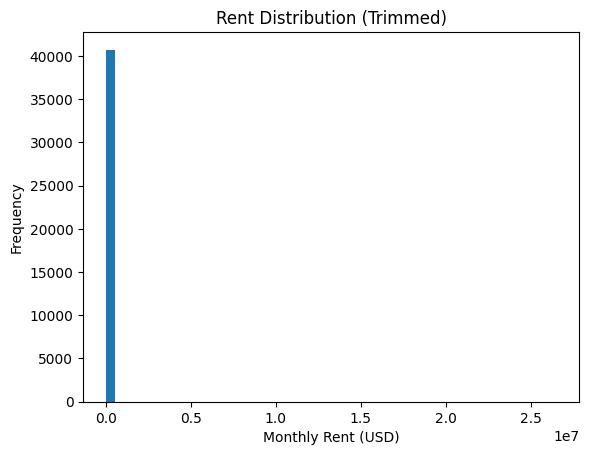

In [18]:
#2. Histogram
# See the shape of rent distribution:
import matplotlib.pyplot as plt

plt.hist(df['monthly_price_usd'], bins=50)
# plt.xlim(0, 5000)  # Adjust this based on your data
plt.title('Rent Distribution (Trimmed)')
plt.xlabel('Monthly Rent (USD)')
plt.ylabel('Frequency')
plt.show()



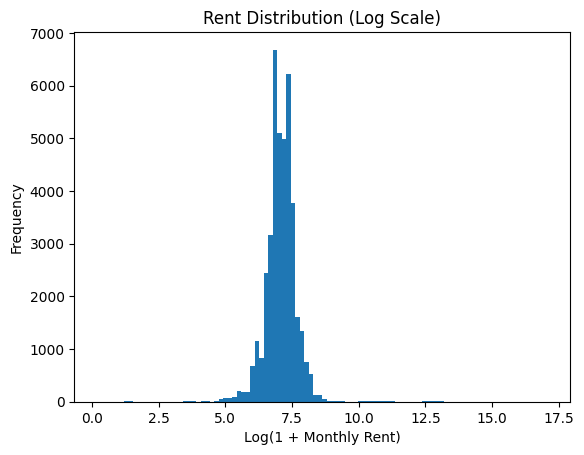

In [19]:
import numpy as np

plt.hist(np.log1p(df['monthly_price_usd']), bins=100)
plt.title('Rent Distribution (Log Scale)')
plt.xlabel('Log(1 + Monthly Rent)')
plt.ylabel('Frequency')
plt.show()


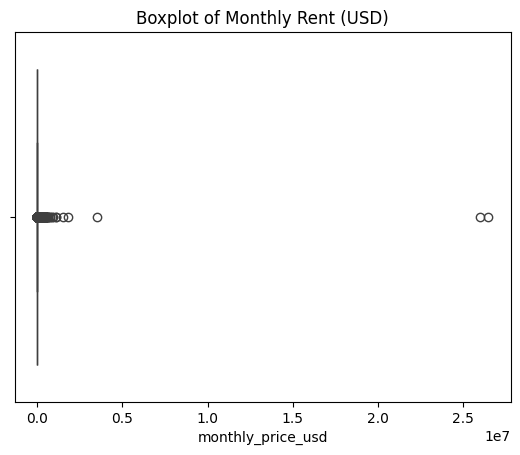

In [20]:
# 3. Boxplot (Detect Outliers Visually)
# Boxplots highlight IQR, outliers, and skew:
import seaborn as sns

sns.boxplot(x=df['monthly_price_usd'])
plt.title('Boxplot of Monthly Rent (USD)')
plt.show()


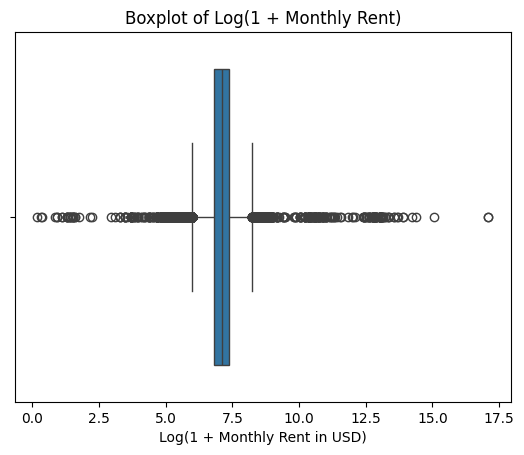

In [21]:
import numpy as np
sns.boxplot(x=np.log1p(df['monthly_price_usd']))
plt.title('Boxplot of Log(1 + Monthly Rent)')
plt.xlabel('Log(1 + Monthly Rent in USD)')
plt.show()


In [22]:
df['log_price'] = np.log1p(df['monthly_price_usd'])

Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

# Report how many rows were removed
rows_removed = len(df) - len(df_filtered)
print(f"Rows removed by IQR filtering: {rows_removed}")
print(f"Remaining rows: {len(df_filtered)}")


Rows removed by IQR filtering: 2019
Remaining rows: 38715


In [23]:
df = df_filtered.copy()

In [24]:
print(df['monthly_price_usd'].describe(percentiles=[.25, .75, .90, .95, .98, .99, .999]))

count    38715.000000
mean      1341.244350
std        589.245642
min        395.416667
25%        910.000000
50%       1200.000000
75%       1600.000000
90%       2080.000000
95%       2500.000000
98%       3000.000000
99%       3248.938333
99.9%     3650.000000
max       3700.000000
Name: monthly_price_usd, dtype: float64


In [76]:
# Mean price for each value of field
# Clean up leading/trailing spcaes and lower-case for comparison
def print_field_statistic(df, field):
    df[f"{field}_cleaned"] = df[field].astype(str).str.strip().str.lower()

    # Group by the cleaned balcony values and calculate mean price
    grouped = df.groupby(f"{field}_cleaned")['monthly_price_usd']
    
    summary = grouped.agg(
        mean='mean', 
        median='median', 
        min='min', 
        max='max', 
        std='std', 
        iqr=lambda x: x.quantile(0.75) - x.quantile(0.25), 
        count='count'
    )
    # Calculate SE and CI95
    summary['se'] = summary['std'] / np.sqrt(summary['count'])
    summary['ci95'] = 1.96* summary['se']
    
    summary = summary.sort_values(by='mean', ascending=False)

    # Display the results
    # print(summary)
    return summary

In [73]:
print_field_statistic(df, 'monthly_price_usd')

                                  mean       median          min          max  \
monthly_price_usd_cleaned                                                       
3700.0                     3700.000000  3700.000000  3700.000000  3700.000000   
3650.0                     3650.000000  3650.000000  3650.000000  3650.000000   
3640.0                     3640.000000  3640.000000  3640.000000  3640.000000   
3637.8333333333335         3637.833333  3637.833333  3637.833333  3637.833333   
3600.0                     3600.000000  3600.000000  3600.000000  3600.000000   
...                                ...          ...          ...          ...   
429.0                       429.000000   429.000000   429.000000   429.000000   
416.0                       416.000000   416.000000   416.000000   416.000000   
403.0                       403.000000   403.000000   403.000000   403.000000   
400.0                       400.000000   400.000000   400.000000   400.000000   
395.4166666666667           

In [74]:
print_field_statistic(df, 'balcony')

                           mean   median         min          max         std  \
balcony_cleaned                                                                 
multiple_balconies  1578.827543  1500.00  395.416667  3650.000000  723.812827   
open_balcony        1462.519728  1400.00  395.416667  3650.000000  594.159138   
nan                 1460.000000  1460.00  790.833333  2129.166667  946.344575   
not_available       1254.860239  1186.25  395.416667  3700.000000  527.957327   
closed_balcony      1032.338447   910.00  395.416667  3650.000000  461.529362   

                           iqr  count          se         ci95  
balcony_cleaned                                                 
multiple_balconies  960.000000   2495   14.490755    28.401879  
open_balcony        699.833333  18369    4.383894     8.592432  
nan                 669.166667      2  669.166667  1311.566667  
not_available       600.000000  12094    4.800802     9.409573  
closed_balcony      498.000000   5750    6

In [77]:
print_field_statistic(df, 'duration')

mean       median         min     max         std  \
duration_cleaned                                                             
daily             1713.733860  1581.666667  395.416667  3650.0  681.978358   
monthly           1273.879907  1200.000000  400.000000  3700.0  544.231507   

                         iqr  count        se       ci95  
duration_cleaned                                          
daily             942.916667   5928  8.857609  17.360913  
monthly           590.000000  32782  3.005841   5.891448

In [28]:
# Export cleaned DataFrame to CSV
df.to_csv('cleaned_apartment_data.csv', index=False)

In [29]:
#1. Descriptive Statistics (Quantiles)
print(df['monthly_price_usd'].describe(percentiles=[.90, .95, .98, .99, .999]))

count    38715.000000
mean      1341.244350
std        589.245642
min        395.416667
50%       1200.000000
90%       2080.000000
95%       2500.000000
98%       3000.000000
99%       3248.938333
99.9%     3650.000000
max       3700.000000
Name: monthly_price_usd, dtype: float64


In [30]:
# Export cleaned DataFrame to CSV
df.to_csv('cleaned_price_apartment_data.csv', index=False)

In [31]:
print_field_statistic(df, 'balcony')

                           mean       median         min     max         std  \
balcony_cleaned                                                                
multiple_balconies  1578.827543  1500.000000  395.416667  3650.0  723.812827   
nan                 1554.930556  1444.791667  520.000000  3000.0  965.797972   
open_balcony        1462.519728  1400.000000  395.416667  3650.0  594.159138   
not_available       1267.369233  1200.000000  395.416667  3700.0  530.249730   
0                   1208.868162  1100.000000  403.000000  3650.0  516.946326   
closed_balcony      1032.249361   910.000000  395.416667  3650.0  461.538676   

                            iqr  count  
balcony_cleaned                         
multiple_balconies   960.000000   2495  
nan                 1269.895833      6  
open_balcony         699.833333  18369  
not_available        590.000000   9508  
0                    668.000000   2586  
closed_balcony       498.000000   5751  


In [32]:
# Replace '0' with 'not_availble' in balcony
df['balcony'] = df_filtered['balcony'].replace('0', 'not_available')
print(df['balcony'].value_counts())

balcony
open_balcony          18369
not_available         12094
closed_balcony         5751
multiple_balconies     2495
Name: count, dtype: int64


In [33]:
#  Drop rows with number of rooms == 0
df = df[df['number_of_rooms'] != 0]

In [34]:
print(df['number_of_bathrooms'].value_counts())

number_of_bathrooms
1.0    31913
2.0     6237
3.0      559
0.0        3
Name: count, dtype: int64


In [35]:
#  Drop rows with number of bathrooms == 0
df = df[df['number_of_bathrooms'] != 0]

In [36]:
print(df['number_of_bathrooms'].value_counts())

number_of_bathrooms
1.0    31913
2.0     6237
3.0      559
Name: count, dtype: int64


In [37]:
print(df['floor'].value_counts())

floor
2.0     6225
3.0     6110
4.0     5388
5.0     4097
1.0     2873
6.0     2588
7.0     2436
8.0     2211
9.0     1869
10.0    1225
12.0     962
11.0     946
13.0     612
14.0     541
15.0     289
16.0     158
17.0     129
18.0      28
20.0      10
19.0       7
21.0       6
Name: count, dtype: int64


In [38]:
# Check for invalid floor 
invalid_floors = df[df['floor']> df['floors_in_the_building']]
print(invalid_floors[['floor', 'floors_in_the_building']])
print(f"Number of invalid rows: {invalid_floors.shape[0]}")

Empty DataFrame
Columns: [floor, floors_in_the_building]
Index: []
Number of invalid rows: 0


In [39]:
# Furniture
print(df['furniture'].value_counts())

furniture
available            20038
1                     5967
by_agreement           345
not_available          186
partial_furniture      126
2                      107
0                       61
Name: count, dtype: int64


In [41]:
# Print furniture statistics
print_field_statistic(df, 'furniture')

                          mean       median         min     max         std  \
furniture_cleaned                                                             
nan                1429.959059  1300.000000  395.416667  3650.0  585.951163   
available          1330.435313  1200.000000  395.416667  3700.0  588.089785   
1                  1241.949275  1107.166667  403.000000  3650.0  565.651030   
by_agreement       1141.713043  1000.000000  416.000000  3650.0  637.675179   
2                  1120.303738   910.000000  416.000000  3000.0  605.782162   
not_available      1032.397849   910.000000  442.000000  3500.0  538.297034   
0                   905.329235   676.000000  403.000000  2500.0  508.786234   
partial_furniture   797.167328   650.000000  416.000000  3500.0  504.687358   

                          iqr  count  
furniture_cleaned                     
nan                700.000000  11880  
available          671.666667  20038  
1                  650.000000   5967  
by_agreement  

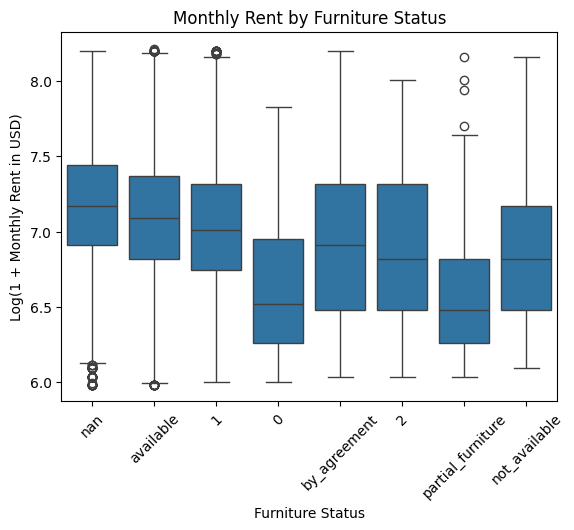

In [42]:
#  Boxplot of Rent by Furniture Type
sns.boxplot(x='furniture_cleaned', y='log_price', data=df)
plt.title('Monthly Rent by Furniture Status')
plt.xlabel('Furniture Status')
plt.ylabel('Log(1 + Monthly Rent in USD)')
plt.xticks(rotation=45)
plt.show()

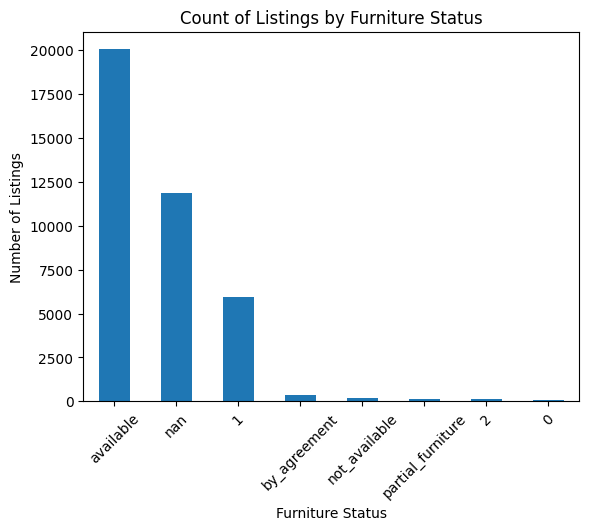

In [43]:
#  Bar Plot of Count per Category
df['furniture_cleaned'].value_counts().plot(kind='bar')
plt.title('Count of Listings by Furniture Status')
plt.xlabel('Furniture Status')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Map 0,1,2 to not_available, available, in_agreement in furniture
furniture_map = {
    '0': 'not_available',
    '1': 'available',
    '2': 'by_agreement'
}
df['furniture'] = df['furniture'].replace(furniture_map)

In [45]:
print_field_statistic(df, 'furniture')

                          mean  median         min     max         std    iqr  \
furniture_cleaned                                                               
nan                1429.959059  1300.0  395.416667  3650.0  585.951163  700.0   
available          1310.131672  1200.0  395.416667  3700.0  584.192773  650.0   
by_agreement       1136.644912   950.0  416.000000  3650.0  629.674648  850.0   
not_available      1001.016532   900.0  403.000000  3500.0  532.976684  600.0   
partial_furniture   797.167328   650.0  416.000000  3500.0  504.687358  390.0   

                   count  
furniture_cleaned         
nan                11880  
available          26005  
by_agreement         452  
not_available        247  
partial_furniture    126  


In [46]:
# Replace missing values with 'available' in furniture
df['furniture'] = df['furniture'].fillna('available')

In [47]:
print_field_statistic(df, 'furniture')

                          mean  median         min     max         std    iqr  \
furniture_cleaned                                                               
available          1347.707213  1200.0  395.416667  3700.0  587.373904  690.0   
by_agreement       1136.644912   950.0  416.000000  3650.0  629.674648  850.0   
not_available      1001.016532   900.0  403.000000  3500.0  532.976684  600.0   
partial_furniture   797.167328   650.0  416.000000  3500.0  504.687358  390.0   

                   count  
furniture_cleaned         
available          37885  
by_agreement         452  
not_available        247  
partial_furniture    126  


In [48]:
print(df['parking'].value_counts())

parking
none                                        31540
outdoor_parking                              1515
outdoor_parking,_covered_parking               80
covered_parking                                66
garage                                         41
outdoor_parking,_garage                        21
outdoor_parking,_covered_parking,_garage       21
covered_parking,_garage                         2
Name: count, dtype: int64


In [49]:
print_field_statistic(df, 'parking')

                                                 mean   median          min  \
parking_cleaned                                                               
outdoor_parking,_covered_parking,_garage  1706.817460  1500.00   910.000000   
none                                      1358.919280  1250.00   395.416667   
outdoor_parking,_covered_parking          1344.909375  1200.00   494.000000   
garage                                    1335.343496  1170.00   520.000000   
nan                                       1303.930520  1186.25   403.000000   
covered_parking                           1297.242424  1200.00   442.000000   
covered_parking,_garage                   1200.000000  1200.00  1100.000000   
outdoor_parking,_garage                   1120.695238   900.00   598.000000   
outdoor_parking                           1106.781903  1000.00   403.000000   

                                                  max         std         iqr  \
parking_cleaned                                  

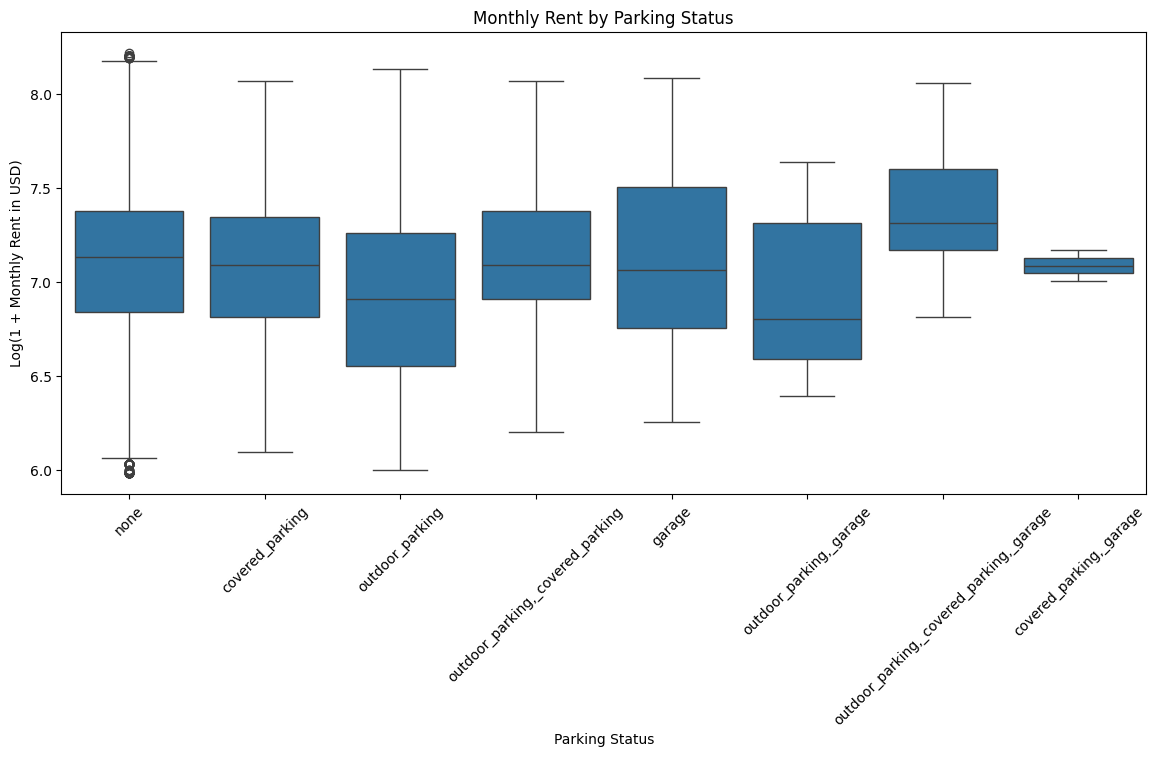

In [50]:
df['parking_wrapped'] = df['parking'].str.replace('_,_', '\n', regex=False)

#  Boxplot of Rent by parking Type
plt.figure(figsize=(14, 6)) 
sns.boxplot(x='parking_wrapped', y='log_price', data=df)
plt.title('Monthly Rent by Parking Status')
plt.xlabel('Parking Status')
plt.ylabel('Log(1 + Monthly Rent in USD)')
plt.xticks(rotation=45)
plt.show()

In [51]:
df['parking'] = df['parking'].fillna('not_specified')

In [52]:
print_field_statistic(df, 'parking')

                                                 mean   median          min  \
parking_cleaned                                                               
outdoor_parking,_covered_parking,_garage  1706.817460  1500.00   910.000000   
none                                      1358.919280  1250.00   395.416667   
outdoor_parking,_covered_parking          1344.909375  1200.00   494.000000   
garage                                    1335.343496  1170.00   520.000000   
not_specified                             1303.930520  1186.25   403.000000   
covered_parking                           1297.242424  1200.00   442.000000   
covered_parking,_garage                   1200.000000  1200.00  1100.000000   
outdoor_parking,_garage                   1120.695238   900.00   598.000000   
outdoor_parking                           1106.781903  1000.00   403.000000   

                                                  max         std         iqr  \
parking_cleaned                                  

In [53]:
def split_multioption_column(df, column_name):
    # replace missing with empty string
    df[column_name] = df[column_name].fillna('')

    # Extract unique options
    all_options = set()
    for entry in df[column_name]:
        options = [opt.strip().strip('_').lower() for opt in entry.split(',') if opt.strip()]
        all_options.update(options)

    # Add binary column for each unique option
    for option in all_options:
        col_name = f"{column_name}_{option}"
        df[col_name] = df[column_name].apply(
            lambda x: int(option in [opt.strip().strip('_').lower() for opt in x.split(',') if opt.strip()])
        )

    return df

In [54]:
print_field_statistic(df, 'parking')

                                                 mean   median          min  \
parking_cleaned                                                               
outdoor_parking,_covered_parking,_garage  1706.817460  1500.00   910.000000   
none                                      1358.919280  1250.00   395.416667   
outdoor_parking,_covered_parking          1344.909375  1200.00   494.000000   
garage                                    1335.343496  1170.00   520.000000   
not_specified                             1303.930520  1186.25   403.000000   
covered_parking                           1297.242424  1200.00   442.000000   
covered_parking,_garage                   1200.000000  1200.00  1100.000000   
outdoor_parking,_garage                   1120.695238   900.00   598.000000   
outdoor_parking                           1106.781903  1000.00   403.000000   

                                                  max         std         iqr  \
parking_cleaned                                  

In [55]:
# df = split_multioption_column(df, 'amenities')
# df = split_multioption_column(df, 'appliances')
df = split_multioption_column(df, 'parking')

In [56]:
df

reg_id  gender  age construction_type  new_construction  elevator  \
0           3    male   60             stone               0.0       0.0   
1           2  female   51             stone               0.0       0.0   
2           2    male   20             stone               0.0       0.0   
4           4  female   43             stone               1.0       1.0   
6           5  female   61            bricks               0.0       0.0   
...       ...     ...  ...               ...               ...       ...   
40729       1  female   48          monolith               1.0       1.0   
40730       1  female   49          monolith               1.0       1.0   
40731       1  female   25             stone               0.0       1.0   
40732       1  female   53            panels               0.0       1.0   
40733       1    male   70            panels               0.0       1.0   

       floors_in_the_building  floor_area  number_of_rooms  \
0                         5.0        41.0              2.0   
1                         5.0        76.0              4.0   
2                         5.0        78.0              3.0   
4                        12.0        40.0              1.0   
6                         4.0       100.0              3.0   
...                       ...         ...              ...   
40729                    11.0        85.0              3.0   
40730                     9.0       130.0              4.0   
40731                     4.0       170.0              8.0   
40732                     9.0        51.0              2.0   
40733                     9.0        54.0              2.0   

       number_of_bathrooms  ...  monthly_price_usd_cleaned  balcony_cleaned  \
0                      1.0  ...         1581.6666666666667     open_balcony   
1                      1.0  ...                      702.0     open_balcony   
2                      1.0  ...                      416.0   closed_balcony   
4                      1.0  ...         1581.6666666666667     open_balcony   
6                      1.0  ...                      520.0     open_balcony   
...                    ...  ...                        ...              ...   
40729                  1.0  ...                     2000.0    not_available   
40730                  2.0  ...                     2600.0    not_available   
40731                  2.0  ...                     2990.0     open_balcony   
40732                  1.0  ...          1977.083333333333    not_available   
40733                  1.0  ...          1977.083333333333    not_available   

      furniture_cleaned parking_cleaned parking_wrapped  parking_none  \
0             available            none            none             1   
1             available            none            none             1   
2             available            none            none             1   
4             available            none            none             1   
6             available            none            none             1   
...                 ...             ...             ...           ...   
40729         available            none            none             1   
40730         available            none            none             1   
40731         available            none            none             1   
40732         available            none            none             1   
40733         available            none            none             1   

       parking_not_specified  parking_covered_parking parking_garage  \
0                          0                        0              0   
1                          0                        0              0   
2                          0                        0              0   
4                          0                        0              0   
6                          0                        0              0   
...                      ...                      ...            ...   
40729              

In [57]:
# Export cleaned DataFrame to CSV
df.to_csv('cleaned_parking_apartment_data.csv', index=False)

In [58]:
print(df['renovation'].value_counts())

renovation
major_renovation       14173
designer_renovation    10868
euro_renovation        10287
cosmetic_renovation     2468
partial_renovation       447
old_renovation           444
no_renovation             22
Name: count, dtype: int64


In [59]:
print(df['duration'].value_counts())

duration
monthly    32782
daily       5928
Name: count, dtype: int64


In [60]:
print(df['amenities'].value_counts())

amenities
none                                                    21772
none                                                     9768
television,_air_conditioner,_internet,_parking_space      722
television,_air_conditioner,_internet                     631
television,_internet                                      344
television,_internet,_parking_space                       214
television                                                122
internet                                                   61
television,_air_conditioner                                56
air_conditioner,_internet                                  27
television,_parking_space                                  22
air_conditioner,_internet,_parking_space                   19
air_conditioner                                            18
television,_air_conditioner,_parking_space                 17
internet,_parking_space                                    13
parking_space                                              1

In [61]:
df = split_multioption_column(df, 'amenities')

In [62]:
# Export cleaned DataFrame to CSV
df.to_csv('cleaned_amenities_apartment_data.csv', index=False)

In [63]:
print(df['appliances'].value_counts())

appliances
none                                                                                       21772
none                                                                                        9768
fridge,_stove,_microwave,_coffee_maker,_washing_machine,_water_heater,_iron,_hair_dryer      208
fridge,_stove,_washing_machine                                                               168
fridge,_stove,_washing_machine,_water_heater                                                 166
                                                                                           ...  
fridge,_stove,_dishwasher,_drying_machine,_iron                                                1
hair_dryer                                                                                     1
fridge,_stove,_dishwasher,_washing_machine,_drying_machine,_iron                               1
fridge,_stove,_microwave,_dishwasher,_drying_machine,_water_heater,_iron,_hair_dryer           1
fridge,_stove,_coff

In [64]:
df = split_multioption_column(df, 'appliances')

In [65]:
# Export cleaned DataFrame to CSV
df.to_csv('cleaned_appliances_apartment_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_appliances_apartment_data.csv'

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_by_category(df, column_name):
    """
    Plots boxplot of monthly_price_usd against a categorical column,
    dropping NaNs in that column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing your data
        column_name (str): Name of the categorical column to plot
    """
    data = df.dropna(subset=[column_name, 'log_price'])
    data = data[data[column_name].astype(str).str.lower() != 'nan'] # Drop string 'nan'
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=column_name, y='log_price', data=data)
    plt.title(f'Log(1 + Monthly Rent in USD) by {column_name.replace("_", " ").title()}')
    plt.xlabel(column_name.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.tight_layout()
    plt.show()

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

def plot_price_vs_category_with_errorbars(df, column_name):
    """
    Plots:
    - Top: Boxplot of log_price vs a categorical column, with red dots for group means
    - Bottom: Mean log_price with 95% CI error bars per group

    Parameters:
        df (pd.DataFrame): Dataset with 'log_price' and the categorical column
        column_name (str): The categorical column to group by (e.g., number of appliances)
    """
    data = df.dropna(subset=[column_name, 'log_price'])
    data = data[data[column_name].astype(str).str.lower() != 'nan']

    grouped = data.groupby(column_name)['log_price']
    means = grouped.mean()
    stds = grouped.std()
    counts = grouped.count()
    
    # 95% Confidence Intervals
    ci95_hi = means + 1.96 * (stds / np.sqrt(counts))
    ci95_lo = means - 1.96 * (stds / np.sqrt(counts))

    fig, axes = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 2]})

    # --- Boxplot with mean dots ---
    sns.boxplot(x=column_name, y='log_price', data=data, ax=axes[0], color='steelblue')
    axes[0].scatter(
        x=means.index,
        y=means.values,
        color='red',
        zorder=5,
        label='Mean'
    )
    axes[0].set_title(f'Boxplot: Price vs {column_name.replace("_", " ").title()}')
    axes[0].set_ylabel("Log(1 + Monthly Rent in USD)")
    axes[0].set_xlabel(column_name.replace("_", " ").title())
    axes[0].legend()

    # --- Error bar plot ---
    axes[1].errorbar(
        means.index, means.values,
        yerr=[means.values - ci95_lo, ci95_hi - means.values],
        fmt='o',
        color='red',
        ecolor='black',
        capsize=5
    )
    axes[1].set_title(f'95% CI for Mean Log Rent by {column_name.replace("_", " ").title()}')
    axes[1].set_ylabel("Mean Log(1 + Monthly Rent in USD)")
    axes[1].set_xlabel(column_name.replace("_", " ").title())

    plt.tight_layout()
    plt.show()


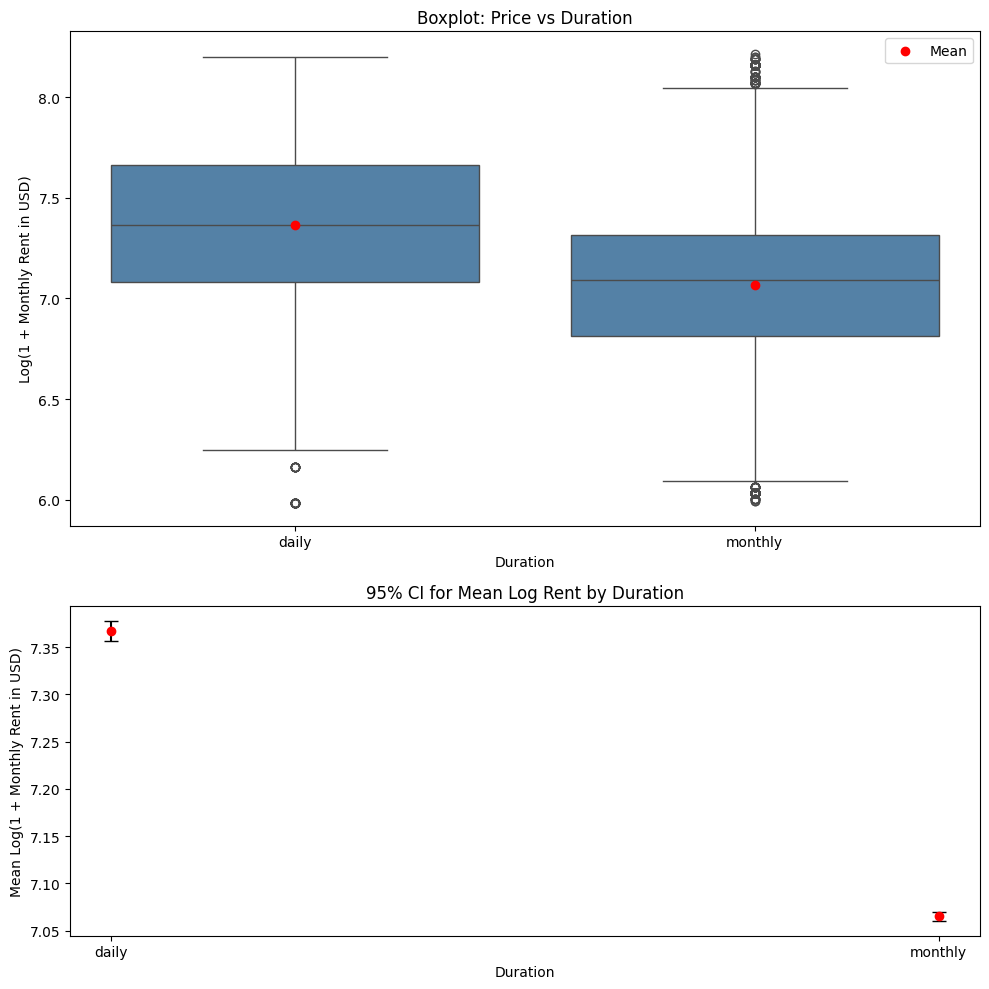

In [82]:
plot_price_vs_category_with_errorbars(df, 'duration')

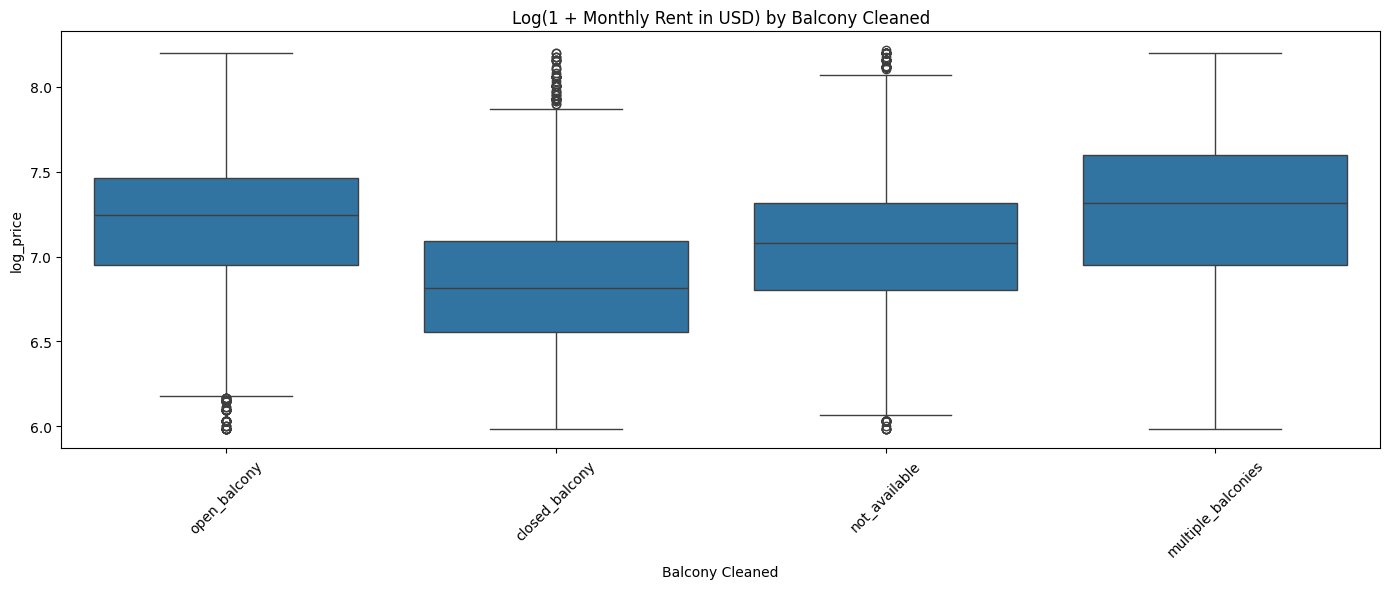

In [83]:
# Balcony
plot_boxplot_by_category(df, 'balcony_cleaned')

In [84]:
print_field_statistic(df, 'balcony_cleaned')

mean   median         min          max  \
balcony_cleaned_cleaned                                                  
multiple_balconies       1578.827543  1500.00  395.416667  3650.000000   
open_balcony             1462.519728  1400.00  395.416667  3650.000000   
nan                      1460.000000  1460.00  790.833333  2129.166667   
not_available            1254.860239  1186.25  395.416667  3700.000000   
closed_balcony           1032.338447   910.00  395.416667  3650.000000   

                                std         iqr  count          se  \
balcony_cleaned_cleaned                                              
multiple_balconies       723.812827  960.000000   2495   14.490755   
open_balcony             594.159138  699.833333  18369    4.383894   
nan                      946.344575  669.166667      2  669.166667   
not_available            527.957327  600.000000  12094    4.800802   
closed_balcony           461.529362  498.000000   5750    6.086469   

                                ci95  
balcony_cleaned_cleaned               
multiple_balconies         28.401879  
open_balcony                8.592432  
nan                      1311.566667  
not_available               9.409573  
closed_balcony             11.929479

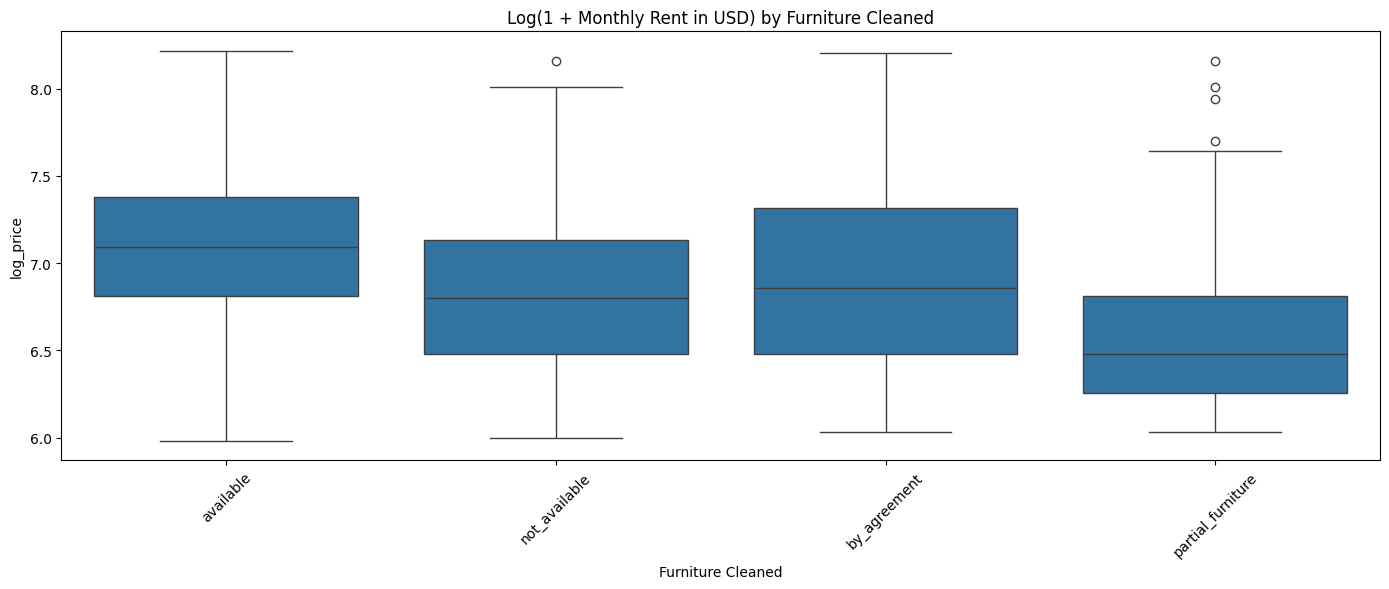

In [85]:
# Furniture
plot_boxplot_by_category(df, 'furniture_cleaned')

In [86]:
print_field_statistic(df, 'furniture_cleaned')

mean  median         min     max  \
furniture_cleaned_cleaned                                            
available                  1347.707213  1200.0  395.416667  3700.0   
by_agreement               1136.644912   950.0  416.000000  3650.0   
not_available              1001.016532   900.0  403.000000  3500.0   
partial_furniture           797.167328   650.0  416.000000  3500.0   

                                  std    iqr  count         se       ci95  
furniture_cleaned_cleaned                                                  
available                  587.373904  690.0  37885   3.017734   5.914759  
by_agreement               629.674648  850.0    452  29.617404  58.050112  
not_available              532.976684  600.0    247  33.912494  66.468489  
partial_furniture          504.687358  390.0    126  44.961123  88.123802

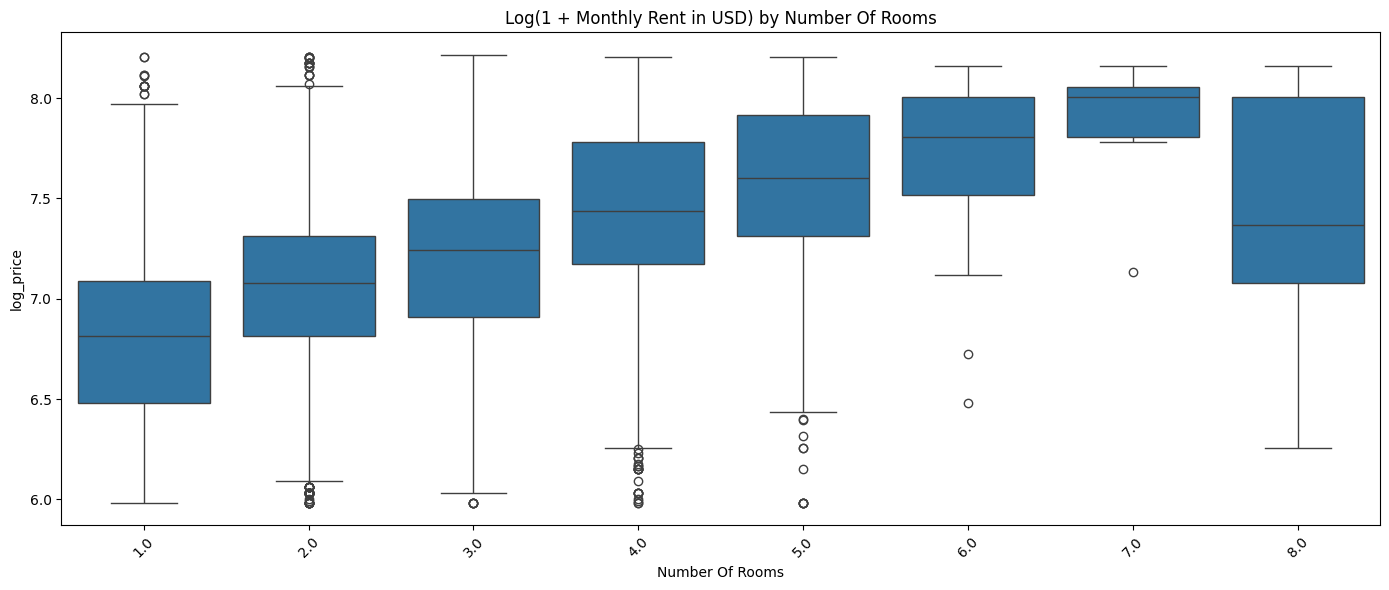

In [87]:
# Number of rooms
plot_boxplot_by_category(df, 'number_of_rooms')

In [88]:
print_field_statistic(df, 'number_of_rooms')

mean       median          min     max  \
number_of_rooms_cleaned                                                  
7.0                      2707.142857  3000.000000  1250.000000  3500.0   
6.0                      2354.888158  2450.000000   650.000000  3500.0   
5.0                      2141.113548  2000.000000   395.416667  3650.0   
8.0                      1875.274510  1581.666667   520.000000  3500.0   
4.0                      1832.435491  1700.000000   395.416667  3650.0   
3.0                      1447.315951  1400.000000   395.416667  3700.0   
2.0                      1217.225712  1186.250000   395.416667  3650.0   
1.0                      1002.490065   910.000000   395.416667  3650.0   

                                std          iqr  count          se  \
number_of_rooms_cleaned                                               
7.0                      754.115692   700.000000      7  285.028940   
6.0                      784.375186  1155.729167     38  127.242457   
5.0                      818.532401  1237.500000    342   44.261163   
8.0                      995.228696  1803.750000     17  241.378414   
4.0                      760.794604  1100.000000   2912   14.098462   
3.0                      608.094009   800.000000  14326    5.080521   
2.0                      456.908906   590.000000  17957    3.409673   
1.0                      461.867359   550.000000   3111    8.280704   

                               ci95  
number_of_rooms_cleaned              
7.0                      558.656722  
6.0                      249.395216  
5.0                       86.751880  
8.0                      473.101691  
4.0                       27.632986  
3.0                        9.957821  
2.0                        6.682959  
1.0                       16.230180

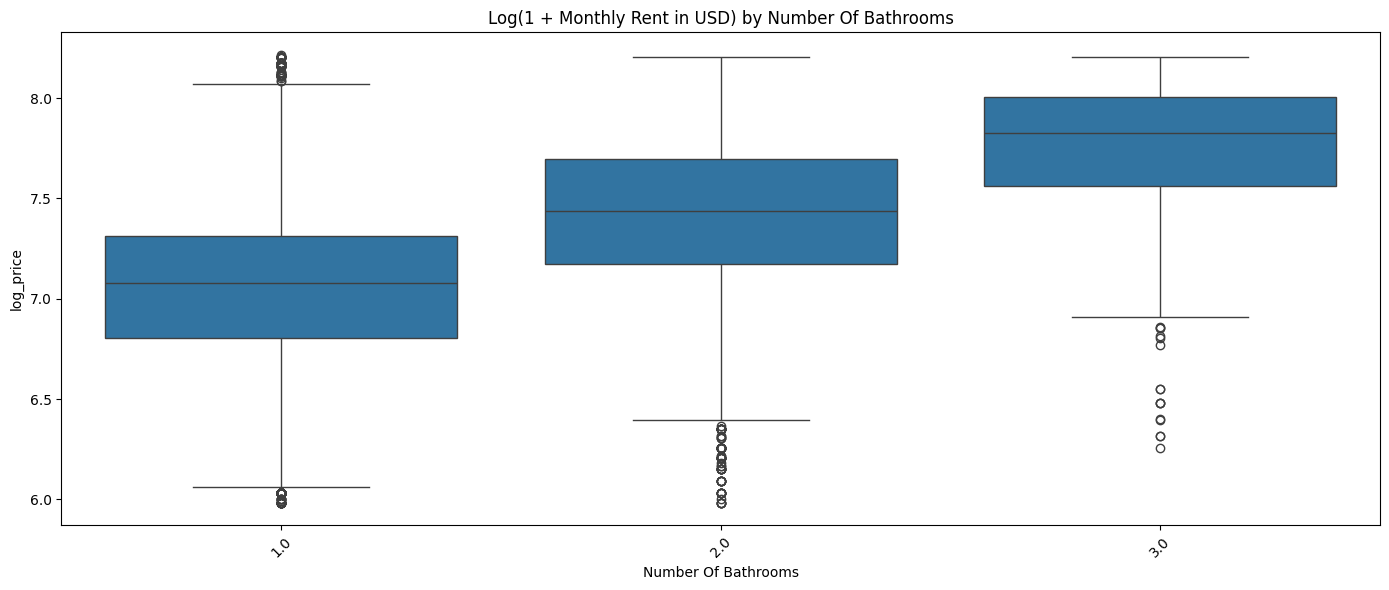

In [89]:
# Number of bathrooms
plot_boxplot_by_category(df, 'number_of_bathrooms')

In [90]:
print_field_statistic(df, 'number_of_bathrooms')

mean       median          min  \
number_of_bathrooms_cleaned                                          
3.0                          2405.981366  2500.000000   520.000000   
nan                          2129.166667  2129.166667  2129.166667   
2.0                          1799.450927  1700.000000   395.416667   
1.0                          1233.011539  1186.250000   395.416667   

                                     max         std     iqr  count  \
number_of_bathrooms_cleaned                                           
3.0                          3650.000000  754.643420  1075.0    559   
nan                          2129.166667         NaN     0.0      1   
2.0                          3650.000000  682.314313   900.0   6237   
1.0                          3700.000000  497.505599   600.0  31913   

                                    se       ci95  
number_of_bathrooms_cleaned                        
3.0                          31.918016  62.559311  
nan                                NaN        NaN  
2.0                           8.639659  16.933732  
1.0                           2.784929   5.458461

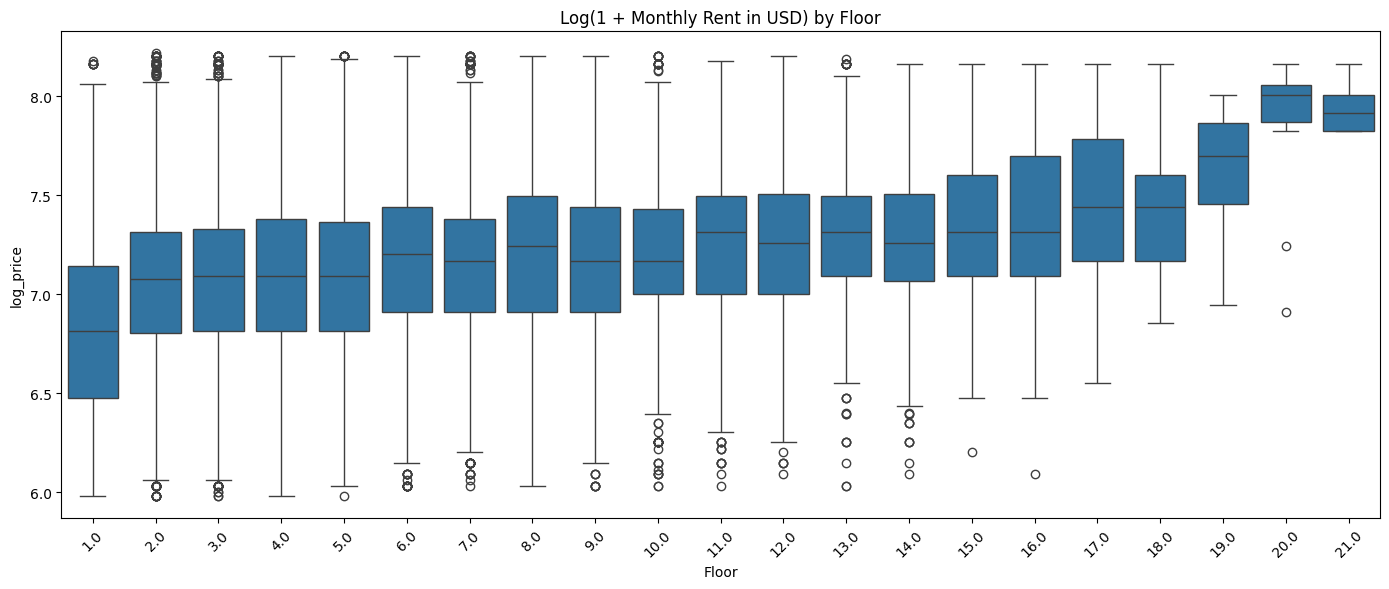

In [91]:
# floor
plot_boxplot_by_category(df, 'floor')

In [92]:
print_field_statistic(df, 'floor')

mean       median          min      max         std  \
floor_cleaned                                                               
21.0           2833.333333  2750.000000  2500.000000  3500.00  408.248290   
20.0           2680.000000  3000.000000  1000.000000  3500.00  824.351597   
19.0           2134.285714  2200.000000  1040.000000  3000.00  686.218069   
17.0           1887.328165  1700.000000   700.000000  3500.00  725.163099   
18.0           1731.324405  1700.000000   949.000000  3500.00  583.666536   
16.0           1694.914030  1500.000000   442.000000  3500.00  671.003571   
15.0           1658.207036  1500.000000   494.000000  3500.00  583.160965   
14.0           1567.343346  1423.500000   442.000000  3500.00  632.581548   
13.0           1564.637391  1500.000000   416.000000  3600.00  586.440321   
12.0           1516.562630  1423.500000   442.000000  3650.00  592.606810   
11.0           1516.049419  1500.000000   416.000000  3558.75  585.065136   
8.0            1468.581720  1400.000000   416.000000  3650.00  622.109053   
10.0           1461.212347  1300.000000   416.000000  3650.00  570.276729   
6.0            1433.563402  1344.416667   416.000000  3650.00  605.680465   
9.0            1414.295256  1300.000000   416.000000  3650.00  577.123456   
7.0            1398.589381  1300.000000   416.000000  3650.00  582.574941   
5.0            1334.694868  1200.000000   395.416667  3650.00  590.252598   
4.0            1323.943173  1200.000000   395.416667  3650.00  577.372512   
3.0            1296.277679  1200.000000   395.416667  3650.00  567.381879   
2.0            1256.815153  1186.250000   395.416667  3700.00  555.187935   
1.0            1037.275783   910.000000   395.416667  3558.75  484.730990   

                       iqr  count          se        ci95  
floor_cleaned                                              
21.0            500.000000      6  166.666667  326.666667  
20.0            525.000000     10  260.682864  510.938413  
19.0            850.000000      7  259.366051  508.357460  
17.0           1100.000000    129   63.847051  125.140220  
18.0            700.000000     28  110.302607  216.193111  
16.0           1000.000000    158   53.382178  104.629069  
15.0            800.000000    289   34.303586   67.235029  
14.0            650.000000    541   27.196805   53.305738  
13.0            604.729167    612   23.705445   46.462672  
12.0            719.729167    962   19.106410   37.448564  
11.0            700.000000    946   19.022108   37.283332  
8.0             800.000000   2211   13.230375   25.931535  
10.0            590.000000   1225   16.293621   31.935497  
6.0             700.000000   2588   11.905878   23.335521  
9.0             700.000000   1869   13.349472   26.164964  
7.0             600.000000   2436   11.803564   23.134985  
5.0             671.666667   4097    9.221571   18.074280  
4.0             690.000000   5388    7.865789   15.416947  
3.0             610.833333   6110    7.258633   14.226921  
2.0             600.000000   6225    7.036721   13.791973  
1.0             615.333333   2873    9.043426   17.725114

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_encoded_binary_boxplots(df, feature_prefix, price_col='log_price'):
    """
    Plots boxplots of price_col grouped by presence(1) or absence(0) of each binary-encoded column
    that starts with the given prefix (e.g., 'parking', 'amenities', 'appliances').
    """
    encoded_cols = [col for col in df.columns if col.startswith(feature_prefix)]

    for col in encoded_cols:
        temp = df.dropna(subset=[col, price_col])

        #Plot 
        plt.figure(figure=(8,5))
        sns.boxplot(x=col, y=price_col, data=temp)
        plt.title(f'{price_col} by {col.replace("_", " ").title()}')
        plt.xlabel(f'{col} (0=no, 1=Yes)')
        plt.ylabel('Log(1 + Monthly Rent in USD)')
        plt.xticks([0,1], ['Absent (0)', 'Present (1)'])
        plt.tight_layout()
        plt.show()

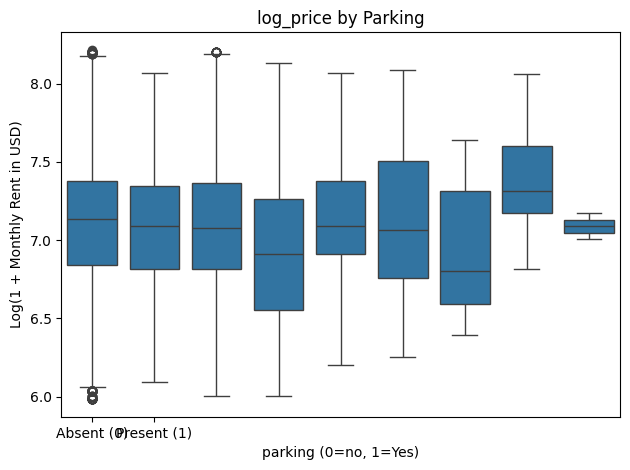

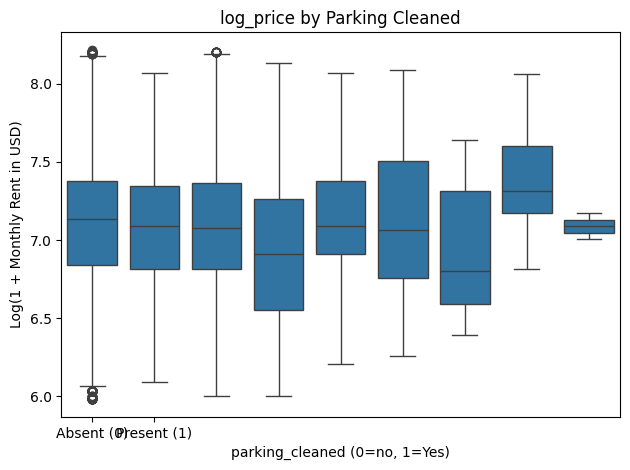

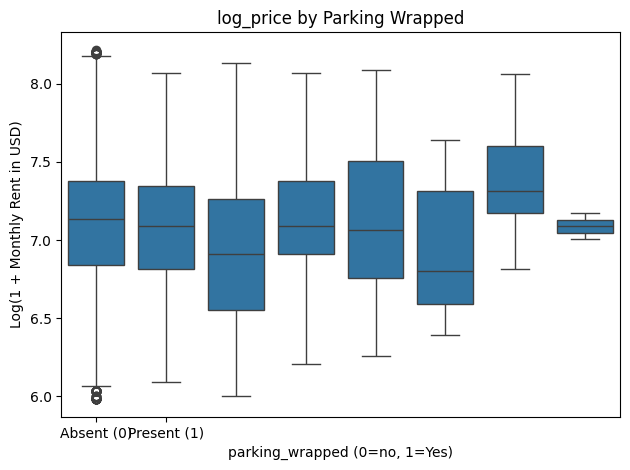

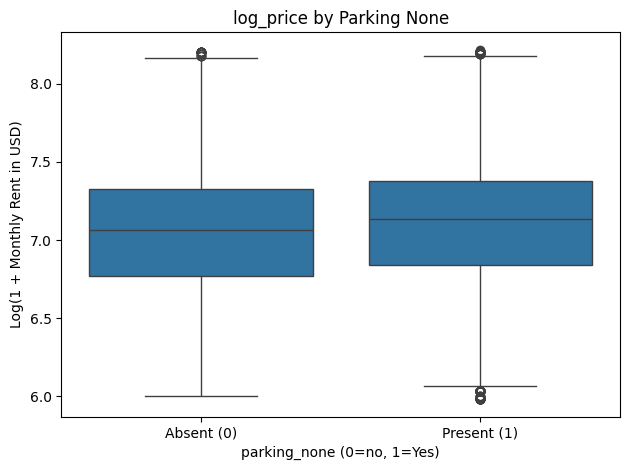

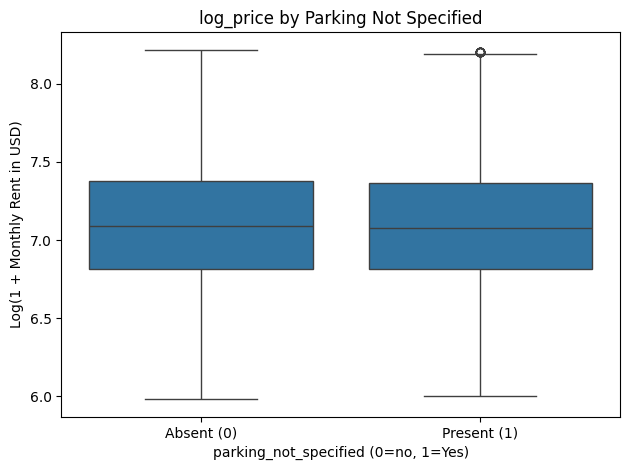

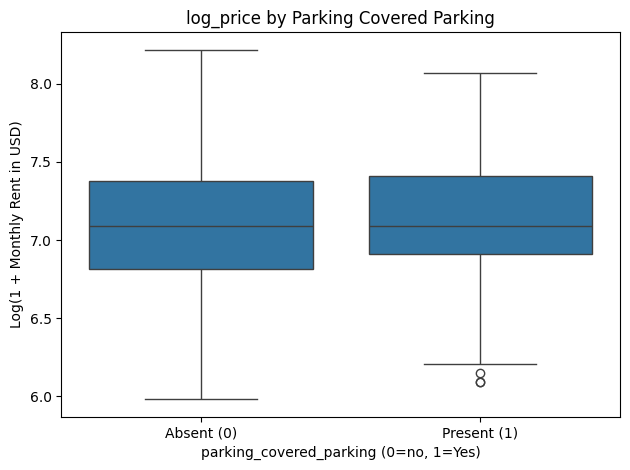

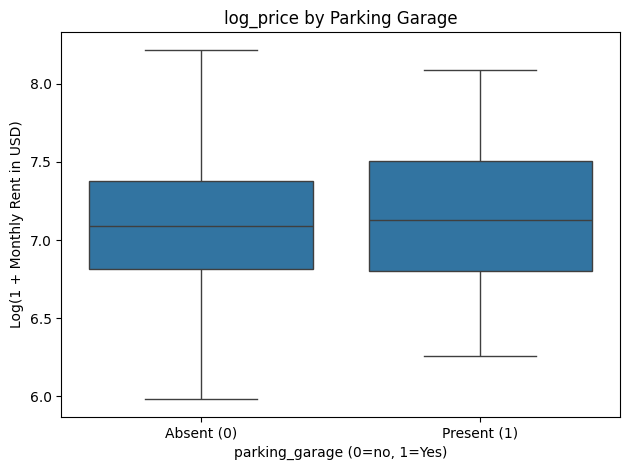

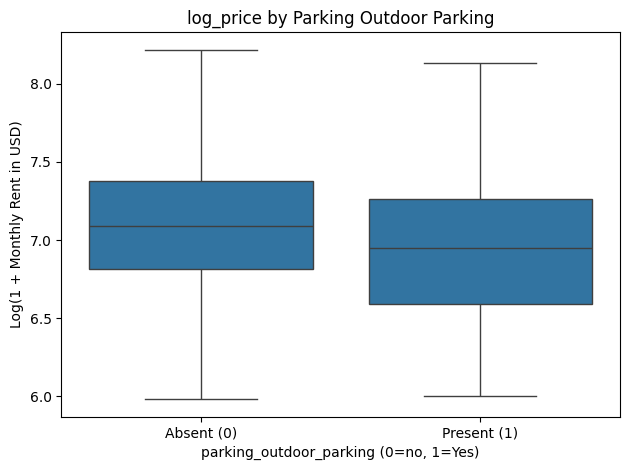

In [94]:
# parking
plot_encoded_binary_boxplots(df, 'parking')

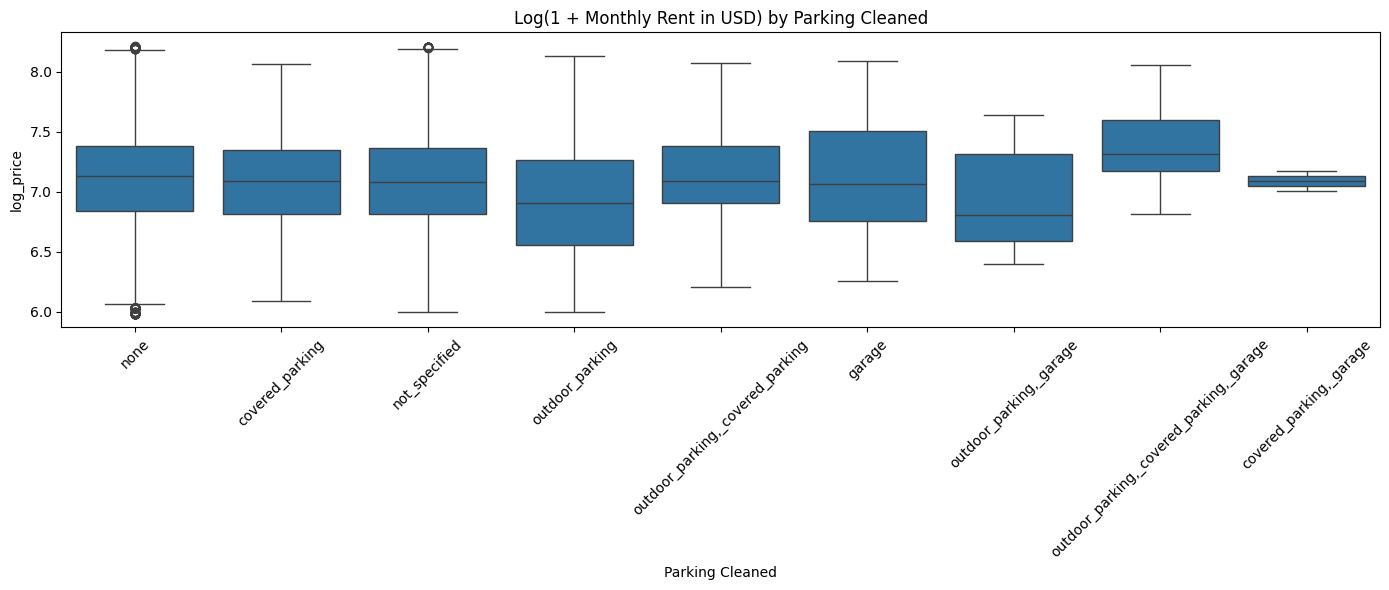

In [95]:
plot_boxplot_by_category(df, 'parking_cleaned')

In [96]:
print_field_statistic(df, 'parking_cleaned')

mean   median          min  \
parking_cleaned_cleaned                                                       
outdoor_parking,_covered_parking,_garage  1706.817460  1500.00   910.000000   
none                                      1358.919280  1250.00   395.416667   
outdoor_parking,_covered_parking          1344.909375  1200.00   494.000000   
garage                                    1335.343496  1170.00   520.000000   
not_specified                             1303.930520  1186.25   403.000000   
covered_parking                           1297.242424  1200.00   442.000000   
covered_parking,_garage                   1200.000000  1200.00  1100.000000   
outdoor_parking,_garage                   1120.695238   900.00   598.000000   
outdoor_parking                           1106.781903  1000.00   403.000000   

                                                  max         std         iqr  \
parking_cleaned_cleaned                                                         
outdoor_parking,_covered_parking,_garage  3163.333333  626.603998  700.000000   
none                                      3700.000000  591.649742  664.000000   
outdoor_parking,_covered_parking          3193.750000  509.850842  600.000000   
garage                                    3250.000000  660.164869  962.000000   
not_specified                             3650.000000  580.760903  671.666667   
covered_parking                           3190.000000  592.056676  637.000000   
covered_parking,_garage                   1300.000000  141.421356  100.000000   
outdoor_parking,_garage                   2077.400000  499.639773  772.000000   
outdoor_parking                           3400.000000  507.288391  721.500000   

                                          count          se        ci95  
parking_cleaned_cleaned                                                  
outdoor_parking,_covered_parking,_garage     21  136.736202  268.002957  
none                                      31540    3.331454    6.529650  
outdoor_parking,_covered_parking             80   57.003057  111.725992  
garage                                       41  103.100431  202.076845  
not_specified                              5424    7.885651   15.455875  
covered_parking                              66   72.877139  142.839192  
covered_parking,_garage                       2  100.000000  196.000000  
outdoor_parking,_garage                      21  109.030337  213.699461  
outdoor_parking                            1515   13.033126   25.544928

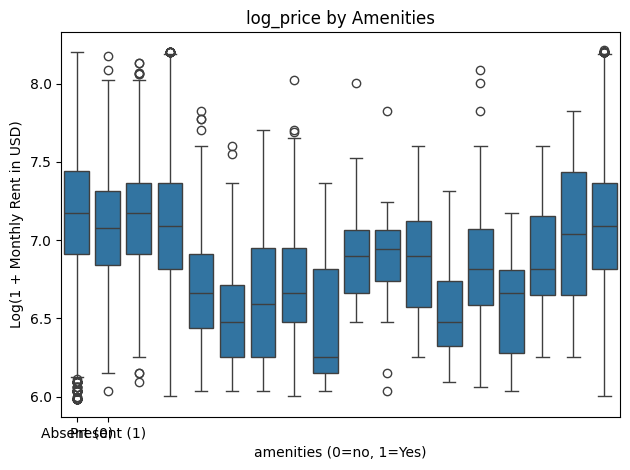

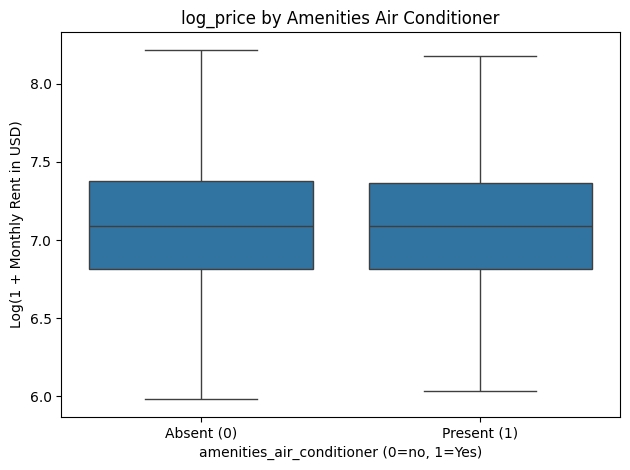

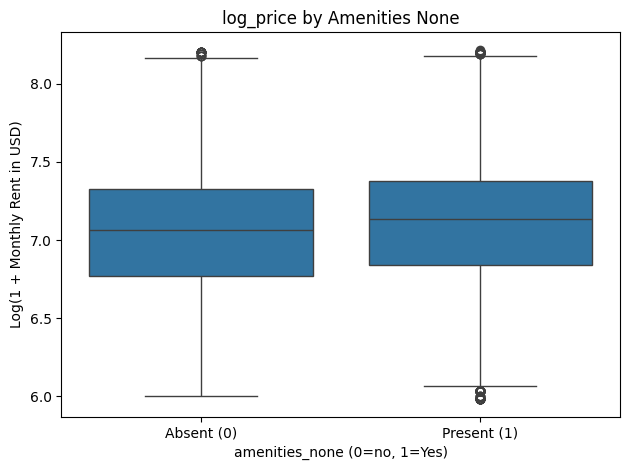

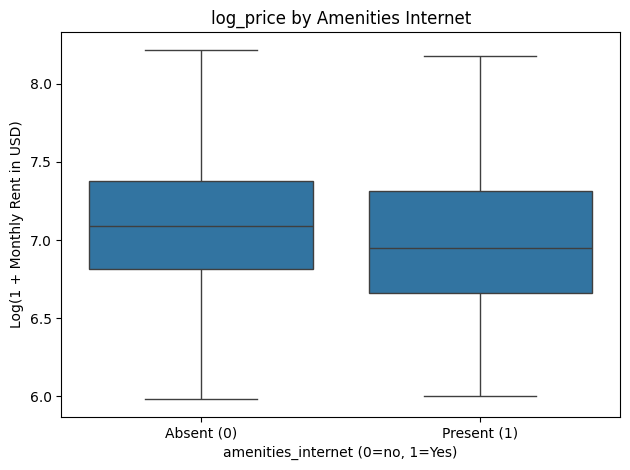

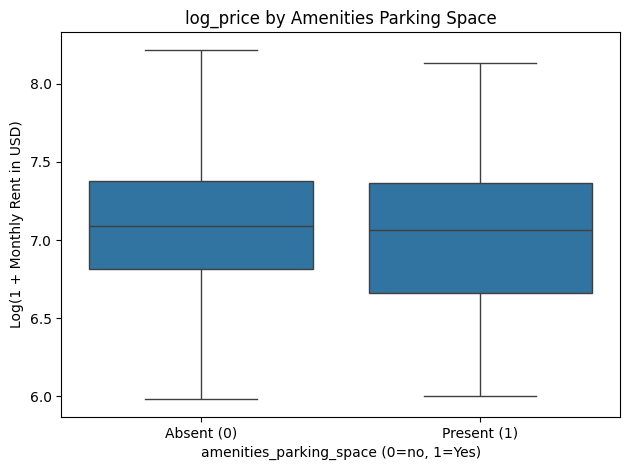

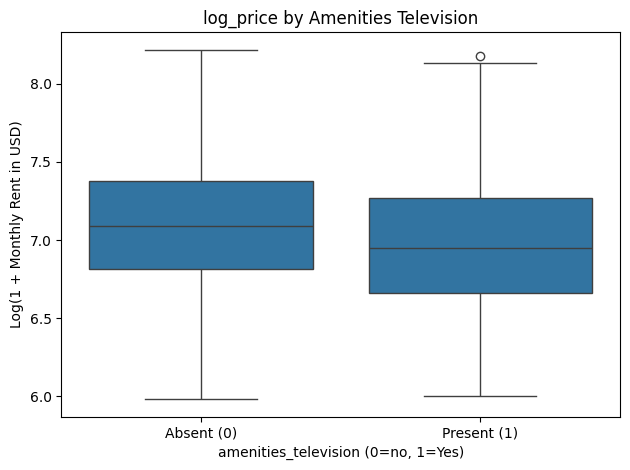

In [97]:
# Amentities
plot_encoded_binary_boxplots(df, 'amenities')

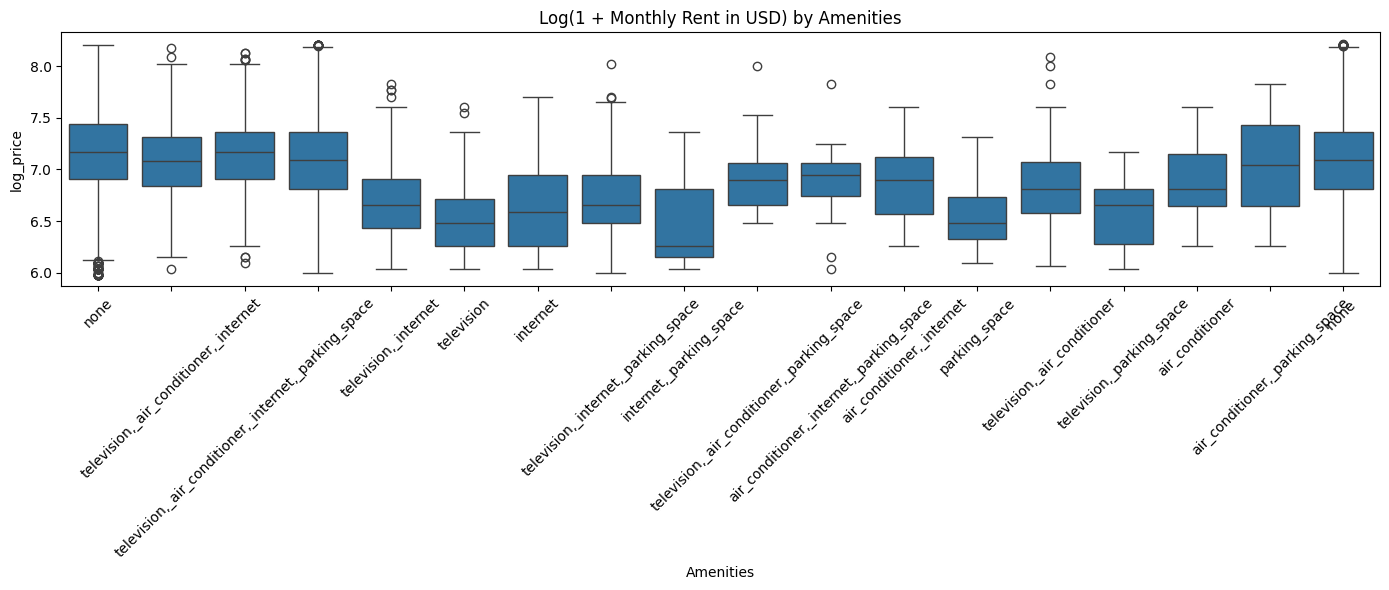

In [98]:
plot_boxplot_by_category(df, 'amenities')

In [99]:
print_field_statistic(df, 'amenities')

mean   median  \
amenities_cleaned                                                          
air_conditioner,_parking_space                      1510.000000  1510.00   
television,_air_conditioner,_internet,_parking_...  1363.636427  1300.00   
none                                                1358.919280  1250.00   
                                                    1320.215247  1200.00   
television,_air_conditioner,_internet               1288.742419  1186.25   
television,_air_conditioner,_parking_space          1119.235294   988.00   
television,_air_conditioner                         1057.604167   910.00   
air_conditioner                                     1049.166667   910.00   
air_conditioner,_internet                           1039.033951   988.00   
air_conditioner,_internet,_parking_space            1034.297368  1037.40   
television,_internet,_parking_space                  886.157087   780.00   
television,_internet                                 852.602657   780.00   
internet                                             823.173497   728.00   
parking_space                                        772.909091   650.00   
television,_parking_space                            748.409091   780.00   
internet,_parking_space                              732.589744   520.00   
television                                           726.360656   650.00   

                                                           min          max  \
amenities_cleaned                                                             
air_conditioner,_parking_space                      520.000000  2500.000000   
television,_air_conditioner,_internet,_parking_...  442.000000  3400.583333   
none                                                395.416667  3700.000000   
                                                    403.000000  3650.000000   
television,_air_conditioner,_internet               416.000000  3558.750000   
television,_air_conditioner,_parking_space          650.000000  3000.000000   
television,_air_conditioner                         429.000000  3250.000000   
air_conditioner                                     520.000000  2000.000000   
air_conditioner,_internet                           520.000000  2000.000000   
air_conditioner,_internet,_parking_space            416.000000  2500.000000   
television,_internet,_parking_space                 403.000000  3041.666667   
television,_internet                                416.000000  2500.000000   
internet                                            416.000000  2214.333333   
parking_space                                       442.000000  1500.000000   
television,_parking_space                           416.000000  1300.000000   
internet,_parking_space                             416.000000  1581.666667   
television                                          416.000000  2000.000000   

                                                            std         iqr  \
amenities_cleaned                                                             
air_conditioner,_parking_space                      1400.071427  990.000000   
television,_air_conditioner,_internet,_parking_...   512.992599  581.666667   
none                                                 591.649742  664.000000   
                                                     584.362326  671.666667   
television,_air_conditioner,_internet                521.522681  564.000000   
television,_air_conditioner,_parking_space           584.137990  390.000000   
television,_air_conditioner                          561.517008  456.000000   
air_conditioner                                      404.517178  504.750000   
air_conditioner,_internet                            421.157989  528.125000   
air_conditioner,_internet,_parking_space             441.448748  325.000000   
television,_internet,_parking_space                  396.982284  390.000000   
television,_internet                                 353.916165  376.000000   
intern

C:\Users\kelst\AppData\Local\Temp\ipykernel_29980\3548556154.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\kelst\AppData\Local\Temp\ipykernel_29980\3548556154.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


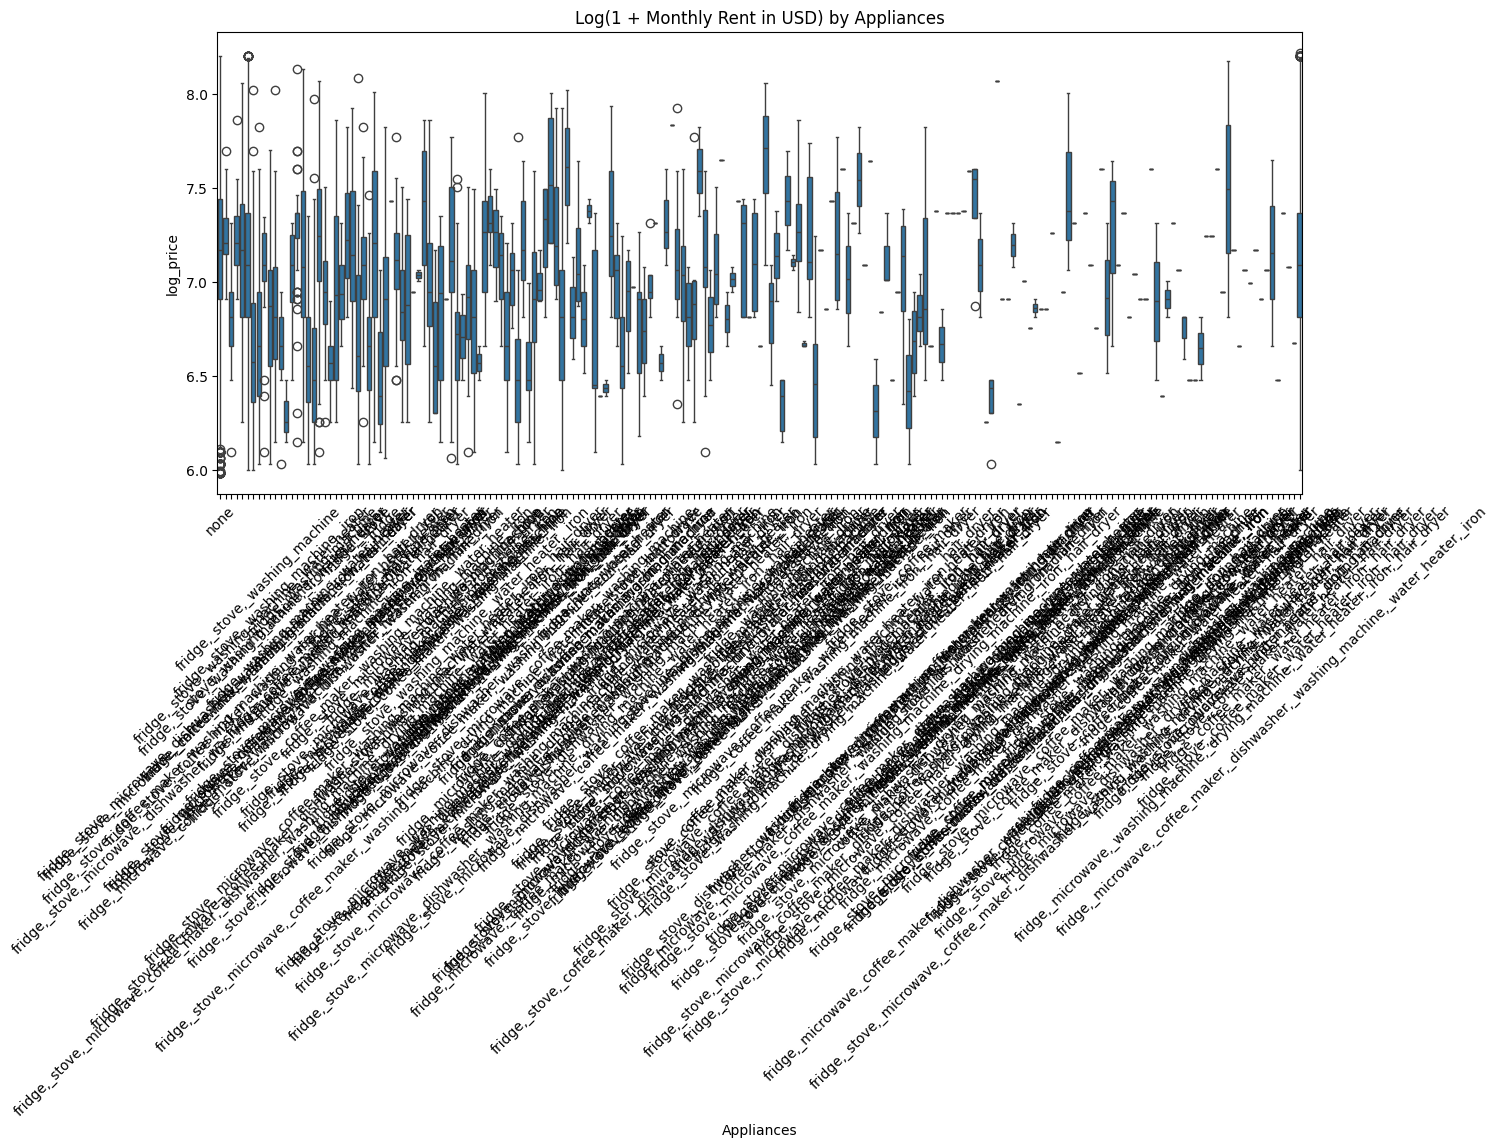

In [100]:
# Appliances
plot_boxplot_by_category(df, 'appliances')

In [101]:
print_field_statistic(df, 'appliances')

mean       median  \
appliances_cleaned                                                             
fridge,_stove,_coffee_maker,_dishwasher,_washin...  3190.000000  3190.000000   
fridge,_stove,_microwave,_dishwasher,_washing_m...  2530.000000  2530.000000   
fridge,_iron,_hair_dryer                            2234.375000  2234.375000   
fridge,_stove,_coffee_maker,_dishwasher,_washin...  2215.833333  2250.000000   
fridge,_microwave,_dishwasher,_washing_machine,...  2193.041667  2193.041667   
...                                                         ...          ...   
fridge,_washing_machine,_iron                        572.000000   598.000000   
stove,_washing_machine,_water_heater,_iron,_hai...   572.000000   572.000000   
stove,_washing_machine,_water_heater                 546.000000   520.000000   
fridge,_stove,_dishwasher,_drying_machine,_iron      520.000000   520.000000   
fridge,_stove,_coffee_maker,_washing_machine,_d...   468.000000   468.000000   

                                                            min          max  \
appliances_cleaned                                                             
fridge,_stove,_coffee_maker,_dishwasher,_washin...  3190.000000  3190.000000   
fridge,_stove,_microwave,_dishwasher,_washing_m...  2530.000000  2530.000000   
fridge,_iron,_hair_dryer                             910.000000  3558.750000   
fridge,_stove,_coffee_maker,_dishwasher,_washin...  1200.000000  3163.333333   
fridge,_microwave,_dishwasher,_washing_machine,...  1344.416667  3041.666667   
...                                                         ...          ...   
fridge,_washing_machine,_iron                        468.000000   650.000000   
stove,_washing_machine,_water_heater,_iron,_hai...   572.000000   572.000000   
stove,_washing_machine,_water_heater                 468.000000   650.000000   
fridge,_stove,_dishwasher,_drying_machine,_iron      520.000000   520.000000   
fridge,_stove,_coffee_maker,_washing_machine,_d...   468.000000   468.000000   

                                                            std          iqr  \
appliances_cleaned                                                             
fridge,_stove,_coffee_maker,_dishwasher,_washin...          NaN     0.000000   
fridge,_stove,_microwave,_dishwasher,_washing_m...          NaN     0.000000   
fridge,_iron,_hair_dryer                            1872.949087  1324.375000   
fridge,_stove,_coffee_maker,_dishwasher,_washin...   828.051595   865.833333   
fridge,_microwave,_dishwasher,_washing_machine,...  1200.136984   848.625000   
...                                                         ...          ...   
fridge,_washing_machine,_iron                         86.232245   156.000000   
stove,_washing_machine,_water_heater,_iron,_hai...          NaN     0.000000   
stove,_washing_machine,_water_heater                  93.744333    91.000000   
fridge,_stove,_dishwasher,_drying_machine,_iron             NaN     0.000000   
fridge,_stove,_coffee_maker,_washing_machine,_d...     0.000000     0.000000   

                                                    count           se  \
appliances_cleaned                                                       
fridge,_stove,_coffee_maker,_dishwasher,_washin...      1          NaN   
fridge,_stove,_microwave,_dishwasher,_washing_m...      1          NaN   
fridge,_iron,_hair_dryer                                2  1324.375000   
fridge,_stove,_coffee_maker,_dishwasher,_washin...      4   414.025798   
fridge,_microwave,_dishwasher,_washing_machine,...      2   848.625000   
...                                                   ...          ...   
fridge,_washing_machine,_iron                           5    38.564232   
stove,_washing_machine,_water_heater,_iron,_hai...      1          NaN   
stove,_washing_machine,_water_heater                    3    54.123316   
fridge,_stove,_dishwasher,_drying_machine,_iron         1          NaN   
fridge,_stove,_coffee_maker,_washing_machine,_d.

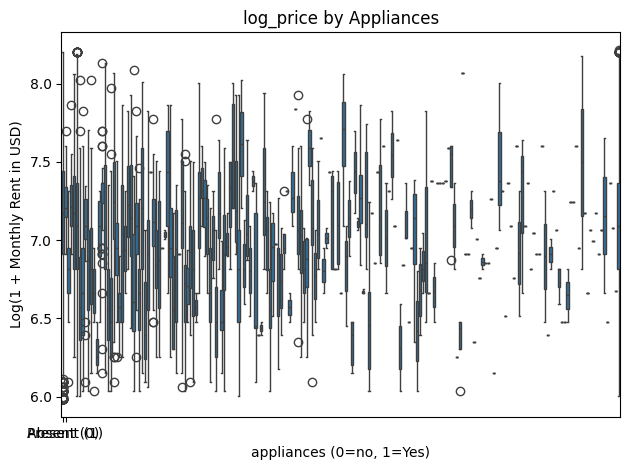

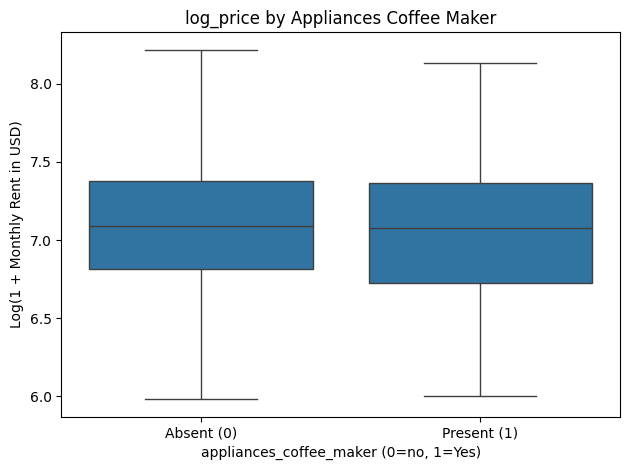

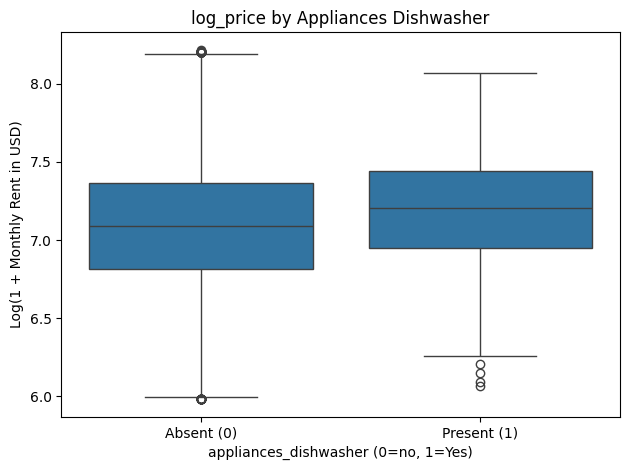

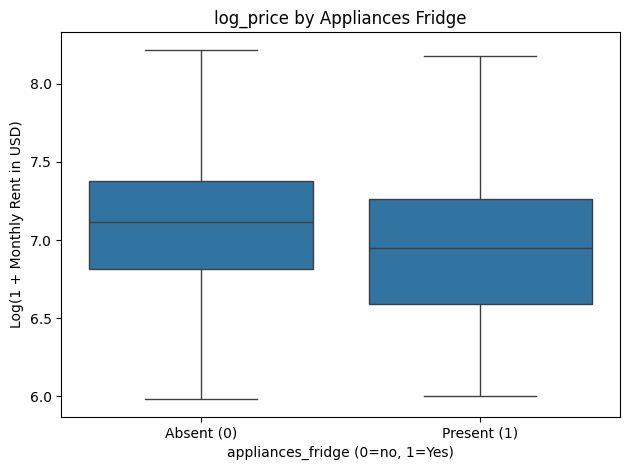

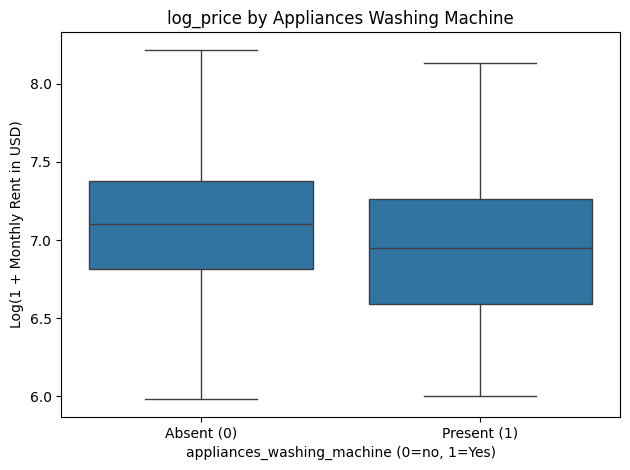

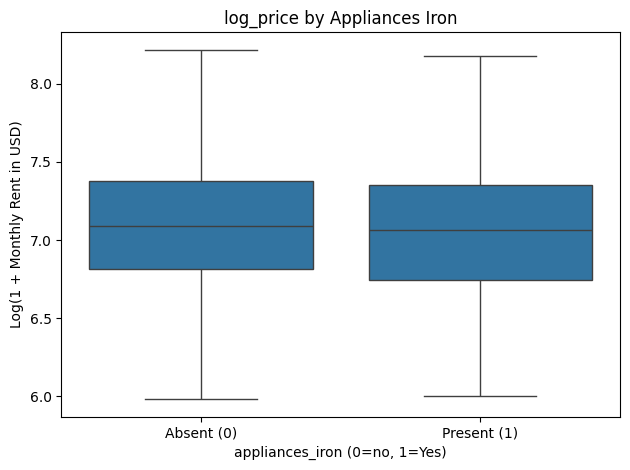

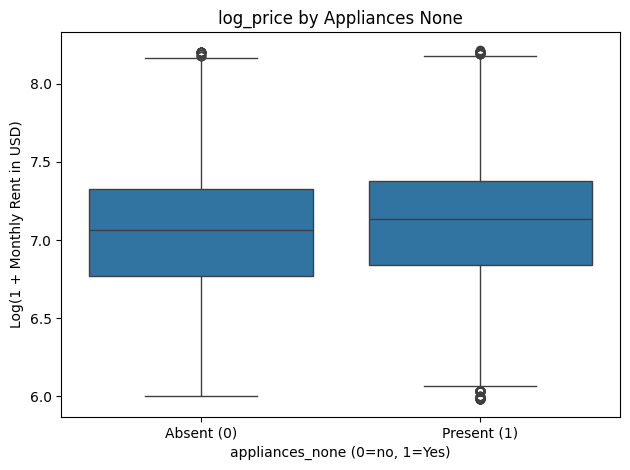

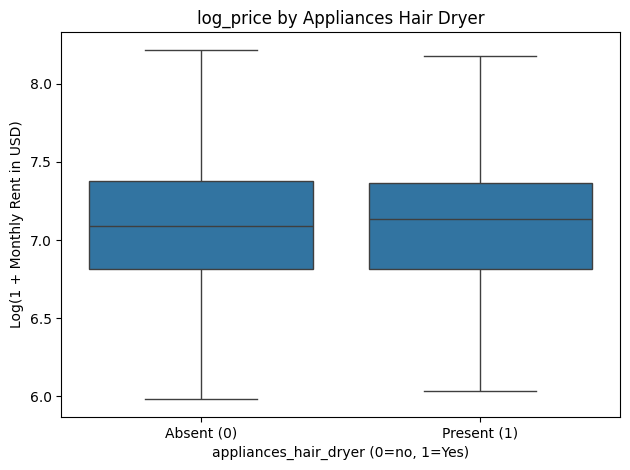

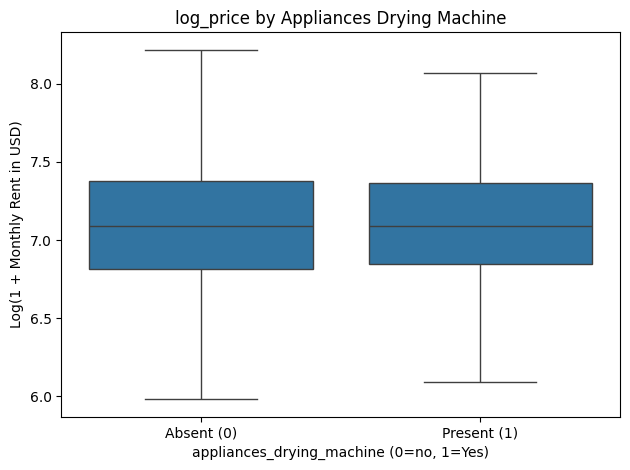

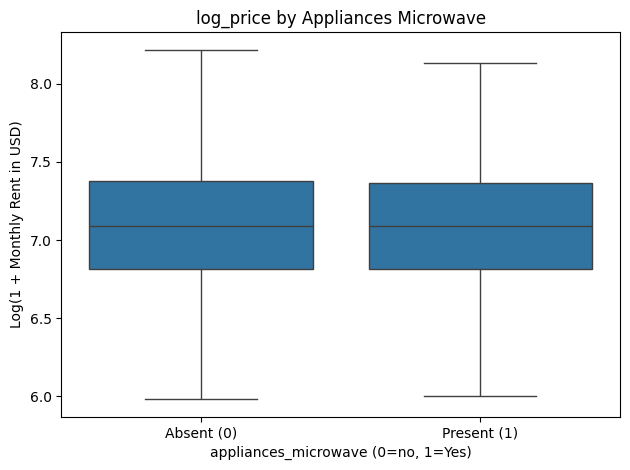

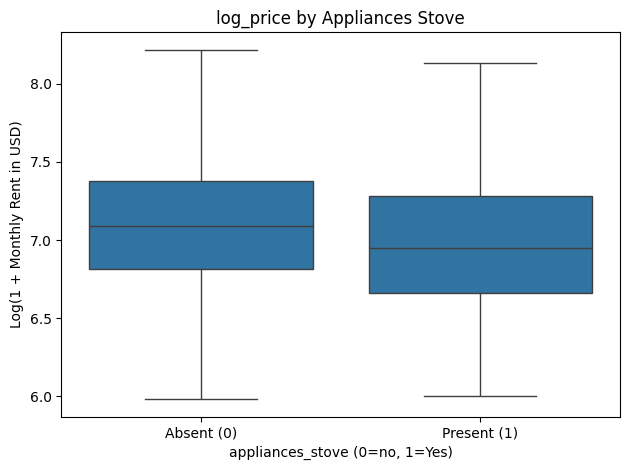

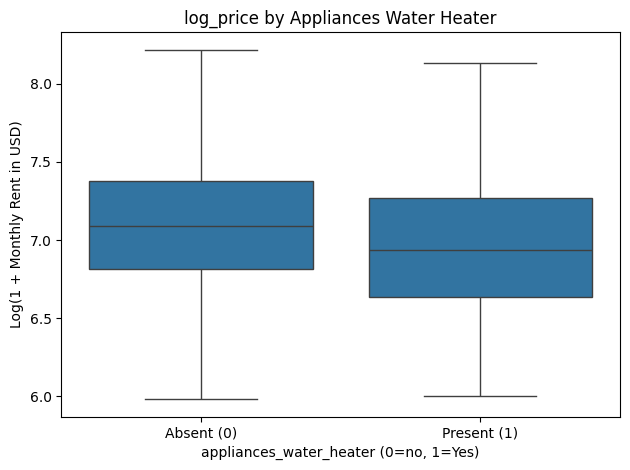

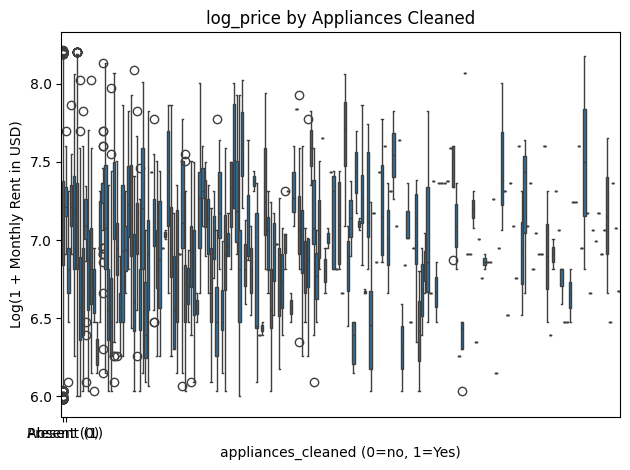

In [102]:
plot_encoded_binary_boxplots(df, 'appliances')

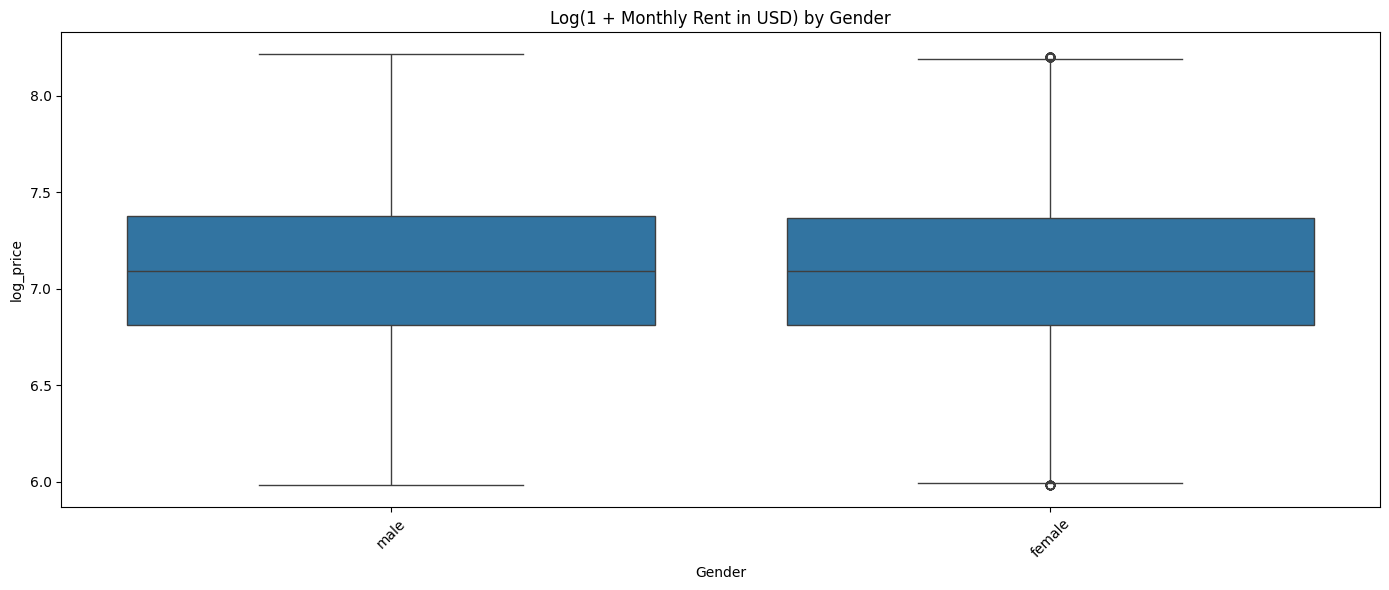

In [103]:
# Gender
plot_boxplot_by_category(df, 'gender')

In [104]:
print_field_statistic(df, 'gender')

mean  median         min     max         std  \
gender_cleaned                                                        
male            1342.336255  1200.0  395.416667  3700.0  590.875883   
female          1340.147125  1200.0  395.416667  3650.0  587.503900   

                       iqr  count        se      ci95  
gender_cleaned                                         
male            690.000000  19300  4.253218  8.336307  
female          671.666667  19410  4.216945  8.265213

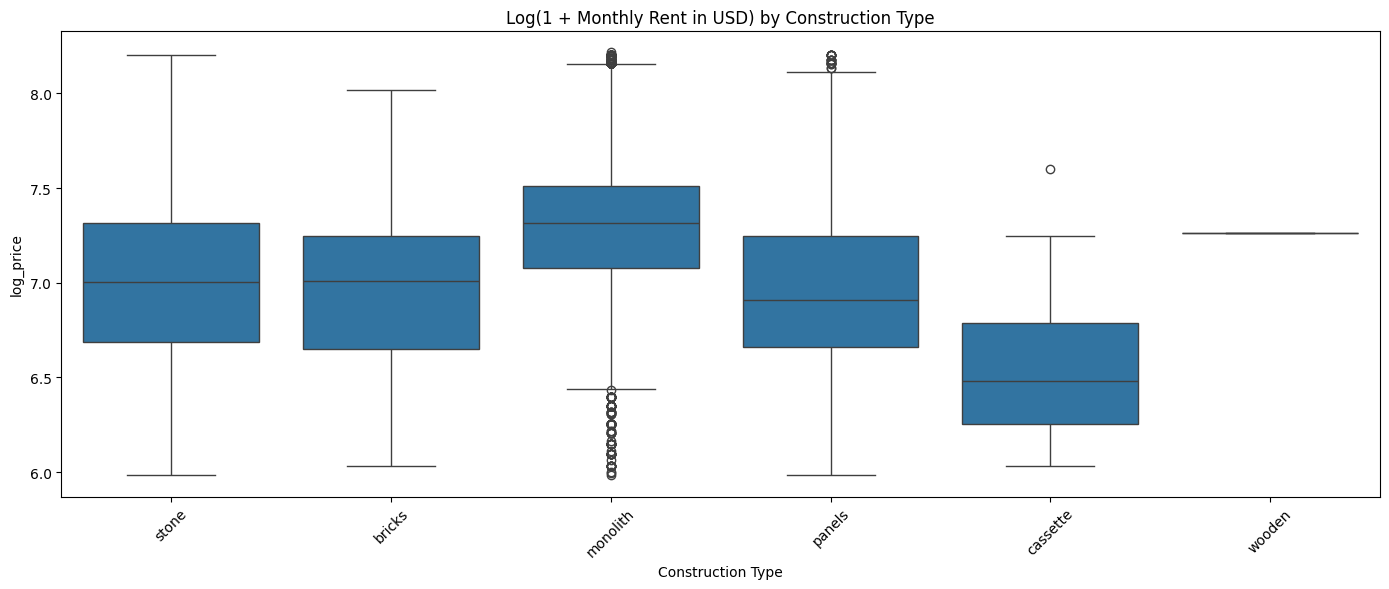

In [105]:
# Construction type
plot_boxplot_by_category(df, 'construction_type')

In [106]:
print_field_statistic(df, 'construction_type')

mean       median          min          max  \
construction_type_cleaned                                                       
monolith                   1569.892073  1500.000000   395.416667  3700.000000   
wooden                     1423.500000  1423.500000  1423.500000  1423.500000   
stone                      1211.751929  1100.000000   395.416667  3650.000000   
bricks                     1148.373775  1103.583333   416.000000  3041.666667   
panels                     1125.958905  1000.000000   395.416667  3650.000000   
cassette                    755.230769   650.000000   416.000000  2000.000000   

                                  std     iqr  count         se        ci95  
construction_type_cleaned                                                    
monolith                   596.216417  638.75  16083   4.701326    9.214600  
wooden                            NaN    0.00      1        NaN         NaN  
stone                      539.947338  700.00  14061   4.553479    8.924818  
bricks                     519.174856  627.50     68  62.959199  123.400030  
panels                     500.056784  620.00   8458   5.437327   10.657162  
cassette                   326.989977  364.00     39  52.360301  102.626191

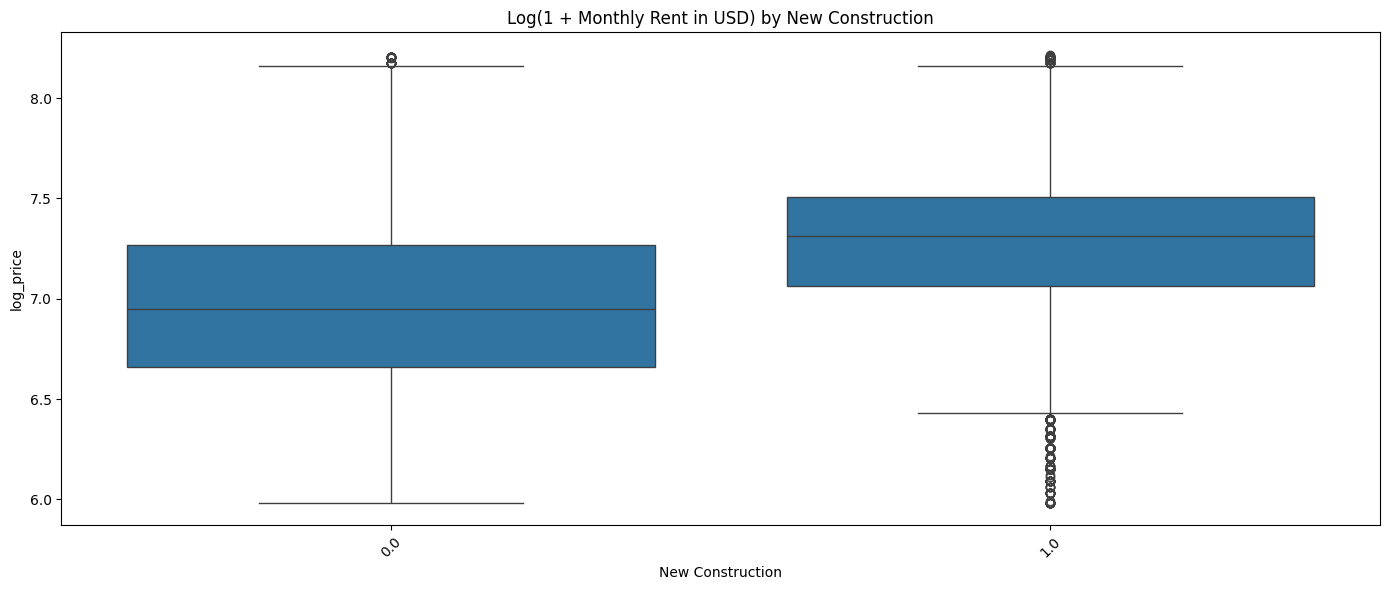

In [107]:
# New Construction
plot_boxplot_by_category(df, 'new_construction')

In [108]:
print_field_statistic(df, 'new_construction')

mean       median          min          max  \
new_construction_cleaned                                                       
nan                       2129.166667  2129.166667  2129.166667  2129.166667   
1.0                       1556.718356  1500.000000   395.416667  3700.000000   
0.0                       1176.300872  1040.000000   395.416667  3650.000000   

                                 std    iqr  count        se      ci95  
new_construction_cleaned                                                
nan                              NaN    0.0      1       NaN       NaN  
1.0                       605.100297  650.0  16781  4.671092  9.155341  
0.0                       519.468754  650.0  21928  3.508003  6.875685

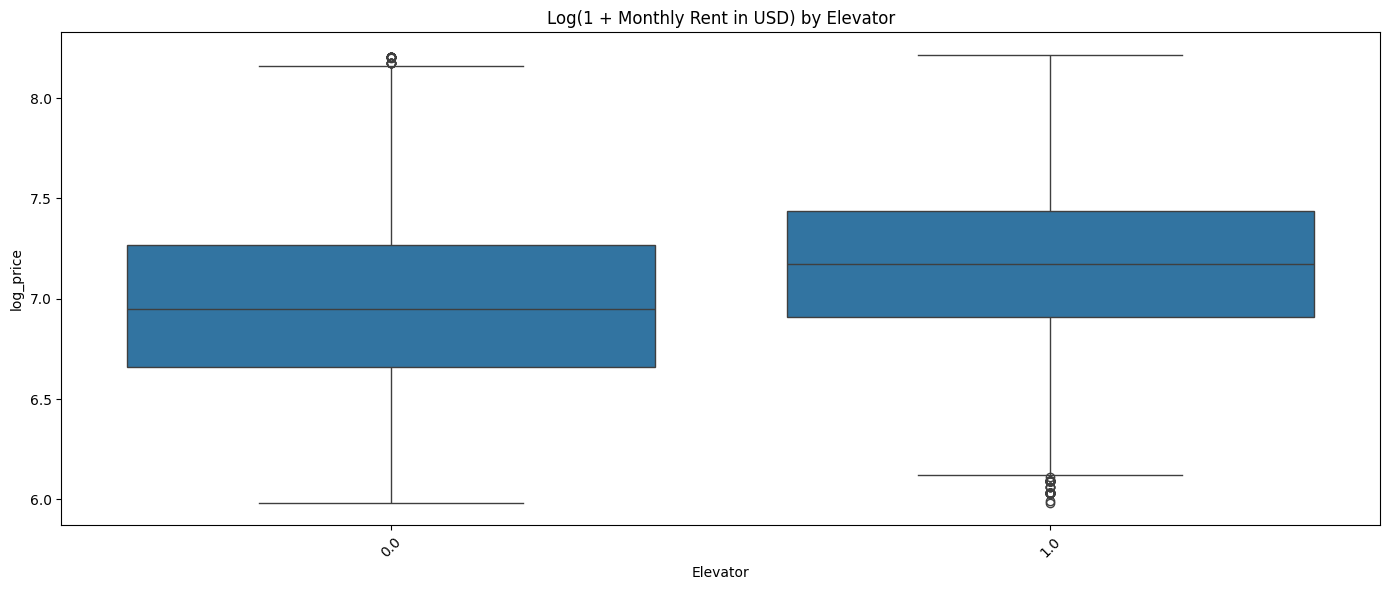

In [109]:
# Elevator
plot_boxplot_by_category(df, 'elevator')

In [110]:
print_field_statistic(df, 'elevator')

mean       median          min          max  \
elevator_cleaned                                                       
nan               2129.166667  2129.166667  2129.166667  2129.166667   
1.0               1431.490507  1300.000000   395.416667  3700.000000   
0.0               1164.154437  1040.000000   395.416667  3650.000000   

                         std    iqr  count        se      ci95  
elevator_cleaned                                                
nan                      NaN    0.0      1       NaN       NaN  
1.0               597.355204  700.0  25638  3.730702  7.312176  
0.0               529.882737  650.0  13071  4.634740  9.084090

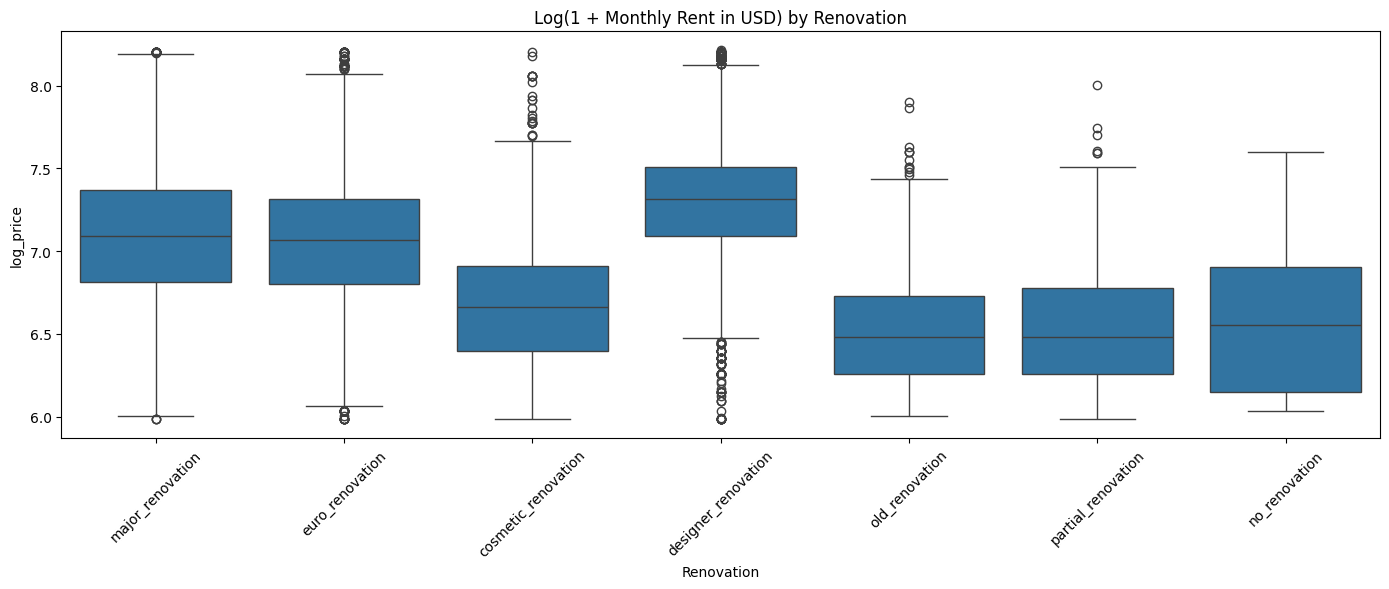

In [111]:
# Renovation
plot_boxplot_by_category(df, 'renovation')

In [112]:
print_field_statistic(df, 'renovation')

mean       median          min          max  \
renovation_cleaned                                                        
nan                  2129.166667  2129.166667  2129.166667  2129.166667   
designer_renovation  1578.249968  1500.000000   395.416667  3700.000000   
major_renovation     1339.951212  1200.000000   395.416667  3650.000000   
euro_renovation      1264.859903  1170.000000   395.416667  3650.000000   
cosmetic_renovation   842.157611   780.000000   395.416667  3650.000000   
no_renovation         787.830303   706.333333   416.000000  2000.000000   
partial_renovation    757.066555   650.000000   395.416667  3000.000000   
old_renovation        738.439752   650.000000   403.000000  2700.000000   

                            std         iqr  count         se        ci95  
renovation_cleaned                                                         
nan                         NaN    0.000000      1        NaN         NaN  
designer_renovation  589.518075  620.000000  10868   5.654866   11.083537  
major_renovation     571.169221  671.666667  14173   4.797709    9.403510  
euro_renovation      540.318894  600.000000  10287   5.327283   10.441475  
cosmetic_renovation  365.905302  402.000000   2468   7.365396   14.436177  
no_renovation        395.488557  529.000000     22  84.318444  165.264150  
partial_renovation   318.299436  356.958333    447  15.055047   29.507892  
old_renovation       332.514121  316.500000    444  15.780422   30.929627

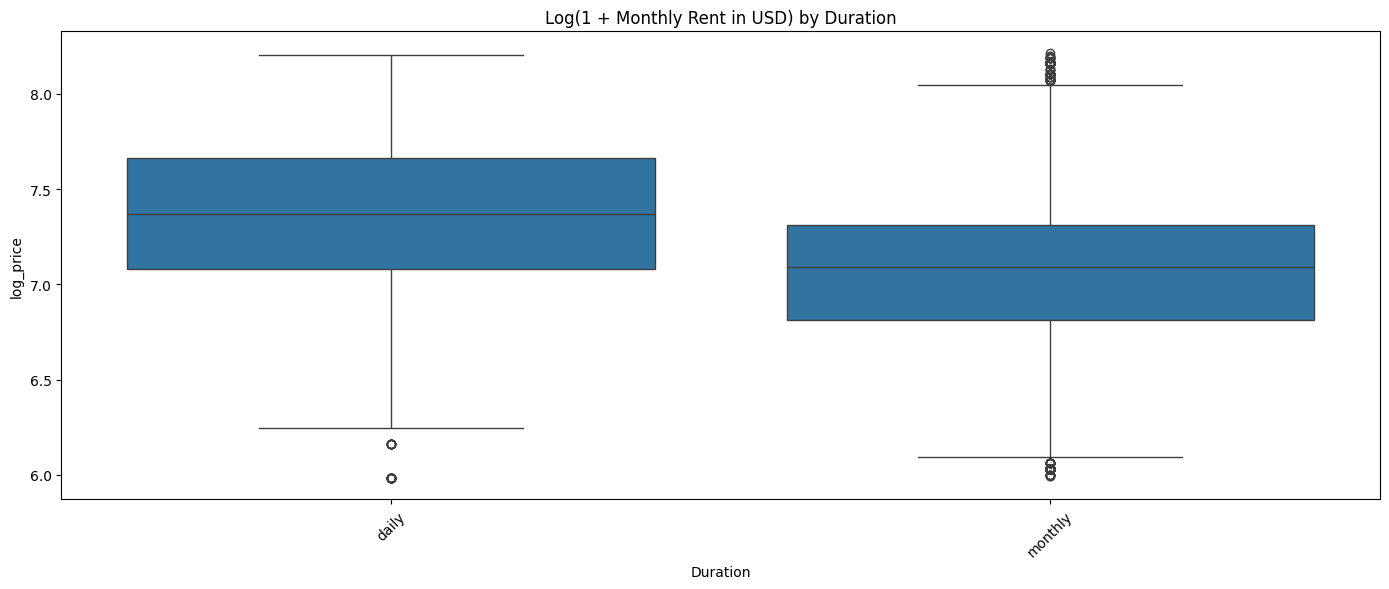

In [113]:
# duration
plot_boxplot_by_category(df, 'duration')

In [114]:
print_field_statistic(df, 'duration')

mean       median         min     max         std  \
duration_cleaned                                                             
daily             1713.733860  1581.666667  395.416667  3650.0  681.978358   
monthly           1273.879907  1200.000000  400.000000  3700.0  544.231507   

                         iqr  count        se       ci95  
duration_cleaned                                          
daily             942.916667   5928  8.857609  17.360913  
monthly           590.000000  32782  3.005841   5.891448

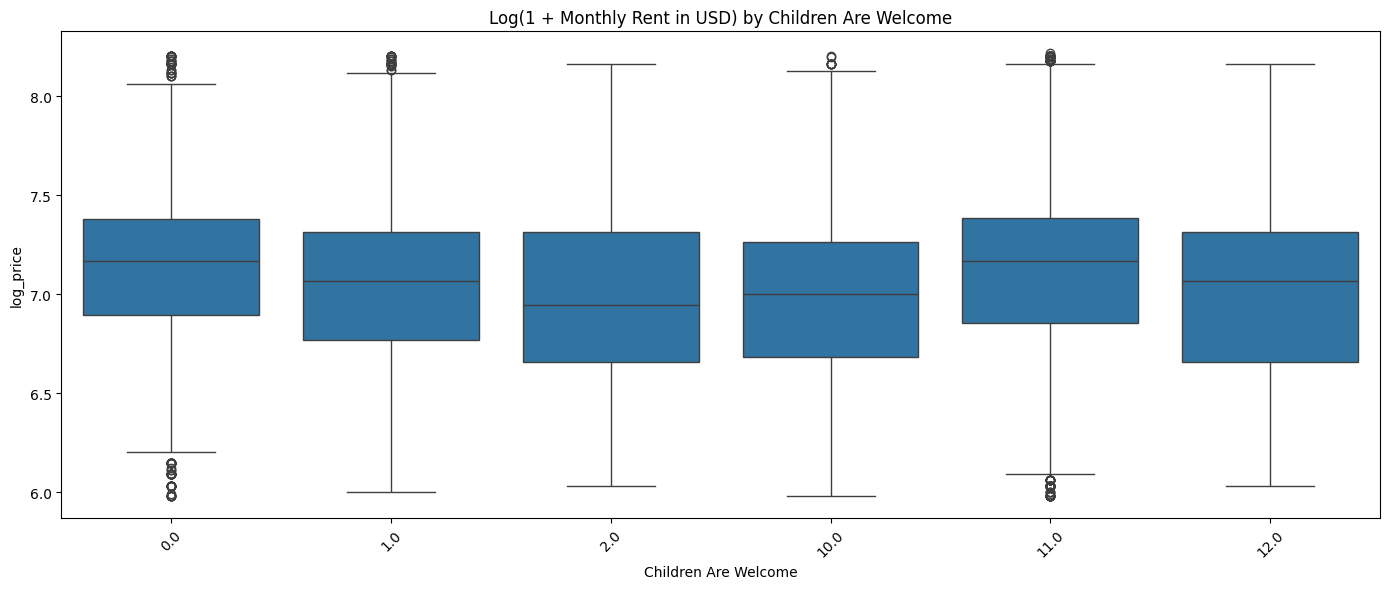

In [115]:
# children are welcome
plot_boxplot_by_category(df, 'children_are_welcome')

In [116]:
print_field_statistic(df, 'children_are_welcome')

mean       median         min     max  \
children_are_welcome_cleaned                                                 
nan                           1410.919725  1344.416667  416.000000  3650.0   
11.0                          1377.305776  1300.000000  395.416667  3700.0   
0.0                           1358.436019  1300.000000  395.416667  3650.0   
1.0                           1263.129062  1170.000000  403.000000  3650.0   
12.0                          1205.494130  1170.000000  416.000000  3500.0   
10.0                          1185.070851  1100.000000  395.416667  3650.0   
2.0                           1161.300715  1040.000000  416.000000  3500.0   

                                     std         iqr  count         se  \
children_are_welcome_cleaned                                             
nan                           573.743198  739.833333    545  24.576458   
11.0                          602.267690  660.000000  22998   3.971408   
0.0                           571.313472  612.000000   6039   7.351771   
1.0                           571.452318  630.083333   5781   7.515857   
12.0                          556.482806  720.000000    741  20.442907   
10.0                          501.019050  630.000000   2093  10.951400   
2.0                           546.654101  720.000000    513  24.135368   

                                   ci95  
children_are_welcome_cleaned             
nan                           48.169858  
11.0                           7.783960  
0.0                           14.409470  
1.0                           14.731080  
12.0                          40.068097  
10.0                          21.464743  
2.0                           47.305322

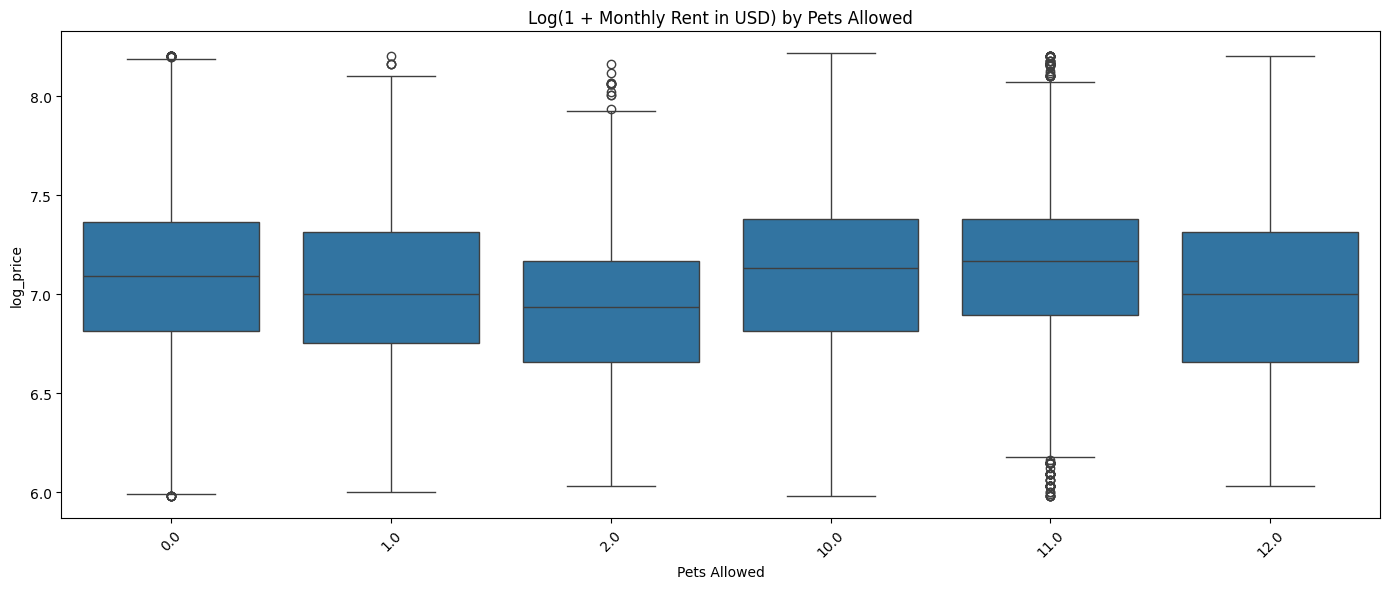

In [117]:
# pets allowed
plot_boxplot_by_category(df, 'pets_allowed')

In [118]:
print_field_statistic(df, 'pets_allowed')

mean       median         min     max  \
pets_allowed_cleaned                                                 
nan                   1410.919725  1344.416667  416.000000  3650.0   
11.0                  1373.199864  1300.000000  395.416667  3650.0   
10.0                  1360.950103  1250.000000  395.416667  3700.0   
0.0                   1333.004218  1200.000000  395.416667  3650.0   
1.0                   1219.150552  1100.000000  403.000000  3650.0   
12.0                  1207.754832  1100.000000  416.000000  3650.0   
2.0                   1131.452977  1028.083333  416.000000  3500.0   

                             std         iqr  count         se       ci95  
pets_allowed_cleaned                                                       
nan                   573.743198  739.833333    545  24.576458  48.169858  
11.0                  586.922821  612.000000   6847   7.093014  13.902308  
10.0                  600.875307  690.000000  17738   4.511615   8.842765  
0.0                   581.654962  671.666667  10089   5.790837  11.350041  
1.0                   526.213745  642.000000   1298  14.605783  28.627335  
12.0                  561.011030  720.000000   1247  15.886864  31.138253  
2.0                   494.591208  520.000000    946  16.080547  31.517873

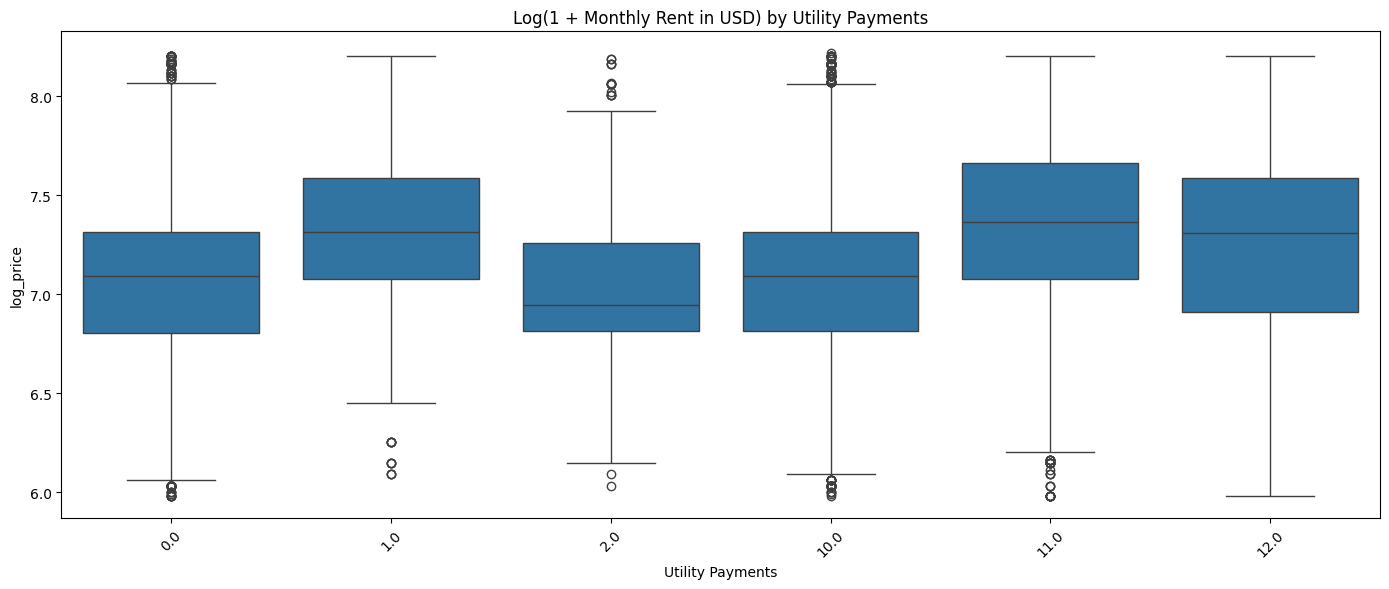

In [119]:
# Utility payments
plot_boxplot_by_category(df, 'utility_payments')

In [120]:
print_field_statistic(df, 'utility_payments')

mean       median         min     max  \
utility_payments_cleaned                                                 
11.0                      1704.874937  1581.666667  395.416667  3650.0   
1.0                       1599.321083  1502.583333  442.000000  3650.0   
12.0                      1526.868082  1490.416667  395.416667  3650.0   
nan                       1410.919725  1344.416667  416.000000  3650.0   
10.0                      1287.028241  1200.000000  395.416667  3700.0   
0.0                       1285.168088  1200.000000  395.416667  3650.0   
2.0                       1229.384311  1040.000000  416.000000  3600.0   

                                 std         iqr  count         se       ci95  
utility_payments_cleaned                                                       
11.0                      679.447102  942.916667   2917  12.580197  24.657186  
1.0                       624.549163  790.833333    902  20.795212  40.758616  
12.0                      687.974377  977.083333   2433  13.947655  27.337405  
nan                       573.743198  739.833333    545  24.576458  48.169858  
10.0                      548.578773  590.000000  20482   3.833124   7.512922  
0.0                       562.303323  600.000000  10860   5.395799  10.575765  
2.0                       559.925364  513.500000    571  23.432147  45.927009

In [121]:
def print_field_values(df, column_name):
    print(df[column_name].value_counts())

columns_converted_to_binary = {
    'balcony_cleaned', 'furniture_cleaned', 'renovation', 'amenities', 'appliances', 'parking', 'children_are_welcome', 'pets_allowed', 'utility_payments'}

for col in columns_converted_to_binary:
    print_field_values(df, col)

children_are_welcome
11.0    22998
0.0      6039
1.0      5781
10.0     2093
12.0      741
2.0       513
Name: count, dtype: int64
appliances
none                                                                                                     21772
none                                                                                                      9768
                                                                                                          4901
fridge,_stove,_microwave,_coffee_maker,_washing_machine,_water_heater,_iron,_hair_dryer                    208
fridge,_stove,_washing_machine                                                                             168
                                                                                                         ...  
fridge,_stove,_dishwasher,_washing_machine,_drying_machine,_iron                                             1
fridge,_stove,_microwave,_dishwasher,_drying_machine,_water_heater,_iron,_hair_dr

In [122]:
# do: count the portion of not available in every columns that can be converted to binary > 10%?

In [123]:
def print_not_available_portion(df, column_name):
    converted_fields = ['parking', 'amenities', 'appliances']
    enocoded_fields = ['children_are_welcome', 'pets_allowed', 'utility_payments', 'elevator']

    number_of_rows = len(df)
    
    if column_name in converted_fields:
        number_of_not_available = df[df[f"{column_name}_none"] == 1].shape[0]
    elif column_name in enocoded_fields:
        number_of_not_available = df[df[column_name] == 0].shape[0]
    elif column_name == 'renovation':
        number_of_not_available = df[df[column_name] == 'no_renovation'].shape[0]
    else:
        number_of_not_available = df[df[column_name] == 'not_available'].shape[0]

    print(f"Count of {column_name}: {number_of_not_available}, "
           f"Portion of na: {number_of_not_available / number_of_rows:.2f}, "
            f">10%? : {number_of_not_available / number_of_rows > 0.1}")

columns_converted_to_binary = {
    'balcony_cleaned', 'furniture_cleaned', 'renovation', 'amenities', 'appliances', 'parking', 'children_are_welcome', 'pets_allowed', 'utility_payments'}

for col in columns_converted_to_binary:
    print_not_available_portion(df, col)


Count of children_are_welcome: 6039, Portion of na: 0.16, >10%? : True
Count of appliances: 31540, Portion of na: 0.81, >10%? : True
Count of furniture_cleaned: 247, Portion of na: 0.01, >10%? : False
Count of amenities: 31540, Portion of na: 0.81, >10%? : True
Count of utility_payments: 10860, Portion of na: 0.28, >10%? : True
Count of renovation: 22, Portion of na: 0.00, >10%? : False
Count of pets_allowed: 10089, Portion of na: 0.26, >10%? : True
Count of parking: 31540, Portion of na: 0.81, >10%? : True
Count of balcony_cleaned: 12094, Portion of na: 0.31, >10%? : True


In [124]:
# Convert 'balcony_cleaned', 'utility_payments', 'children_are_welcome', 'pets_allowed', 'parking' to binary
def convert_to_binary_fields(df, binary_fields):
    for col in binary_fields:
        if col == 'balcony_cleaned':
            df[f"{col}_binary"] = df[col].apply(lambda x: 0 if 'not_available' in str(x).lower() else 1)
        elif col in ['parking', 'appliances', 'amenities']:
            df[f"{col}_binary"] = df[f"{col}_none"].apply(lambda x: 0 if x==1 else 1)
        elif col == 'gender':
            df[f"{col}_binary"] = df[col].apply(lambda x: 0 if x=='female' else 1)
        elif col == 'duration':
            df[f"{col}_binary"] = df[col].apply(lambda x: 0 if x=='daily' else 1)
        else:
            df[f"{col}_binary"] = df[col].apply(lambda x: 0 if x == 0 else 1)

In [125]:
binary_fields = ['balcony_cleaned', 'utility_payments', 'children_are_welcome', 'pets_allowed', 'parking', 'appliances', 'amenities']
for col in binary_fields:
    convert_to_binary_fields(df, binary_fields)

In [126]:
df

reg_id  gender  age construction_type  new_construction  elevator  \
0           3    male   60             stone               0.0       0.0   
1           2  female   51             stone               0.0       0.0   
2           2    male   20             stone               0.0       0.0   
4           4  female   43             stone               1.0       1.0   
6           5  female   61            bricks               0.0       0.0   
...       ...     ...  ...               ...               ...       ...   
40729       1  female   48          monolith               1.0       1.0   
40730       1  female   49          monolith               1.0       1.0   
40731       1  female   25             stone               0.0       1.0   
40732       1  female   53            panels               0.0       1.0   
40733       1    male   70            panels               0.0       1.0   

       floors_in_the_building  floor_area  number_of_rooms  \
0                         5.0        41.0              2.0   
1                         5.0        76.0              4.0   
2                         5.0        78.0              3.0   
4                        12.0        40.0              1.0   
6                         4.0       100.0              3.0   
...                       ...         ...              ...   
40729                    11.0        85.0              3.0   
40730                     9.0       130.0              4.0   
40731                     4.0       170.0              8.0   
40732                     9.0        51.0              2.0   
40733                     9.0        54.0              2.0   

       number_of_bathrooms  ...  children_are_welcome_cleaned  \
0                      1.0  ...                          11.0   
1                      1.0  ...                          11.0   
2                      1.0  ...                          11.0   
4                      1.0  ...                           0.0   
6                      1.0  ...                          11.0   
...                    ...  ...                           ...   
40729                  1.0  ...                           0.0   
40730                  2.0  ...                          11.0   
40731                  2.0  ...                           0.0   
40732                  1.0  ...                          11.0   
40733                  1.0  ...                          11.0   

       pets_allowed_cleaned utility_payments_cleaned balcony_cleaned_binary  \
0                      11.0                     10.0                      1   
1                      11.0                     10.0                      1   
2                      11.0                     10.0                      1   
4                       0.0                      0.0                      1   
6                      11.0                     10.0                      1   
...                     ...                      ...                    ...   
40729                   0.0                      0.0                      0   
40730                  10.0                     10.0                      0   
40731                   0.0                      0.0                      1   
40732                  10.0                     11.0                      0   
40733                  10.0                     11.0                      0   

      utility_payments_binary  children_are_welcome_binary  \
0                           1                            1   
1                           1                            1   
2                           1                            1   
4                           0                            0   
6                           1                            1   
...                       ...                          ...   
40729                       0                            0   
40730                       1                            1   
40731                       0                            0   

In [127]:
converted_binary_fields = ['balcony_cleaned_binary', 'utility_payments_binary', 'children_are_welcome_binary', 'pets_allowed_binary', 'parking_binary']
for col in converted_binary_fields:
    number_of_rows = len(df)
    number_of_not_available = df[df[col] == 0].shape[0]
    print(f"Count of {col}: {number_of_not_available}, "
           f"Portion of na: {number_of_not_available / number_of_rows:.2f}, "
            f">10%? : {number_of_not_available / number_of_rows > 0.1}")

Count of balcony_cleaned_binary: 12094, Portion of na: 0.31, >10%? : True
Count of utility_payments_binary: 10860, Portion of na: 0.28, >10%? : True
Count of children_are_welcome_binary: 6039, Portion of na: 0.16, >10%? : True
Count of pets_allowed_binary: 10089, Portion of na: 0.26, >10%? : True
Count of parking_binary: 31540, Portion of na: 0.81, >10%? : True


In [128]:
from scipy.stats import ttest_ind, t
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def run_ttest_and_plot(df, column_name, target='log_price', plot=True, conf_level=0.95):
    # Drop missing values
    df_valid = df[[column_name, target]].dropna()

    # Split into two groups
    group0 = df_valid[df_valid[column_name] == 0][target]
    group1 = df_valid[df_valid[column_name] == 1][target]

    # Sizes
    n0, n1 = len(group0), len(group1)

    # Means and medians
    mean0, mean1 = group0.mean(), group1.mean()
    median0, median1 = group0.median(), group1.median()

    # Standard deviation and standard error
    std0, std1 = group0.std(), group1.std()
    se0, se1 = std0 / np.sqrt(n0), std1 / np.sqrt(n1)

    # Pooled standard deviation
    pooled_std = np.sqrt(((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2))

    # T-test (Welch)
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    t_squared = t_stat ** 2

    # Degrees of freedom (Welch-Satterthwaite)
    df_val = (se0**2 + se1**2)**2 / ((se0**4 / (n0 - 1)) + (se1**4 / (n1 - 1)))

    # Confidence Interval for difference in means
    pooled_se = np.sqrt(se0**2 + se1**2)
    t_crit = t.ppf(1 - (1 - conf_level) / 2, df_val)
    mean_diff = mean1 - mean0
    ci_low = mean_diff - t_crit * pooled_se
    ci_high = mean_diff + t_crit * pooled_se

    # Report
    print(f"\n--- Two-Sample T-Test for '{column_name}' vs. {target} ---")
    print(f"Group 0 → Mean: {mean0:.4f}, Median: {median0:.4f}, StDev: {std0:.4f}, SE: {se0:.4f}, n = {n0}")
    print(f"Group 1 → Mean: {mean1:.4f}, Median: {median1:.4f}, StDev: {std1:.4f}, SE: {se1:.4f}, n = {n1}")
    print(f"Pooled Std Dev: {pooled_std:.4f}")
    print(f"Mean difference: {abs(mean_diff):.4f}")
    print(f"Median difference: {abs(median1 - median0):.4f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"T-squared (≈ F): {t_squared:.4f}")
    print(f"Degrees of freedom (df): {round(df_val)}")
    print(f"{int(conf_level*100)}% CI for difference: ({ci_low:.4f}, {ci_high:.4f})")
    print(f"P-value: {p_val:.4g}")
    print("Statistically significant?", "Yes (p < 0.05)" if p_val < 0.05 else "No")

    # Optional boxplot
    if plot:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=column_name, y=target, data=df_valid)
        plt.title(f"Boxplot of {target} by {column_name}")
        plt.xlabel(column_name)
        plt.ylabel('Log(1 + Monthly Rent in USD)')
        if column_name == 'gender_binary':
            plt.xticks([0, 1], ['Female / 0', 'Male / 1'])
        elif column_name == 'duration_binary':
            plt.xticks([0, 1], ['Daily / 0', 'Monthly / 1'])
        else:
            plt.xticks([0, 1], ['Not Available / 0', 'Available / 1'])
        plt.tight_layout()
        plt.show()

    return {
        'column': column_name,
        'mean_diff': mean_diff,
        'median_diff': median1 - median0,
        't_stat': t_stat,
        't_squared': t_squared,
        'df': df_val,
        'std0': std0,
        'std1': std1,
        'pooled_std': pooled_std,
        'se0': se0,
        'se1': se1,
        'ci': (ci_low, ci_high),
        'p_value': p_val,
        'significant': p_val < 0.05
    }



--- Two-Sample T-Test for 'balcony_cleaned_binary' vs. log_price ---
Group 0 → Mean: 7.0525, Median: 7.0794, StDev: 0.4087, SE: 0.0037, n = 12094
Group 1 → Mean: 7.1380, Median: 7.1709, StDev: 0.4341, SE: 0.0027, n = 26616
Pooled Std Dev: 0.4263
Mean difference: 0.0854
Median difference: 0.0915
T-statistic: -18.6871
T-squared (≈ F): 349.2080
Degrees of freedom (df): 24717
95% CI for difference: (0.0765, 0.0944)
P-value: 2.154e-77
Statistically significant? Yes (p < 0.05)


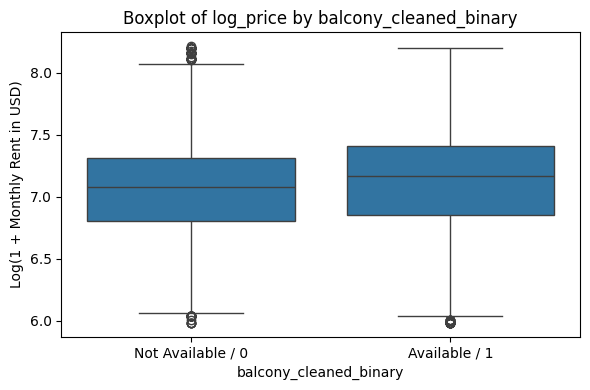

{'column': 'balcony_cleaned_binary',
 'mean_diff': 0.0854180091857728,
 'median_diff': 0.09149349108327343,
 't_stat': -18.687108991844212,
 't_squared': 349.20804247306484,
 'df': 24716.599674313045,
 'std0': 0.4087283834647638,
 'std1': 0.43410733335671653,
 'pooled_std': 0.4263408362443198,
 'se0': 0.0037166341707602006,
 'se1': 0.002660882691232616,
 'ci': (0.07645865541806643, 0.09437736295347918),
 'p_value': 2.1544080479090903e-77,
 'significant': True}

In [129]:
run_ttest_and_plot(df, 'balcony_cleaned_binary')


--- Two-Sample T-Test for 'utility_payments_binary' vs. log_price ---
Group 0 → Mean: 7.0698, Median: 7.0909, StDev: 0.4251, SE: 0.0041, n = 10860
Group 1 → Mean: 7.1275, Median: 7.1317, StDev: 0.4283, SE: 0.0026, n = 27850
Pooled Std Dev: 0.4274
Mean difference: 0.0577
Median difference: 0.0408
T-statistic: -11.9700
T-squared (≈ F): 143.2807
Degrees of freedom (df): 19936
95% CI for difference: (0.0482, 0.0671)
P-value: 6.617e-33
Statistically significant? Yes (p < 0.05)


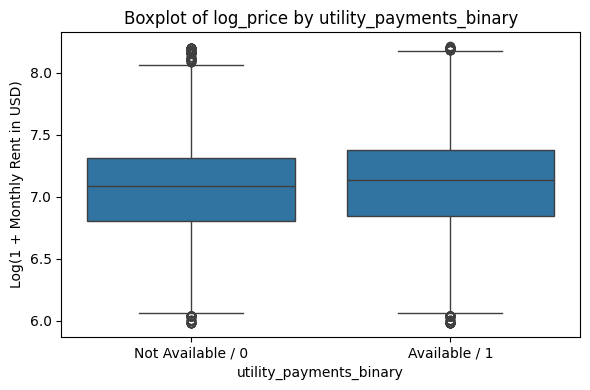

{'column': 'utility_payments_binary',
 'mean_diff': 0.057690325544717425,
 'median_diff': 0.04078868838692795,
 't_stat': -11.969992180557828,
 't_squared': 143.28071280261554,
 'df': 19936.23529510041,
 'std0': 0.42513410249194855,
 'std1': 0.42826629469593713,
 'pooled_std': 0.42738991756141326,
 'se0': 0.004079538452724667,
 'se1': 0.0025662637909258544,
 'ci': (0.0482435503280389, 0.06713710076139595),
 'p_value': 6.617221865020392e-33,
 'significant': True}

In [130]:
run_ttest_and_plot(df, 'utility_payments_binary')


--- Two-Sample T-Test for 'children_are_welcome_binary' vs. log_price ---
Group 0 → Mean: 7.1311, Median: 7.1709, StDev: 0.4118, SE: 0.0053, n = 6039
Group 1 → Mean: 7.1076, Median: 7.0909, StDev: 0.4310, SE: 0.0024, n = 32671
Pooled Std Dev: 0.4281
Mean difference: 0.0235
Median difference: 0.0800
T-statistic: 4.0477
T-squared (≈ F): 16.3840
Degrees of freedom (df): 8665
95% CI for difference: (-0.0349, -0.0121)
P-value: 5.217e-05
Statistically significant? Yes (p < 0.05)


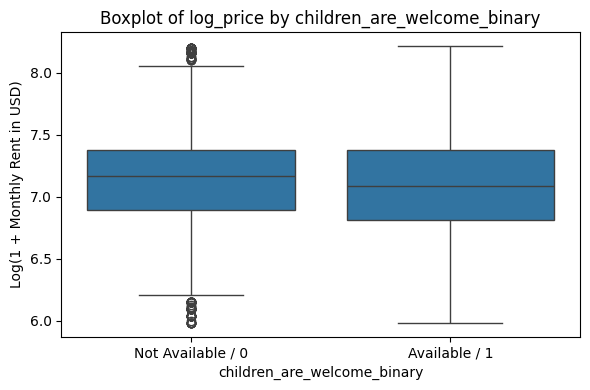

{'column': 'children_are_welcome_binary',
 'mean_diff': -0.023522474934168258,
 'median_diff': -0.07997865643252133,
 't_stat': 4.047715199369128,
 't_squared': 16.383998335203856,
 'df': 8665.027817018017,
 'std0': 0.41182887446112004,
 'std1': 0.4310282285536869,
 'pooled_std': 0.4280900377656342,
 'se0': 0.00529949245445878,
 'se1': 0.0023846491982136256,
 'ci': (-0.03491399883983194, -0.012130951028504571),
 'p_value': 5.2169884190019536e-05,
 'significant': True}

In [131]:
run_ttest_and_plot(df, 'children_are_welcome_binary')


--- Two-Sample T-Test for 'pets_allowed_binary' vs. log_price ---
Group 0 → Mean: 7.1060, Median: 7.0909, StDev: 0.4268, SE: 0.0042, n = 10089
Group 1 → Mean: 7.1131, Median: 7.0909, StDev: 0.4286, SE: 0.0025, n = 28621
Pooled Std Dev: 0.4282
Mean difference: 0.0071
Median difference: 0.0000
T-statistic: -1.4373
T-squared (≈ F): 2.0657
Degrees of freedom (df): 17746
95% CI for difference: (-0.0026, 0.0168)
P-value: 0.1507
Statistically significant? No


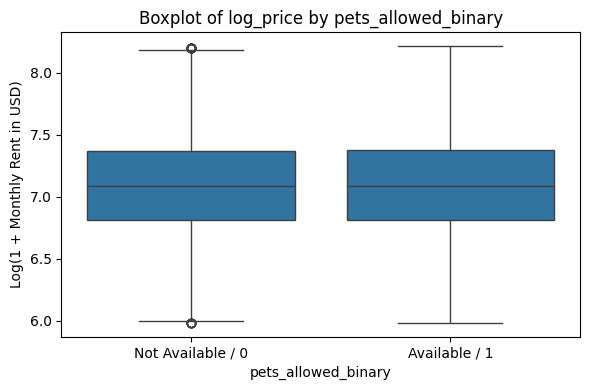

{'column': 'pets_allowed_binary',
 'mean_diff': 0.00711040965383436,
 'median_diff': 0.0,
 't_stat': -1.4372555792288908,
 't_squared': 2.0657036000245745,
 'df': 17746.090464863533,
 'std0': 0.4268025823626755,
 'std1': 0.4286425007313612,
 'pooled_std': 0.42816374674158897,
 'se0': 0.004249158952089665,
 'se1': 0.0025336862125092605,
 'ci': (-0.002586611259548746, 0.016807430567217466),
 'p_value': 0.15066301658840536,
 'significant': False}

In [132]:
run_ttest_and_plot(df, 'pets_allowed_binary')


--- Two-Sample T-Test for 'parking_binary' vs. log_price ---
Group 0 → Mean: 7.1256, Median: 7.1317, StDev: 0.4254, SE: 0.0024, n = 31540
Group 1 → Mean: 7.0480, Median: 7.0656, StDev: 0.4343, SE: 0.0051, n = 7170
Pooled Std Dev: 0.4271
Mean difference: 0.0776
Median difference: 0.0661
T-statistic: 13.7099
T-squared (≈ F): 187.9605
Degrees of freedom (df): 10524
95% CI for difference: (-0.0887, -0.0665)
P-value: 2.049e-42
Statistically significant? Yes (p < 0.05)


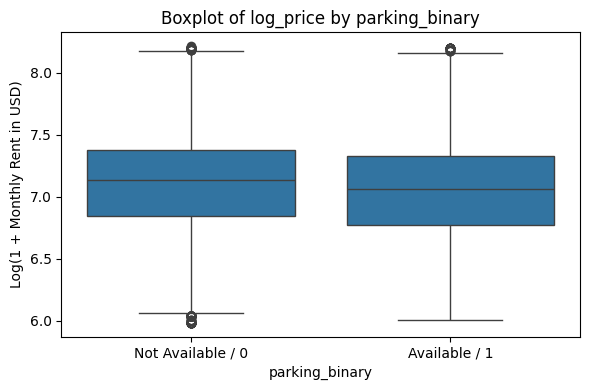

{'column': 'parking_binary',
 'mean_diff': -0.07761690503119478,
 'median_diff': -0.06608514686919431,
 't_stat': 13.709870006994004,
 't_squared': 187.96053560867378,
 'df': 10523.508681718105,
 'std0': 0.425449781472287,
 'std1': 0.4343494947543145,
 'pooled_std': 0.4271120647859071,
 'se0': 0.0023956174088638964,
 'se1': 0.0051295556150601955,
 'ci': (-0.0887142996244813, -0.06651951043790827),
 'p_value': 2.0491110078915782e-42,
 'significant': True}

In [133]:
# Parking - Yes/No
run_ttest_and_plot(df, 'parking_binary')

In [134]:
binary_fields = ['gender', 'duration']
for col in binary_fields:
    convert_to_binary_fields(df, binary_fields)


--- Two-Sample T-Test for 'gender_binary' vs. log_price ---
Group 0 → Mean: 7.1107, Median: 7.0909, StDev: 0.4278, SE: 0.0031, n = 19410
Group 1 → Mean: 7.1118, Median: 7.0909, StDev: 0.4286, SE: 0.0031, n = 19300
Pooled Std Dev: 0.4282
Mean difference: 0.0011
Median difference: 0.0000
T-statistic: -0.2451
T-squared (≈ F): 0.0601
Degrees of freedom (df): 38706
95% CI for difference: (-0.0075, 0.0096)
P-value: 0.8064
Statistically significant? No


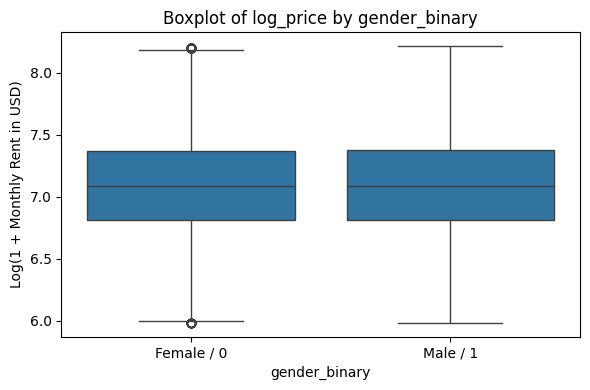

{'column': 'gender_binary',
 'mean_diff': 0.0010668159793736365,
 'median_diff': 0.0,
 't_stat': -0.24510144826451177,
 't_squared': 0.06007471994136114,
 'df': 38705.75938740788,
 'std0': 0.42776364496312347,
 'std1': 0.4285878849415911,
 'pooled_std': 0.4281747921260032,
 'se0': 0.0030703727573781208,
 'se1': 0.003085043101610265,
 'ci': (-0.007464289403886357, 0.00959792136263363),
 'p_value': 0.8063791809623808,
 'significant': False}

In [135]:
# Gender
run_ttest_and_plot(df, 'gender_binary')


--- Two-Sample T-Test for 'duration_binary' vs. log_price ---
Group 0 → Mean: 7.3672, Median: 7.3669, StDev: 0.4071, SE: 0.0053, n = 5928
Group 1 → Mean: 7.0650, Median: 7.0909, StDev: 0.4154, SE: 0.0023, n = 32782
Pooled Std Dev: 0.4141
Mean difference: 0.3022
Median difference: 0.2760
T-statistic: 52.4395
T-squared (≈ F): 2749.8989
Degrees of freedom (df): 8316
95% CI for difference: (-0.3135, -0.2909)
P-value: 0
Statistically significant? Yes (p < 0.05)


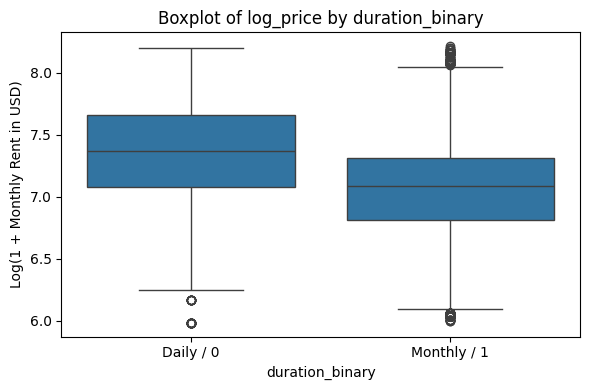

{'column': 'duration_binary',
 'mean_diff': -0.3022158512326705,
 'median_diff': -0.27595664498146544,
 't_stat': 52.439478802604384,
 't_squared': 2749.8989370887944,
 'df': 8315.975748369323,
 'std0': 0.407051687979516,
 'std1': 0.4153752617426849,
 'pooled_std': 0.414111597052449,
 'se0': 0.005286831422095541,
 'se1': 0.002294155782751162,
 'ci': (-0.3135130346136785, -0.2909186678516624),
 'p_value': 0.0,
 'significant': True}

In [136]:
# Duration
run_ttest_and_plot(df, 'duration_binary')


--- Two-Sample T-Test for 'new_construction' vs. log_price ---
Group 0 → Mean: 6.9824, Median: 6.9479, StDev: 0.4188, SE: 0.0028, n = 21928
Group 1 → Mean: 7.2796, Median: 7.3139, StDev: 0.3791, SE: 0.0029, n = 16781
Pooled Std Dev: 0.4020
Mean difference: 0.2972
Median difference: 0.3659
T-statistic: -73.0216
T-squared (≈ F): 5332.1486
Degrees of freedom (df): 37636
95% CI for difference: (0.2892, 0.3051)
P-value: 0
Statistically significant? Yes (p < 0.05)


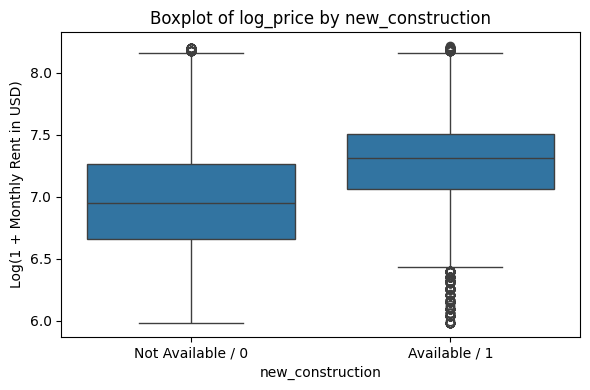

{'column': 'new_construction',
 'mean_diff': 0.29716686149564,
 'median_diff': 0.36594976301849247,
 't_stat': -73.02156235254357,
 't_squared': 5332.148568406408,
 'df': 37635.53313854271,
 'std0': 0.4187592802349875,
 'std1': 0.37910325627516983,
 'pooled_std': 0.40204844133917883,
 'se0': 0.0028279057658886545,
 'se1': 0.0029265004557274626,
 'ci': (0.2891903808644055, 0.30514334212687444),
 'p_value': 0.0,
 'significant': True}

In [137]:
# New Construction
run_ttest_and_plot(df, 'new_construction')


--- Two-Sample T-Test for 'elevator' vs. log_price ---
Group 0 → Mean: 6.9670, Median: 6.9479, StDev: 0.4304, SE: 0.0038, n = 13071
Group 1 → Mean: 7.1848, Median: 7.1709, StDev: 0.4078, SE: 0.0025, n = 25638
Pooled Std Dev: 0.4156
Mean difference: 0.2179
Median difference: 0.2230
T-statistic: -47.9302
T-squared (≈ F): 2297.3032
Degrees of freedom (df): 25092
95% CI for difference: (0.2090, 0.2268)
P-value: 0
Statistically significant? Yes (p < 0.05)


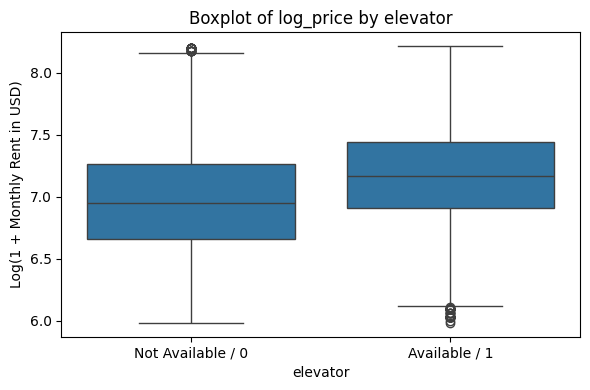

{'column': 'elevator',
 'mean_diff': 0.2178617420734108,
 'median_diff': 0.2229514098975356,
 't_stat': -47.93019057608468,
 't_squared': 2297.3031686597965,
 'df': 25092.478032314204,
 'std0': 0.4304194531783419,
 'std1': 0.40782216404778804,
 'pooled_std': 0.41558989923104384,
 'se0': 0.0037647616344270015,
 'se1': 0.0025469988755479098,
 'ci': (0.2089524980079789, 0.2267709861388427),
 'p_value': 0.0,
 'significant': True}

In [138]:
# Elevator
run_ttest_and_plot(df, 'elevator')

In [139]:
converted_binary_fields = ['parking_garage', 
                           'parking_outdoor_parking', 
                           'parking_not_specified', 
                           'parking_none', 
                           'amenities_air_conditioner',
                           'amenities_parking_space',
                           'amenities_internet',
                           'amenities_none',
                           'amenities_television',
                           'appliances_coffee_maker',
                           'appliances_drying_machine',
                           'appliances_microwave',
                           'appliances_fridge',
                           'appliances_washing_machine',
                           'appliances_water_heater',
                           'appliances_dishwasher',
                           'appliances_stove',
                           'appliances_none',
                           'appliances_iron',
                           'appliances_hair_dryer'
                          ]
for col in converted_binary_fields:
    number_of_rows = len(df)
    number_of_available = df[df[col] == 1].shape[0]
    print(f"Count of {col}: {number_of_available}, "
           f"Portion of na: {number_of_available / number_of_rows:.2f}, "
            f">10%? : {number_of_available / number_of_rows > 0.1}")

Count of parking_garage: 85, Portion of na: 0.00, >10%? : False
Count of parking_outdoor_parking: 1637, Portion of na: 0.04, >10%? : False
Count of parking_not_specified: 5424, Portion of na: 0.14, >10%? : True
Count of parking_none: 31540, Portion of na: 0.81, >10%? : True
Count of amenities_air_conditioner: 1492, Portion of na: 0.04, >10%? : False
Count of amenities_parking_space: 1020, Portion of na: 0.03, >10%? : False
Count of amenities_internet: 2031, Portion of na: 0.05, >10%? : False
Count of amenities_none: 31540, Portion of na: 0.81, >10%? : True
Count of amenities_television: 2128, Portion of na: 0.05, >10%? : False
Count of appliances_coffee_maker: 1013, Portion of na: 0.03, >10%? : False
Count of appliances_drying_machine: 206, Portion of na: 0.01, >10%? : False
Count of appliances_microwave: 1012, Portion of na: 0.03, >10%? : False
Count of appliances_fridge: 2230, Portion of na: 0.06, >10%? : False
Count of appliances_washing_machine: 2111, Portion of na: 0.05, >10%? : F


--- Two-Sample T-Test for 'parking_garage' vs. log_price ---
Group 0 → Mean: 7.1113, Median: 7.0909, StDev: 0.4281, SE: 0.0022, n = 38625
Group 1 → Mean: 7.1188, Median: 7.1301, StDev: 0.4658, SE: 0.0505, n = 85
Pooled Std Dev: 0.4282
Mean difference: 0.0075
Median difference: 0.0392
T-statistic: -0.1488
T-squared (≈ F): 0.0222
Degrees of freedom (df): 84
95% CI for difference: (-0.0930, 0.1081)
P-value: 0.882
Statistically significant? No


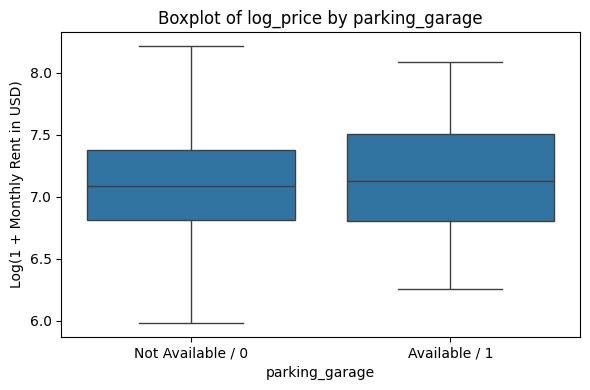

{'column': 'parking_garage',
 'mean_diff': 0.00752641095307105,
 'median_diff': 0.039188688045594056,
 't_stat': -0.14883768652758034,
 't_squared': 0.02215265693088227,
 'df': 84.31258580410339,
 'std0': 0.42808959472328584,
 'std1': 0.46578038781819153,
 'pooled_std': 0.42817497945269745,
 'se0': 0.0021782134011569805,
 'se1': 0.05052097638617576,
 'ci': (-0.09302797980317555, 0.10808080170931765),
 'p_value': 0.882037132554054,
 'significant': False}

In [142]:
# Parking - Garage
run_ttest_and_plot(df, 'parking_garage')


--- Two-Sample T-Test for 'parking_outdoor_parking' vs. log_price ---
Group 0 → Mean: 7.1193, Median: 7.0909, StDev: 0.4257, SE: 0.0022, n = 37073
Group 1 → Mean: 6.9293, Median: 6.9479, StDev: 0.4432, SE: 0.0110, n = 1637
Pooled Std Dev: 0.4265
Mean difference: 0.1900
Median difference: 0.1430
T-statistic: 16.9994
T-squared (≈ F): 288.9789
Degrees of freedom (df): 1772
95% CI for difference: (-0.2119, -0.1680)
P-value: 3.739e-60
Statistically significant? Yes (p < 0.05)


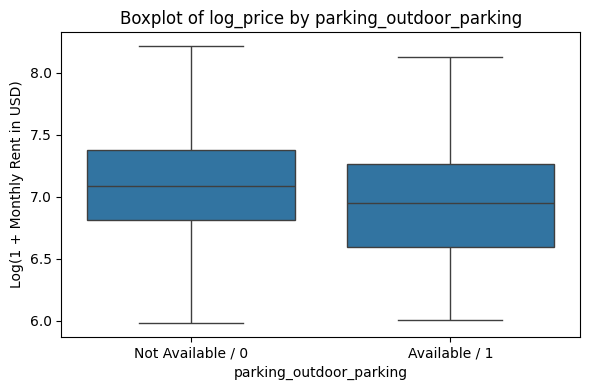

{'column': 'parking_outdoor_parking',
 'mean_diff': -0.18996226418852125,
 'median_diff': -0.14297275346501426,
 't_stat': 16.999379665033302,
 't_squared': 288.97890899594773,
 'df': 1771.8956509776162,
 'std0': 0.4257118976284354,
 'std1': 0.44318692532757903,
 'pooled_std': 0.42646497553171026,
 'se0': 0.002210990732686469,
 'se1': 0.010953744329352038,
 'ci': (-0.21187916363196987, -0.16804536474507262),
 'p_value': 3.73852890683363e-60,
 'significant': True}

In [143]:
# Parking - Outdoor parking
run_ttest_and_plot(df, 'parking_outdoor_parking')


--- Two-Sample T-Test for 'parking_covered_parking' vs. log_price ---
Group 0 → Mean: 7.1111, Median: 7.0909, StDev: 0.4282, SE: 0.0022, n = 38541
Group 1 → Mean: 7.1410, Median: 7.0909, StDev: 0.4108, SE: 0.0316, n = 169
Pooled Std Dev: 0.4282
Mean difference: 0.0299
Median difference: 0.0000
T-statistic: -0.9423
T-squared (≈ F): 0.8879
Degrees of freedom (df): 170
95% CI for difference: (-0.0327, 0.0924)
P-value: 0.3474
Statistically significant? No


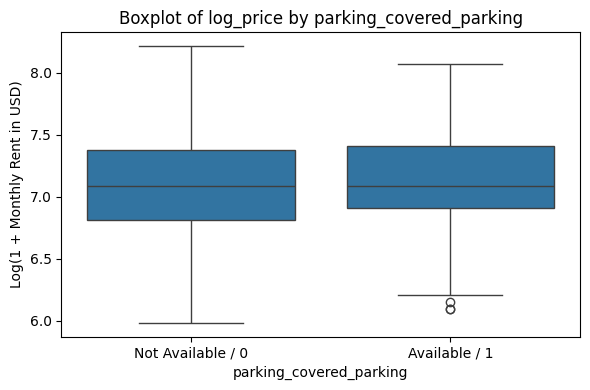

{'column': 'parking_covered_parking',
 'mean_diff': 0.0298505074528137,
 'median_diff': 0.0,
 't_stat': -0.9422875005301466,
 't_squared': 0.8879057336553511,
 'df': 169.60456156048025,
 'std0': 0.4282445848220181,
 'std1': 0.4108464777775977,
 'pooled_std': 0.4281706012520741,
 'se0': 0.002181375296576621,
 'se1': 0.03160357521366136,
 'ci': (-0.032684955799139714, 0.09238597070476712),
 'p_value': 0.34738571377766725,
 'significant': False}

In [144]:
# Parking - Covered parking
run_ttest_and_plot(df, 'parking_covered_parking')


--- Two-Sample T-Test for 'parking_binary' vs. log_price ---
Group 0 → Mean: 7.1256, Median: 7.1317, StDev: 0.4254, SE: 0.0024, n = 31540
Group 1 → Mean: 7.0480, Median: 7.0656, StDev: 0.4343, SE: 0.0051, n = 7170
Pooled Std Dev: 0.4271
Mean difference: 0.0776
Median difference: 0.0661
T-statistic: 13.7099
T-squared (≈ F): 187.9605
Degrees of freedom (df): 10524
95% CI for difference: (-0.0887, -0.0665)
P-value: 2.049e-42
Statistically significant? Yes (p < 0.05)


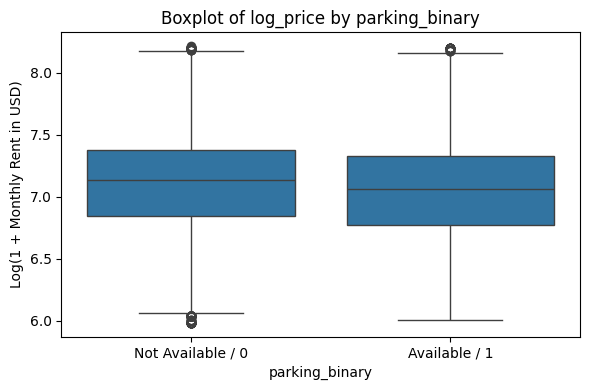

{'column': 'parking_binary',
 'mean_diff': -0.07761690503119478,
 'median_diff': -0.06608514686919431,
 't_stat': 13.709870006994004,
 't_squared': 187.96053560867378,
 'df': 10523.508681718105,
 'std0': 0.425449781472287,
 'std1': 0.4343494947543145,
 'pooled_std': 0.4271120647859071,
 'se0': 0.0023956174088638964,
 'se1': 0.0051295556150601955,
 'ci': (-0.0887142996244813, -0.06651951043790827),
 'p_value': 2.0491110078915782e-42,
 'significant': True}

In [145]:
# Parking - Binary
run_ttest_and_plot(df, 'parking_binary')


--- Two-Sample T-Test for 'parking_not_specified' vs. log_price ---
Group 0 → Mean: 7.1158, Median: 7.0909, StDev: 0.4286, SE: 0.0023, n = 33286
Group 1 → Mean: 7.0833, Median: 7.0794, StDev: 0.4246, SE: 0.0058, n = 5424
Pooled Std Dev: 0.4280
Mean difference: 0.0325
Median difference: 0.0115
T-statistic: 5.2175
T-squared (≈ F): 27.2222
Degrees of freedom (df): 7340
95% CI for difference: (-0.0447, -0.0203)
P-value: 1.863e-07
Statistically significant? Yes (p < 0.05)


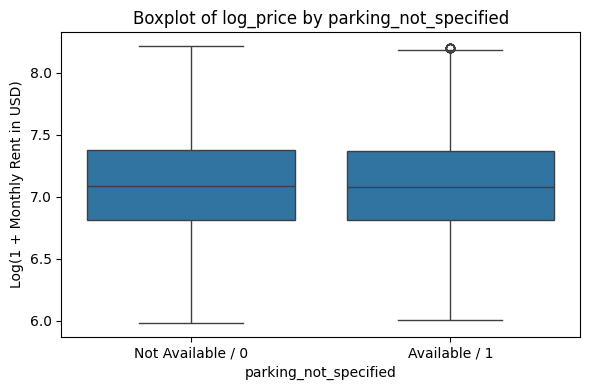

{'column': 'parking_not_specified',
 'mean_diff': -0.03248449666299624,
 'median_diff': -0.011514834650752093,
 't_stat': 5.2174856426899785,
 't_squared': 27.22215643167606,
 'df': 7339.656784198063,
 'std0': 0.4285745072897195,
 'std1': 0.4246483566785468,
 'pooled_std': 0.4280266219625274,
 'se0': 0.002349067682700395,
 'se1': 0.005765933209156517,
 'ci': (-0.04468940703258401, -0.020279586293408473),
 'p_value': 1.863326193675354e-07,
 'significant': True}

In [146]:
# Parking - Not Specified
run_ttest_and_plot(df, 'parking_not_specified')


--- Two-Sample T-Test for 'amenities_air_conditioner' vs. log_price ---
Group 0 → Mean: 7.1118, Median: 7.0909, StDev: 0.4297, SE: 0.0022, n = 37218
Group 1 → Mean: 7.0984, Median: 7.0909, StDev: 0.3889, SE: 0.0101, n = 1492
Pooled Std Dev: 0.4282
Mean difference: 0.0134
Median difference: 0.0000
T-statistic: 1.2966
T-squared (≈ F): 1.6811
Degrees of freedom (df): 1640
95% CI for difference: (-0.0336, 0.0069)
P-value: 0.195
Statistically significant? No


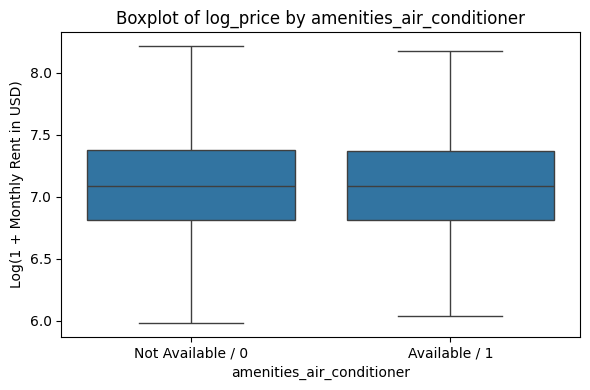

{'column': 'amenities_air_conditioner',
 'mean_diff': -0.013368417026480728,
 'median_diff': 0.0,
 't_stat': 1.296568184053977,
 't_squared': 1.6810890559010272,
 'df': 1640.3634635455646,
 'std0': 0.42966723410985813,
 'std1': 0.388859761924634,
 'pooled_std': 0.4281673902813664,
 'se0': 0.0022271820636973216,
 'se1': 0.01006719763022764,
 'ci': (-0.03359177548712005, 0.006854941434158594),
 'p_value': 0.19496216689623916,
 'significant': False}

In [147]:
# Amenities - Air Conditioner
run_ttest_and_plot(df, 'amenities_air_conditioner')


--- Two-Sample T-Test for 'amenities_parking_space' vs. log_price ---
Group 0 → Mean: 7.1137, Median: 7.0909, StDev: 0.4279, SE: 0.0022, n = 37690
Group 1 → Mean: 7.0217, Median: 7.0656, StDev: 0.4286, SE: 0.0134, n = 1020
Pooled Std Dev: 0.4279
Mean difference: 0.0920
Median difference: 0.0253
T-statistic: 6.7682
T-squared (≈ F): 45.8083
Degrees of freedom (df): 1075
95% CI for difference: (-0.1187, -0.0654)
P-value: 2.14e-11
Statistically significant? Yes (p < 0.05)


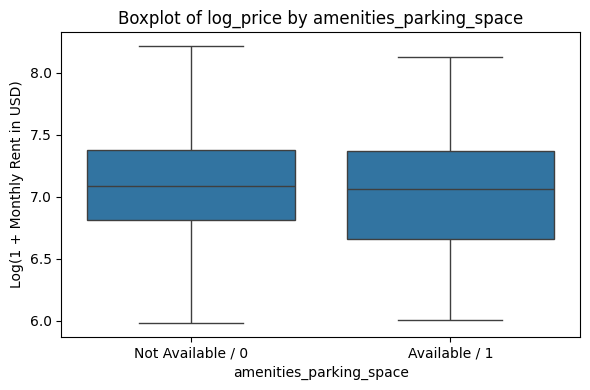

{'column': 'amenities_parking_space',
 'mean_diff': -0.09204116510711913,
 'median_diff': -0.02529645848226636,
 't_stat': 6.768184055990454,
 't_squared': 45.80831541576339,
 'df': 1074.701254593001,
 'std0': 0.4279034742538783,
 'std1': 0.42857763454658965,
 'pooled_std': 0.4279212353427754,
 'se0': 0.002204107355666277,
 'se1': 0.013419286268444418,
 'ci': (-0.11872494940023007, -0.06535738081400819),
 'p_value': 2.140138047863628e-11,
 'significant': True}

In [148]:
# Amenities - Parking Space
run_ttest_and_plot(df, 'amenities_parking_space')


--- Two-Sample T-Test for 'amenities_internet' vs. log_price ---
Group 0 → Mean: 7.1186, Median: 7.0909, StDev: 0.4269, SE: 0.0022, n = 36679
Group 1 → Mean: 6.9783, Median: 6.9479, StDev: 0.4297, SE: 0.0095, n = 2031
Pooled Std Dev: 0.4270
Mean difference: 0.1404
Median difference: 0.1430
T-statistic: 14.3344
T-squared (≈ F): 205.4752
Degrees of freedom (df): 2258
95% CI for difference: (-0.1596, -0.1212)
P-value: 1.146e-44
Statistically significant? Yes (p < 0.05)


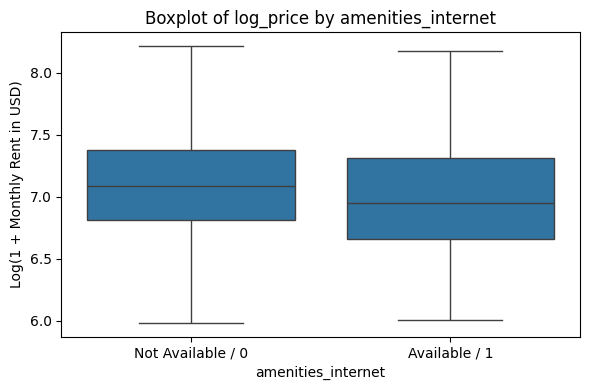

{'column': 'amenities_internet',
 'mean_diff': -0.14035116607298015,
 'median_diff': -0.14297275346501426,
 't_stat': 14.334404642283525,
 't_squared': 205.47515644871947,
 'df': 2257.594925833857,
 'std0': 0.42688332639068927,
 'std1': 0.4296708408316755,
 'pooled_std': 0.4270299667409873,
 'se0': 0.0022289506272885054,
 'se1': 0.009534126722408089,
 'ci': (-0.15955187902401669, -0.12115045312194363),
 'p_value': 1.1457443565592343e-44,
 'significant': True}

In [149]:
# Amenities - Internet
run_ttest_and_plot(df, 'amenities_internet')


--- Two-Sample T-Test for 'amenities_none' vs. log_price ---
Group 0 → Mean: 7.0480, Median: 7.0656, StDev: 0.4343, SE: 0.0051, n = 7170
Group 1 → Mean: 7.1256, Median: 7.1317, StDev: 0.4254, SE: 0.0024, n = 31540
Pooled Std Dev: 0.4271
Mean difference: 0.0776
Median difference: 0.0661
T-statistic: -13.7099
T-squared (≈ F): 187.9605
Degrees of freedom (df): 10524
95% CI for difference: (0.0665, 0.0887)
P-value: 2.049e-42
Statistically significant? Yes (p < 0.05)


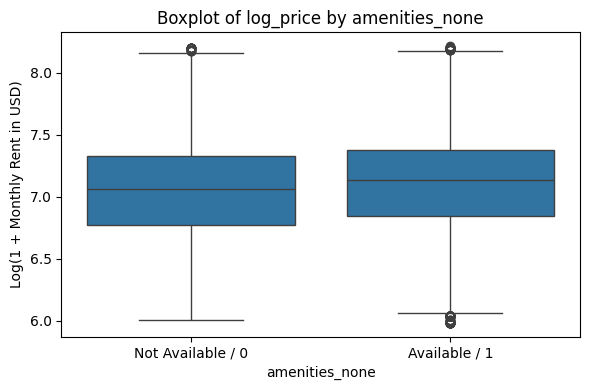

{'column': 'amenities_none',
 'mean_diff': 0.07761690503119478,
 'median_diff': 0.06608514686919431,
 't_stat': -13.709870006994004,
 't_squared': 187.96053560867378,
 'df': 10523.508681718105,
 'std0': 0.4343494947543145,
 'std1': 0.425449781472287,
 'pooled_std': 0.4271120647859071,
 'se0': 0.0051295556150601955,
 'se1': 0.0023956174088638964,
 'ci': (0.06651951043790827, 0.0887142996244813),
 'p_value': 2.0491110078915782e-42,
 'significant': True}

In [150]:
# Amenities - None
run_ttest_and_plot(df, 'amenities_none')


--- Two-Sample T-Test for 'amenities_binary' vs. log_price ---
Group 0 → Mean: 7.1256, Median: 7.1317, StDev: 0.4254, SE: 0.0024, n = 31540
Group 1 → Mean: 7.0480, Median: 7.0656, StDev: 0.4343, SE: 0.0051, n = 7170
Pooled Std Dev: 0.4271
Mean difference: 0.0776
Median difference: 0.0661
T-statistic: 13.7099
T-squared (≈ F): 187.9605
Degrees of freedom (df): 10524
95% CI for difference: (-0.0887, -0.0665)
P-value: 2.049e-42
Statistically significant? Yes (p < 0.05)


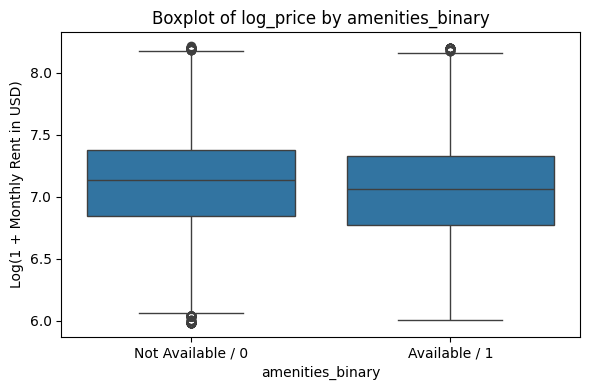

{'column': 'amenities_binary',
 'mean_diff': -0.07761690503119478,
 'median_diff': -0.06608514686919431,
 't_stat': 13.709870006994004,
 't_squared': 187.96053560867378,
 'df': 10523.508681718105,
 'std0': 0.425449781472287,
 'std1': 0.4343494947543145,
 'pooled_std': 0.4271120647859071,
 'se0': 0.0023956174088638964,
 'se1': 0.0051295556150601955,
 'ci': (-0.0887142996244813, -0.06651951043790827),
 'p_value': 2.0491110078915782e-42,
 'significant': True}

In [151]:
# Amenities - Binary
run_ttest_and_plot(df, 'amenities_binary')


--- Two-Sample T-Test for 'amenities_television' vs. log_price ---
Group 0 → Mean: 7.1201, Median: 7.0909, StDev: 0.4260, SE: 0.0022, n = 36582
Group 1 → Mean: 6.9593, Median: 6.9479, StDev: 0.4374, SE: 0.0095, n = 2128
Pooled Std Dev: 0.4266
Mean difference: 0.1608
Median difference: 0.1430
T-statistic: 16.5161
T-squared (≈ F): 272.7820
Degrees of freedom (df): 2368
95% CI for difference: (-0.1799, -0.1418)
P-value: 4.395e-58
Statistically significant? Yes (p < 0.05)


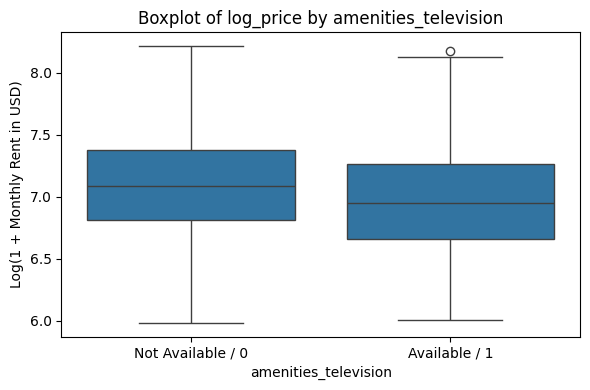

{'column': 'amenities_television',
 'mean_diff': -0.16084875369547014,
 'median_diff': -0.14297275346501426,
 't_stat': 16.516111909451688,
 't_squared': 272.7819526055319,
 'df': 2367.801271444264,
 'std0': 0.4259691770212594,
 'std1': 0.4373529231611685,
 'pooled_std': 0.42660260007606843,
 'se0': 0.002227124277635558,
 'se1': 0.00948082699683914,
 'ci': (-0.1799464081158295, -0.1417510992751108),
 'p_value': 4.3947470601574576e-58,
 'significant': True}

In [152]:
# Amenities - Television
run_ttest_and_plot(df, 'amenities_television')


--- Two-Sample T-Test for 'appliances_binary' vs. log_price ---
Group 0 → Mean: 7.1256, Median: 7.1317, StDev: 0.4254, SE: 0.0024, n = 31540
Group 1 → Mean: 7.0480, Median: 7.0656, StDev: 0.4343, SE: 0.0051, n = 7170
Pooled Std Dev: 0.4271
Mean difference: 0.0776
Median difference: 0.0661
T-statistic: 13.7099
T-squared (≈ F): 187.9605
Degrees of freedom (df): 10524
95% CI for difference: (-0.0887, -0.0665)
P-value: 2.049e-42
Statistically significant? Yes (p < 0.05)


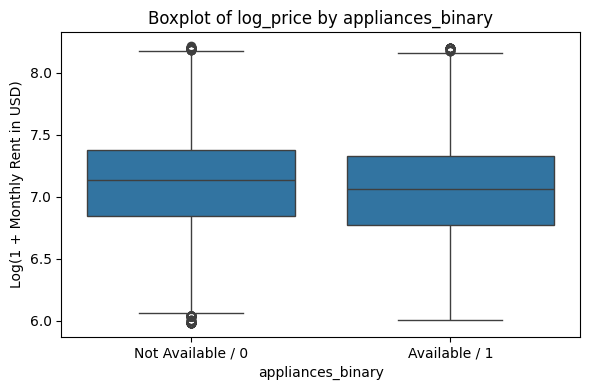

{'column': 'appliances_binary',
 'mean_diff': -0.07761690503119478,
 'median_diff': -0.06608514686919431,
 't_stat': 13.709870006994004,
 't_squared': 187.96053560867378,
 'df': 10523.508681718105,
 'std0': 0.425449781472287,
 'std1': 0.4343494947543145,
 'pooled_std': 0.4271120647859071,
 'se0': 0.0023956174088638964,
 'se1': 0.0051295556150601955,
 'ci': (-0.0887142996244813, -0.06651951043790827),
 'p_value': 2.0491110078915782e-42,
 'significant': True}

In [153]:
# Appliances - Binary
run_ttest_and_plot(df, 'appliances_binary')

In [154]:
columns_converted_to_binary = {
    'appliances'}

for col in columns_converted_to_binary:
    print_field_values(df, col)

appliances
none                                                                                                     21772
none                                                                                                      9768
                                                                                                          4901
fridge,_stove,_microwave,_coffee_maker,_washing_machine,_water_heater,_iron,_hair_dryer                    208
fridge,_stove,_washing_machine                                                                             168
                                                                                                         ...  
fridge,_stove,_dishwasher,_washing_machine,_drying_machine,_iron                                             1
fridge,_stove,_microwave,_dishwasher,_drying_machine,_water_heater,_iron,_hair_dryer                         1
fridge,_stove,_microwave,_coffee_maker,_dishwasher,_washing_machine,_drying_machine,_iron,_hair_dryer

In [155]:
def write_field_values_to_txt(df, column_name, filename='field_values.txt'):
    value_counts = df[column_name].value_counts()
    
    with open(filename, 'a') as f:  # 'a' appends to the file instead of overwriting
        f.write(f"Column: {column_name}\n")
        f.write(value_counts.to_string())
        f.write("\n\n")


In [156]:
columns_converted_to_binary = {'appliances'}

for col in columns_converted_to_binary:
    write_field_values_to_txt(df, col)

In [157]:
def print_count_occurrences(df, category_prefix):
    """
    Print the frequency of different counts (e.g., number of appliances) per row.

    Args:
        df (pd.DataFrame): Your DataFrame.
        category_prefix (str): Prefix of the columns to include (e.g., 'appliances_', 'amenities_').
    """
    df = df.drop(columns=[col for col in df.columns if col.endswith('_cleaned') 
                          or col.endswith('_count') 
                          or col.endswith('_binary') 
                          or col.endswith('_wrapped')
                          or col.endswith('_not_specified')
                         ])
    # Get relevant columns
    group_cols = [col for col in df.columns if col.startswith(category_prefix)]
    print(group_cols)
    
    none_cols = [col for col in group_cols if col.endswith('_none')]
    valid_cols = [col for col in group_cols if col not in none_cols]
    print(valid_cols)

    # Ensure binary numeric values (robust)
    df_temp = df[group_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Remove rows where all fields are 0 (i.e., truly missing group)
    df_temp = df_temp[df_temp.sum(axis=1) > 0]
    
    # Compute count with correct logic
    if none_cols:
        none_col = none_cols[0]
        count_series = df_temp.apply(lambda row: 0 if row[none_col] == 1 else row[valid_cols].sum(), axis=1)
    else:
        count_series = df_temp[valid_cols].sum(axis=1)

    # Print value counts
    print(f"\n▶ Occurrence of different {category_prefix[:-1]} counts:")
    print(count_series.value_counts().sort_index())


In [158]:
print_count_occurrences(df, 'appliances_')

['appliances_coffee_maker', 'appliances_dishwasher', 'appliances_fridge', 'appliances_washing_machine', 'appliances_iron', 'appliances_none', 'appliances_hair_dryer', 'appliances_drying_machine', 'appliances_microwave', 'appliances_stove', 'appliances_water_heater']
['appliances_coffee_maker', 'appliances_dishwasher', 'appliances_fridge', 'appliances_washing_machine', 'appliances_iron', 'appliances_hair_dryer', 'appliances_drying_machine', 'appliances_microwave', 'appliances_stove', 'appliances_water_heater']

▶ Occurrence of different appliances counts:
0     31540
1        53
2       123
3       261
4       364
5       294
6       312
7       382
8       300
9        95
10       85
Name: count, dtype: int64


In [159]:
print_count_occurrences(df, 'amenities_')

['amenities_air_conditioner', 'amenities_none', 'amenities_internet', 'amenities_parking_space', 'amenities_television']
['amenities_air_conditioner', 'amenities_internet', 'amenities_parking_space', 'amenities_television']

▶ Occurrence of different amenities counts:
0    31540
1      212
2      464
3      881
4      722
Name: count, dtype: int64


In [160]:
print_count_occurrences(df, 'parking_')

['parking_none', 'parking_covered_parking', 'parking_garage', 'parking_outdoor_parking']
['parking_covered_parking', 'parking_garage', 'parking_outdoor_parking']

▶ Occurrence of different parking counts:
0    31540
1     1622
2      103
3       21
Name: count, dtype: int64


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Updated function including SS, MS, and ANOVA table details
def anova_by_count_group(df, category_prefix, target_col='log_price', min_group_size=30):
    df = df.drop(columns=[col for col in df.columns if col.endswith('_cleaned') 
                          or col.endswith('_count') 
                          or col.endswith('_binary') 
                          or col.endswith('_wrapped')
                          or col.endswith('_not_specified')
                         ], errors='ignore')

    group_cols = [col for col in df.columns if col.startswith(category_prefix)]
    none_col = [col for col in group_cols if col.endswith('_none')]
    valid_cols = [col for col in group_cols if col not in none_col]

    df[valid_cols] = df[valid_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

    count_col = f"{category_prefix}count"
    if none_col:
        none_col = none_col[0]
        df[count_col] = df.apply(lambda row: 0 if row[none_col] == 1 else row[valid_cols].sum(), axis=1)
    else:
        df[count_col] = df[valid_cols].sum(axis=1)

    group_sizes = df[count_col].value_counts()
    valid_groups = group_sizes[group_sizes >= min_group_size].index
    filtered_df = df[df[count_col].isin(valid_groups)]

    groups = [g[target_col].dropna() for _, g in filtered_df.groupby(count_col)]
    if len(groups) < 2:
        print("!! Not enough groups with sufficient samples for ANOVA.")
        return

    stat, p_value = f_oneway(*groups)

    group_means = filtered_df.groupby(count_col)[target_col].mean()
    overall_mean = filtered_df[target_col].mean()

    ss_between = sum(len(g) * (group_means[name] - overall_mean) ** 2
                     for name, g in filtered_df.groupby(count_col))
    ss_within = sum(((g[target_col] - group_means[name]) ** 2).sum()
                    for name, g in filtered_df.groupby(count_col))
    ss_total = ss_between + ss_within

    df_between = len(group_means) - 1
    df_within = len(filtered_df) - len(group_means)

    ms_between = ss_between / df_between
    ms_within = ss_within / df_within

    print(f"\n--------ANOVA for {category_prefix[:-1]} count")
    print(f"F-statistic (scipy): {stat:.4f}")
    print(f"P-value: {p_value:.4g}")
    print("Significant differences between groups." if p_value < 0.05 else "No significant differences between groups.")

    print("\nANOVA Summary (Manual Calculation)")
    print(f"DF Between: {df_between}, DF Within: {df_within}")
    print(f"SS Between: {ss_between:.2f}, SS Within: {ss_within:.2f}, SS Total: {ss_total:.2f}")
    print(f"MS Between: {ms_between:.2f}, MS Within: {ms_within:.2f}")
    print(f"F-statistic (manual): {ms_between / ms_within:.4f}")

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=filtered_df, x=count_col, y=target_col, showfliers=True)
    
    plt.scatter(x=range(len(group_means)), y=group_means.values, color='red', zorder=10, label='Mean')
    
    plt.title(f"Boxplot: Price vs Number of {category_prefix[:-1].capitalize()}")
    plt.xlabel(f"Number of {category_prefix[:-1].capitalize()}")
    plt.ylabel('Log(1 + Monthly Rent in USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    group_stats = filtered_df.groupby(count_col)[target_col].agg(['mean', 'count', 'std'])
    group_stats['se'] = group_stats['std'] / np.sqrt(group_stats['count'])
    group_stats['ci95'] = 1.96 * group_stats['se']

    plt.figure(figsize=(8, 5))
    plt.errorbar(x=group_stats.index, y=group_stats['mean'], yerr=group_stats['ci95'],
                 fmt='o', color='red', ecolor='black', capsize=5)
    plt.title(f"95% CI for Mean Log Rent by {category_prefix[:-1].capitalize()} Count")
    plt.xlabel(f"Number of {category_prefix[:-1].capitalize()}")
    plt.ylabel('Mean Log(1 + Monthly Rent in USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return group_stats.reset_index()



--------ANOVA for appliances count
F-statistic (scipy): 89.9481
P-value: 1.292e-184
Significant differences between groups.

ANOVA Summary (Manual Calculation)
DF Between: 10, DF Within: 38699
SS Between: 161.20, SS Within: 6935.29, SS Total: 7096.49
MS Between: 16.12, MS Within: 0.18
F-statistic (manual): 89.9481


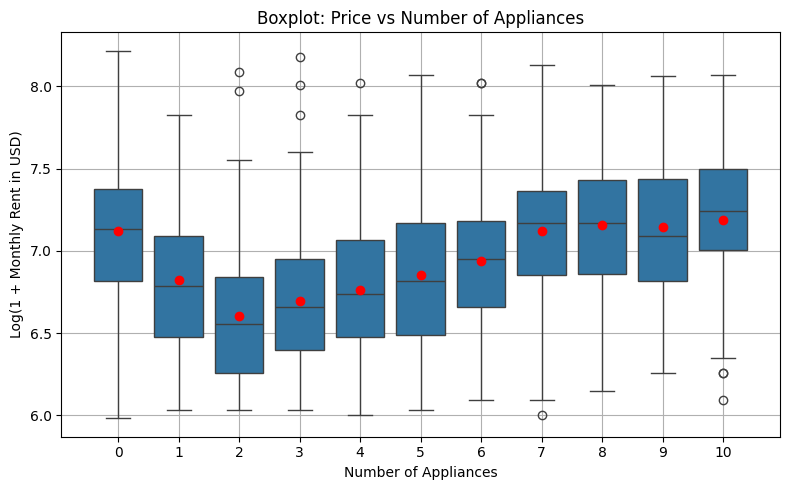

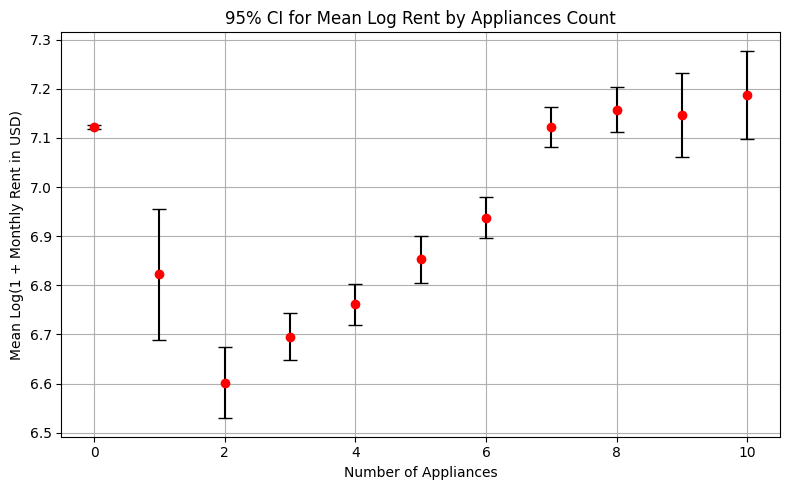

appliances_count      mean  count       std        se      ci95
0                  0  7.122680  36441  0.424467  0.002224  0.004358
1                  1  6.822275     53  0.496162  0.068153  0.133580
2                  2  6.601910    123  0.410945  0.037054  0.072625
3                  3  6.695115    261  0.396629  0.024551  0.048119
4                  4  6.761595    364  0.405041  0.021230  0.041611
5                  5  6.852598    294  0.412983  0.024086  0.047208
6                  6  6.937473    312  0.373220  0.021129  0.041414
7                  7  7.122945    382  0.406270  0.020787  0.040742
8                  8  7.157699    300  0.399681  0.023076  0.045228
9                  9  7.146880     95  0.424043  0.043506  0.085272
10                10  7.187228     85  0.424139  0.046004  0.090168

In [162]:
# Appliances
anova_by_count_group(df, 'appliances_')


--------ANOVA for amenities count
F-statistic (scipy): 215.4198
P-value: 3.689e-183
Significant differences between groups.

ANOVA Summary (Manual Calculation)
DF Between: 4, DF Within: 38705
SS Between: 154.55, SS Within: 6941.94, SS Total: 7096.49
MS Between: 38.64, MS Within: 0.18
F-statistic (manual): 215.4198


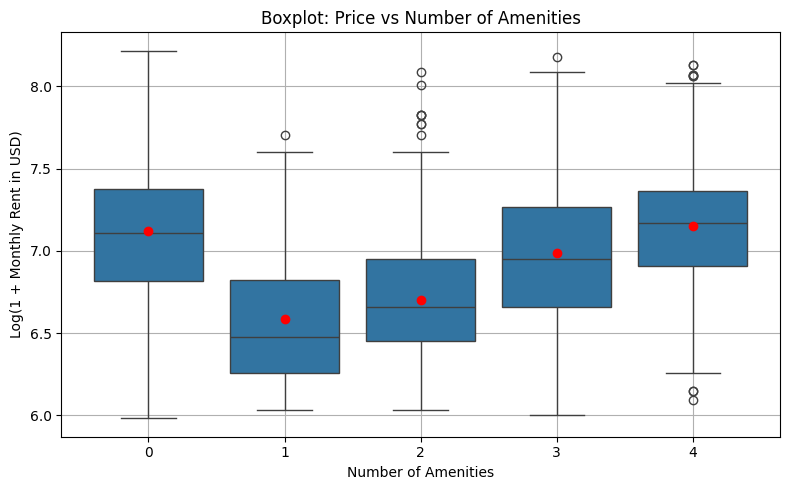

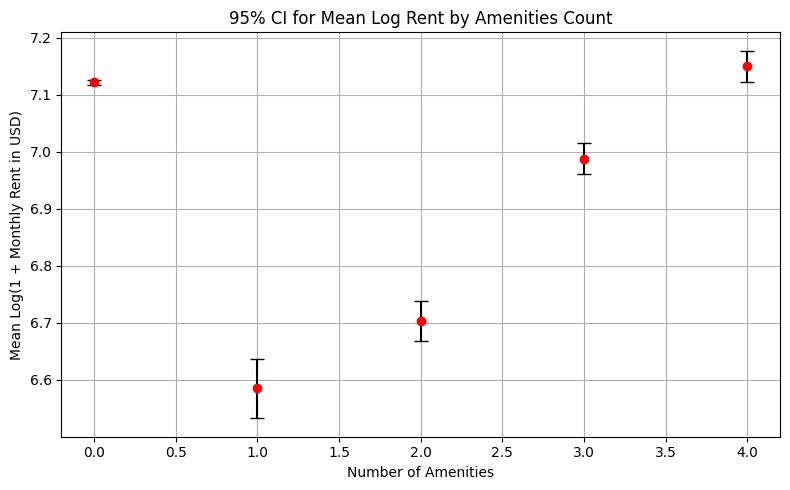

amenities_count      mean  count       std        se      ci95
0                0  7.121742  36431  0.425236  0.002228  0.004367
1                1  6.584843    212  0.389225  0.026732  0.052395
2                2  6.703072    464  0.388371  0.018030  0.035338
3                3  6.987952    881  0.416128  0.014020  0.027479
4                4  7.150109    722  0.372914  0.013878  0.027202

In [163]:
# Amenities
anova_by_count_group(df, 'amenities_')


--------ANOVA for parking count
F-statistic (scipy): 165.6125
P-value: 2.407e-72
Significant differences between groups.

ANOVA Summary (Manual Calculation)
DF Between: 2, DF Within: 38686
SS Between: 60.21, SS Within: 7032.31, SS Total: 7092.52
MS Between: 30.10, MS Within: 0.18
F-statistic (manual): 165.6125


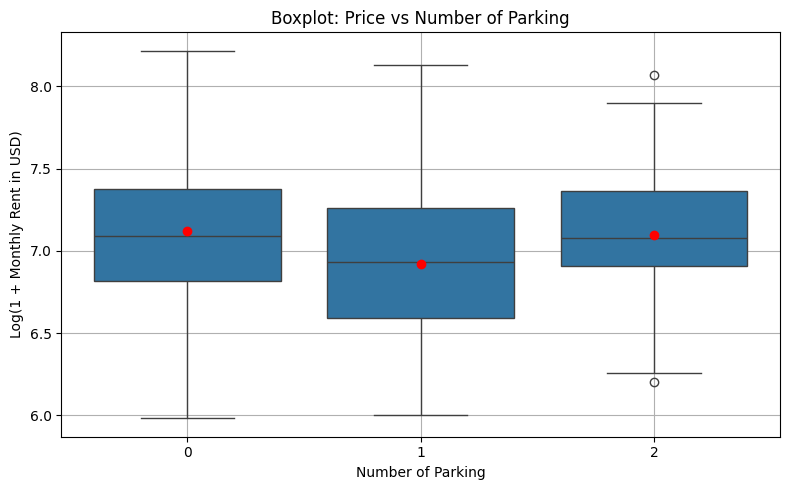

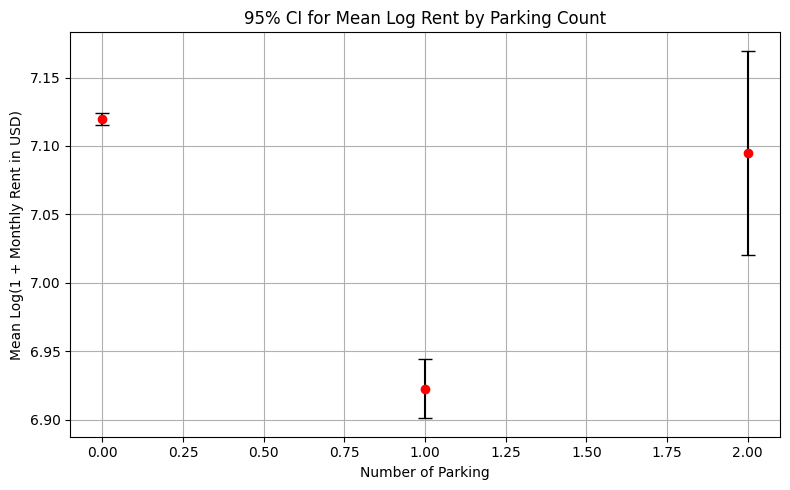

parking_count      mean  count       std        se      ci95
0              0  7.119435  36964  0.425590  0.002214  0.004339
1              1  6.922630   1622  0.445738  0.011068  0.021693
2              2  7.094910    103  0.386788  0.038111  0.074698

In [164]:
# Parking
anova_by_count_group(df, 'parking_')

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

def anova_categorical_column(df, column_name, target_col='log_price', min_group_size=30):
    """
    Perform ANOVA and plot for a single categorical column against target price, 
    including DF, SS, MS, CI, and mean markers.
    """
    print(f"\n--- ANOVA for {column_name} ---")

    # Drop NaNs
    temp_df = df[[column_name, target_col]].dropna()

    # Filter valid groups
    group_sizes = temp_df[column_name].value_counts()
    valid_groups = group_sizes[group_sizes >= min_group_size].index
    temp_df = temp_df[temp_df[column_name].isin(valid_groups)]

    if temp_df[column_name].nunique() < 2:
        print("Not enough groups with sufficient samples.")
        return

    # Prepare groups
    grouped = temp_df.groupby(column_name)[target_col]
    groups = [group for _, group in grouped]

    # Run ANOVA
    stat, p_value = f_oneway(*groups)
    print(f"F-statistic: {stat:.4f}")
    print(f"P-value:    {p_value:.4g}")
    print("→ Significant differences." if p_value < 0.05 else "→ No significant differences.")

    # ANOVA Table values
    k = len(groups)                   # number of groups
    N = len(temp_df)                 # total observations
    grand_mean = temp_df[target_col].mean()

    ss_between = sum(g.size * (g.mean() - grand_mean)**2 for g in groups)
    ss_within = sum(((g - g.mean())**2).sum() for g in groups)
    df_between = k - 1
    df_within = N - k
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    f_check = ms_between / ms_within

    print("\nANOVA Table Summary:")
    print(f"{'Source':<10} {'DF':>10} {'SS':>20} {'MS':>20}")
    print(f"{'Between':<10} {df_between:>10,} {ss_between:>20,.2f} {ms_between:>20,.2f}")
    print(f"{'Within':<10} {df_within:>10,} {ss_within:>20,.2f} {ms_within:>20,.2f}")
    print(f"{'Total':<10} {N-1:>10,} {(ss_between + ss_within):>20,.2f}")

    # Boxplot with red dot for mean
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=temp_df, x=column_name, y=target_col, showfliers=True)
    means = grouped.mean()
    plt.scatter(x=range(len(means)), y=means.values, color='red', zorder=10, label='Mean')
    plt.title(f"{target_col} vs {column_name}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Log(1 + Monthly Rent in USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # CI Plot
    stats_df = grouped.agg(['mean', 'median', 'min', 'max', 'count', 'std'])
    stats_df['iqr'] = grouped.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
    stats_df['se'] = stats_df['std'] / np.sqrt(stats_df['count'])
    stats_df['ci95'] = 1.96 * stats_df['se']

    plt.figure(figsize=(10, 5))
    plt.errorbar(x=stats_df.index, y=stats_df['mean'], yerr=stats_df['ci95'],
                 fmt='o', color='red', ecolor='black', capsize=5)
    plt.title(f"95% CI for Mean {target_col} by {column_name}")
    plt.xlabel(column_name)
    plt.ylabel(f"Mean Log(1 + Monthly Rent in USD)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return stats_df.reset_index()



--- ANOVA for balcony ---
F-statistic: 1310.2722
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             3               654.23               218.08
Within         38,704             6,441.76                 0.17
Total          38,707             7,095.99


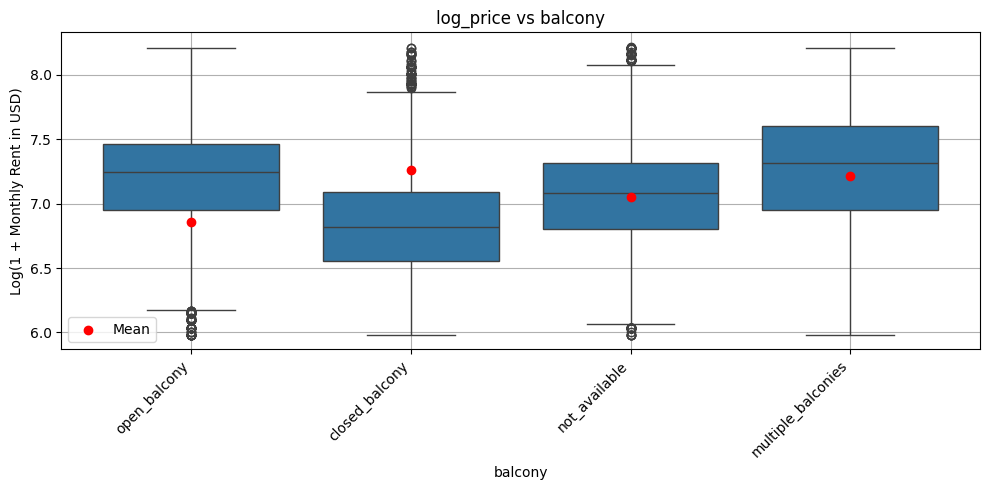

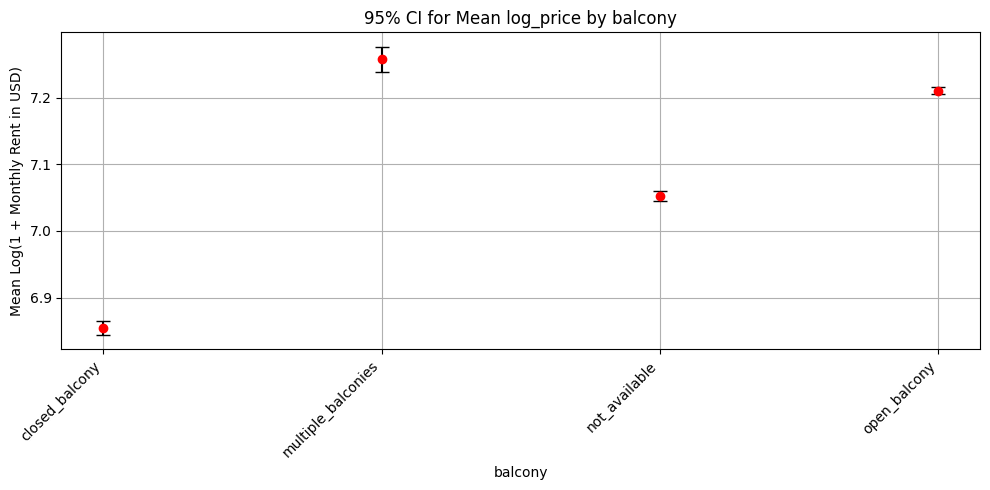

balcony      mean  count       std        se      ci95
0      closed_balcony  6.854654   5750  0.407132  0.005369  0.010523
1  multiple_balconies  7.257617   2495  0.474362  0.009497  0.018614
2       not_available  7.052536  12094  0.408728  0.003717  0.007285
3        open_balcony  7.210378  18369  0.397851  0.002935  0.005754

In [166]:
# Balcony
anova_categorical_column(df, 'balcony')


--- ANOVA for furniture ---
F-statistic: 155.7851
P-value:    2.28e-100
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             3                84.66                28.22
Within         38,706             7,011.83                 0.18
Total          38,709             7,096.49


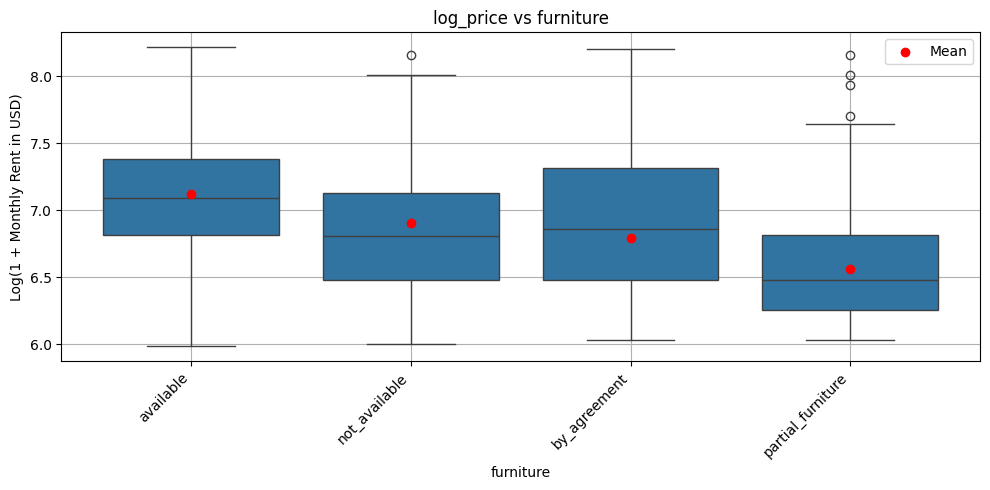

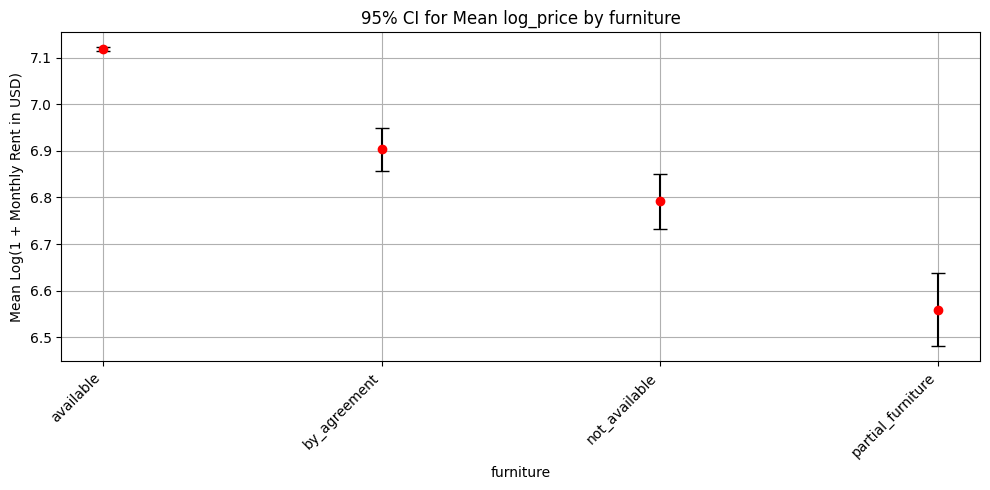

furniture      mean  count       std        se      ci95
0          available  7.117667  37885  0.424126  0.002179  0.004271
1       by_agreement  6.903096    452  0.508351  0.023911  0.046865
2      not_available  6.792017    247  0.473193  0.030109  0.059013
3  partial_furniture  6.559569    126  0.451786  0.040248  0.078887

In [167]:
# Furniture
anova_categorical_column(df, 'furniture')


--- ANOVA for renovation ---
F-statistic: 1573.4129
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             5             1,197.52               239.50
Within         38,681             5,888.02                 0.15
Total          38,686             7,085.54


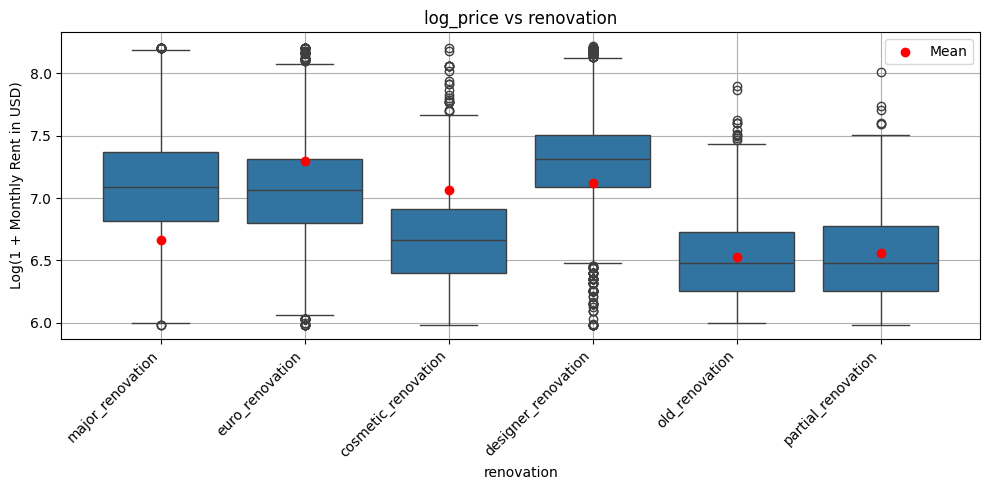

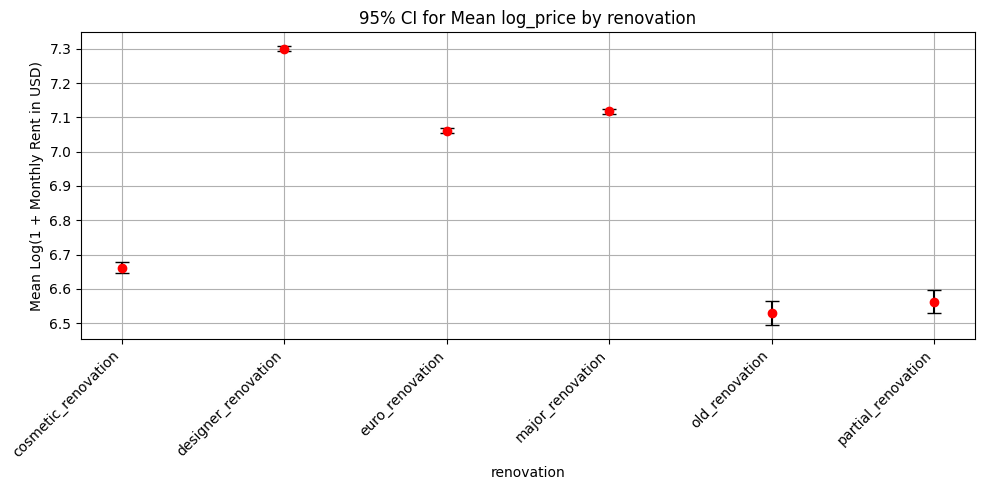

renovation      mean  count       std        se      ci95
0  cosmetic_renovation  6.662307   2468  0.373054  0.007509  0.014718
1  designer_renovation  7.300384  10868  0.357025  0.003425  0.006712
2      euro_renovation  7.060856  10287  0.403893  0.003982  0.007805
3     major_renovation  7.117342  14173  0.408518  0.003431  0.006726
4       old_renovation  6.529524    444  0.371114  0.017612  0.034520
5   partial_renovation  6.562848    447  0.352487  0.016672  0.032677

In [168]:
# Renovation
anova_categorical_column(df, 'renovation')


--- ANOVA for construction_type ---
F-statistic: 1466.8406
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             4               934.18               233.54
Within         38,704             6,162.29                 0.16
Total          38,708             7,096.47


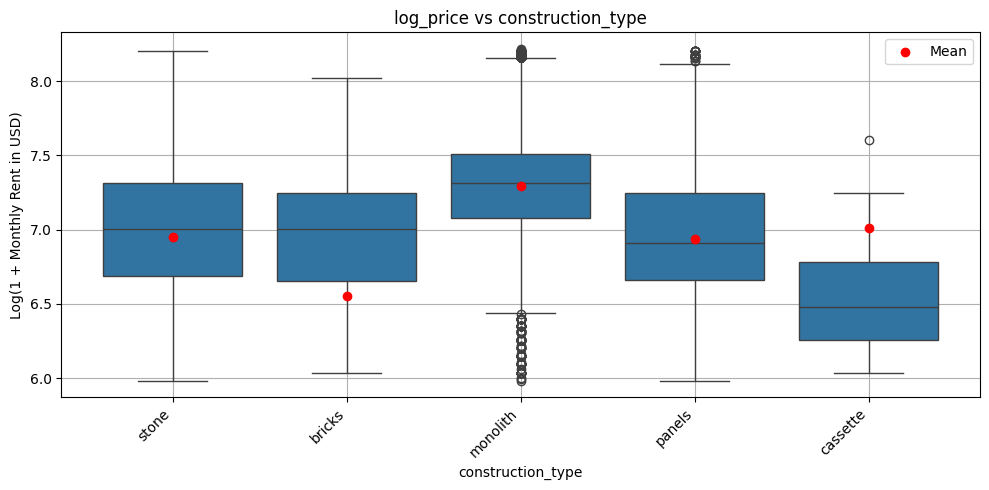

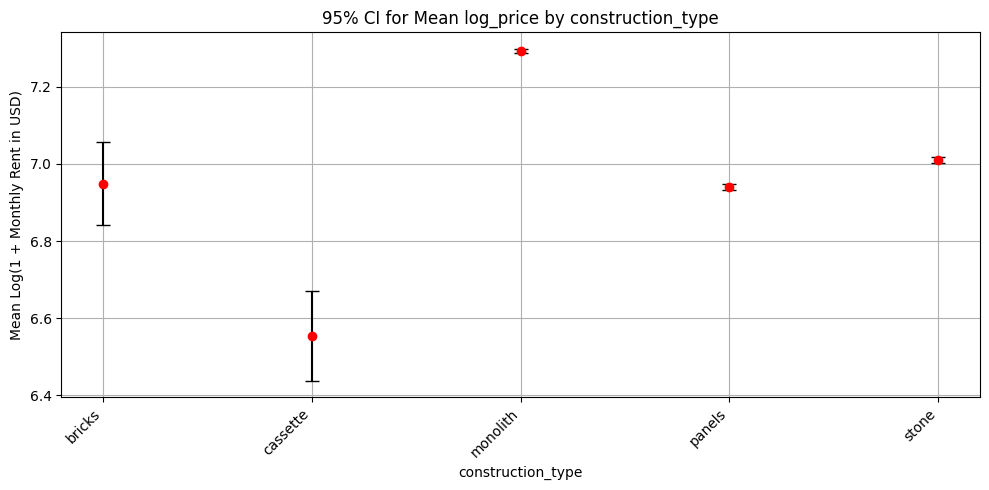

construction_type      mean  count       std        se      ci95
0            bricks  6.948361     68  0.454108  0.055069  0.107935
1          cassette  6.554949     39  0.372604  0.059664  0.116942
2          monolith  7.292264  16083  0.365511  0.002882  0.005649
3            panels  6.940047   8458  0.412998  0.004491  0.008802
4             stone  7.009555  14061  0.426052  0.003593  0.007042

In [169]:
# Construction_type
anova_categorical_column(df, 'construction_type')


--- ANOVA for children_are_welcome ---
F-statistic: 98.9089
P-value:    5.772e-104
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             5                89.64                17.93
Within         38,159             6,916.86                 0.18
Total          38,164             7,006.50


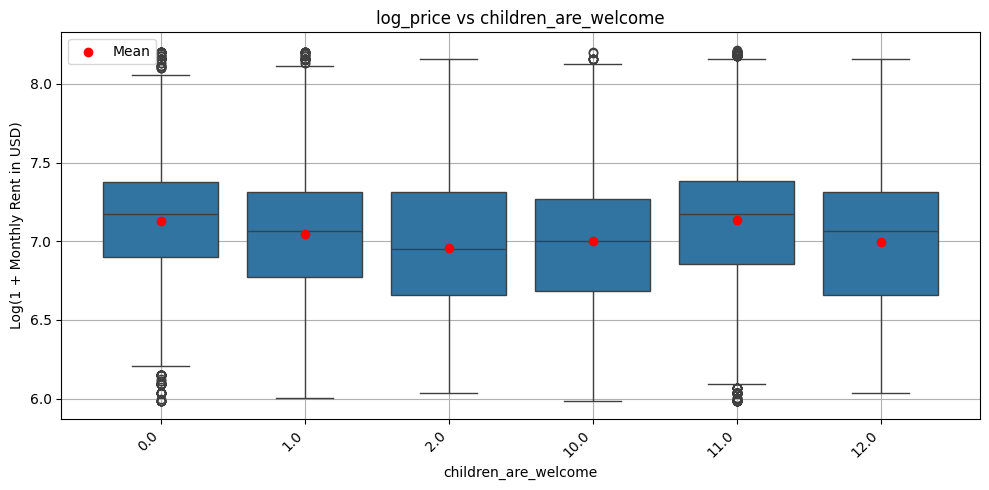

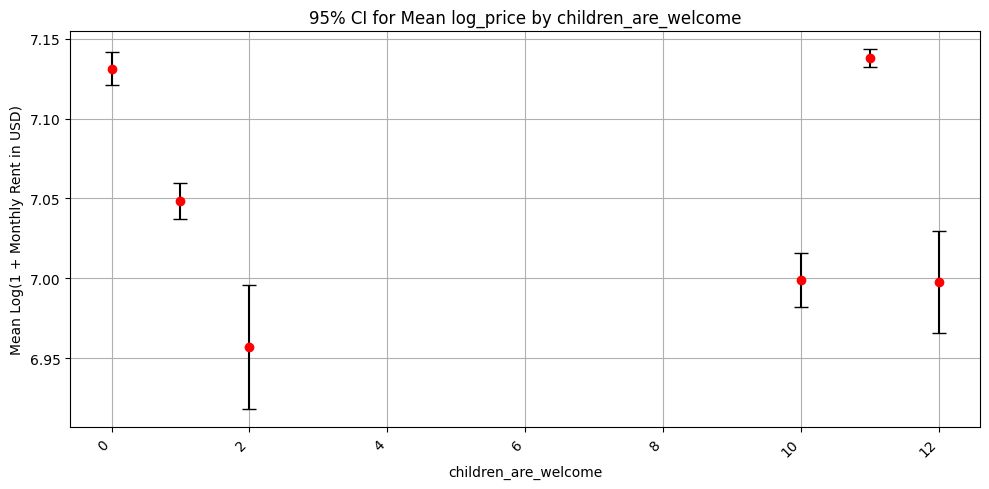

children_are_welcome      mean  count       std        se      ci95
0                   0.0  7.131120   6039  0.411829  0.005299  0.010387
1                   1.0  7.048286   5781  0.432735  0.005691  0.011155
2                   2.0  6.956834    513  0.448284  0.019792  0.038793
3                  10.0  6.998909   2093  0.395301  0.008641  0.016936
4                  11.0  7.137749  22998  0.429176  0.002830  0.005547
5                  12.0  6.997588    741  0.442325  0.016249  0.031848

In [170]:
# Children welcome
anova_categorical_column(df, 'children_are_welcome')


--- ANOVA for pets_allowed ---
F-statistic: 64.9989
P-value:    8.286e-68
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             5                59.17                11.83
Within         38,159             6,947.33                 0.18
Total          38,164             7,006.50


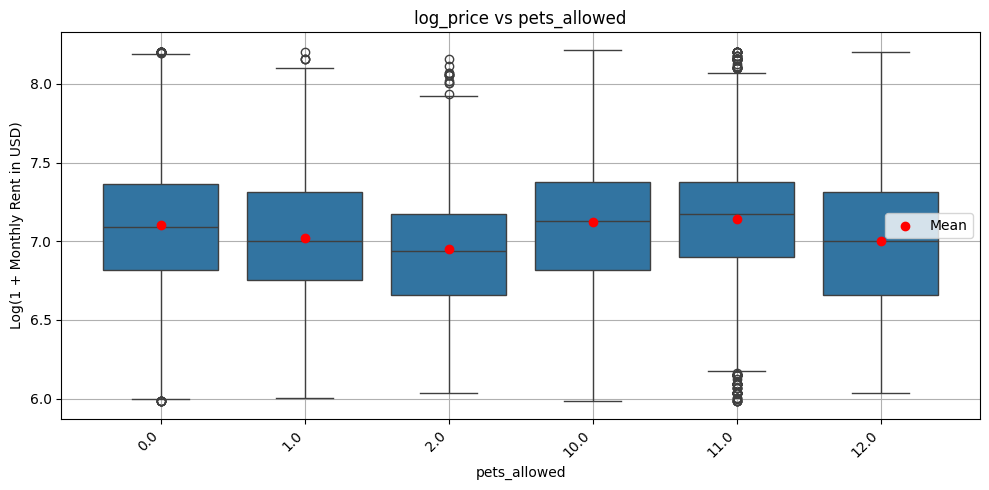

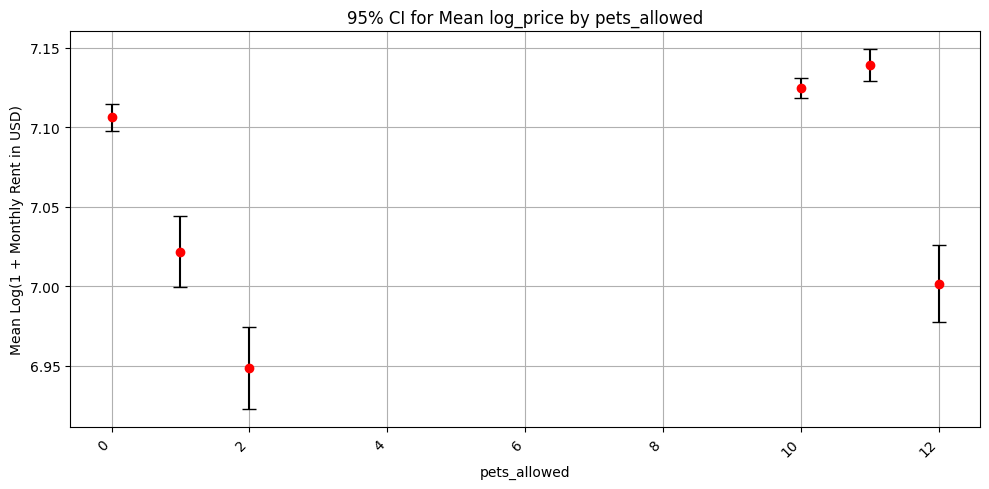

pets_allowed      mean  count       std        se      ci95
0           0.0  7.106010  10089  0.426803  0.004249  0.008328
1           1.0  7.021693   1298  0.410877  0.011404  0.022353
2           2.0  6.948353    946  0.404292  0.013145  0.025764
3          10.0  7.124621  17738  0.431204  0.003238  0.006346
4          11.0  7.138942   6847  0.419212  0.005066  0.009930
5          12.0  7.001624   1247  0.434469  0.012303  0.024115

In [171]:
# Pets allowed
anova_categorical_column(df, 'pets_allowed')


--- ANOVA for utility_payments ---
F-statistic: 333.6602
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             5               293.49                58.70
Within         38,159             6,713.01                 0.18
Total          38,164             7,006.50


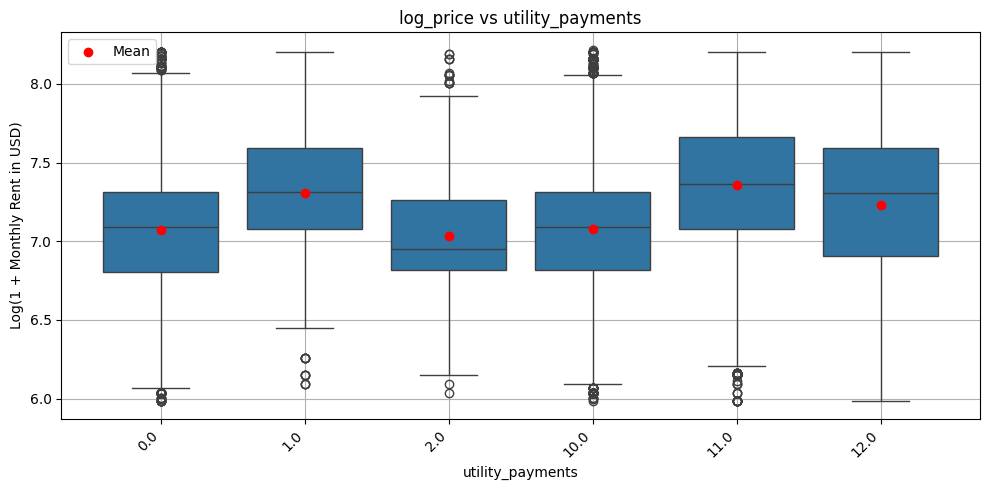

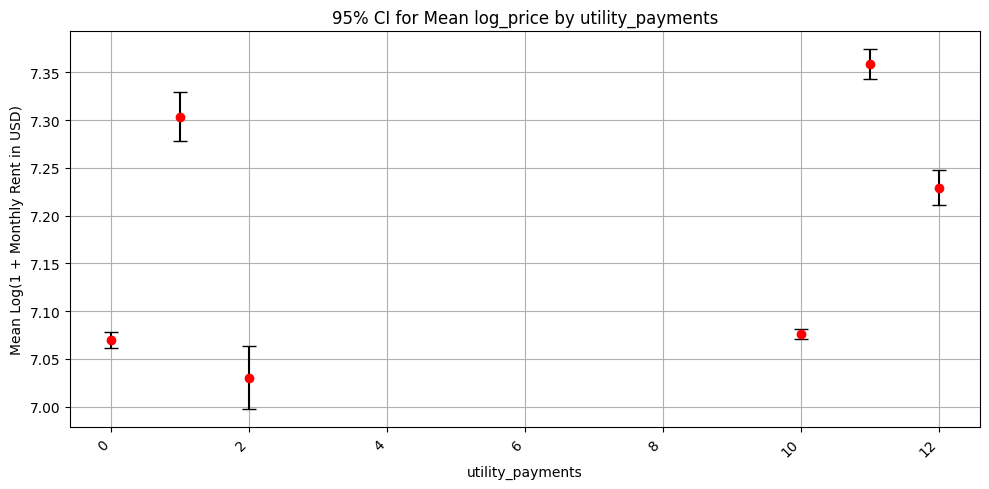

utility_payments      mean  count       std        se      ci95
0               0.0  7.069762  10860  0.425134  0.004080  0.007996
1               1.0  7.303697    902  0.389984  0.012985  0.025451
2               2.0  7.030274    571  0.400279  0.016751  0.032832
3              10.0  7.076164  20482  0.412534  0.002883  0.005650
4              11.0  7.358722   2917  0.420998  0.007795  0.015278
5              12.0  7.229147   2433  0.462236  0.009371  0.018367

In [172]:
# Utilities payments
anova_categorical_column(df, 'utility_payments')


--- ANOVA for number_of_rooms ---
F-statistic: 1014.3435
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             5               821.29               164.26
Within         38,680             6,263.67                 0.16
Total          38,685             7,084.96


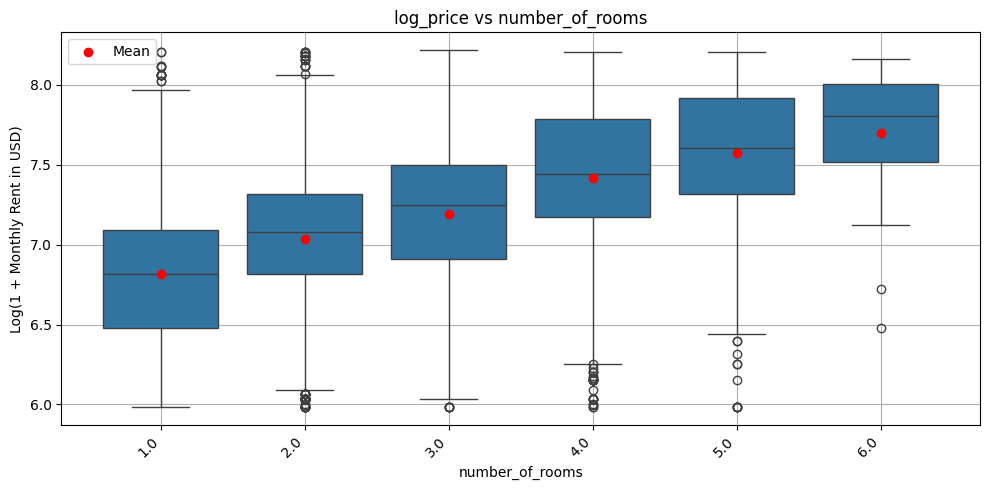

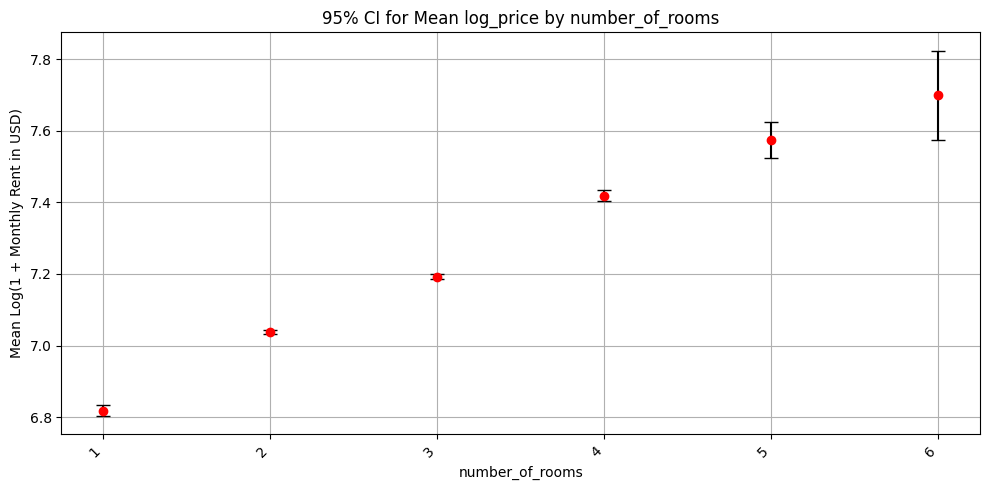

number_of_rooms      mean    median       min       max  count       std  \
0              1.0  6.817871  6.814543  5.982466  8.202756   3111  0.425431   
1              2.0  7.037348  7.079395  5.982466  8.202756  17957  0.371254   
2              3.0  7.191743  7.244942  5.982466  8.216358  14326  0.421401   
3              4.0  7.419080  7.438972  5.982466  8.202756   2912  0.453836   
4              5.0  7.575073  7.601402  5.982466  8.202756    342  0.474646   
5              6.0  7.698841  7.804043  6.478510  8.160804     38  0.392955   

        iqr        se      ci95  
0  0.612400  0.007627  0.014950  
1  0.499344  0.002770  0.005430  
2  0.587343  0.003521  0.006901  
3  0.612752  0.008410  0.016484  
4  0.601279  0.025666  0.050305  
5  0.487157  0.063746  0.124942

In [180]:
# Number of rooms
anova_categorical_column(df, 'number_of_rooms')


--- ANOVA for number_of_bathrooms ---
F-statistic: 3050.1438
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             2               966.13               483.07
Within         38,706             6,130.05                 0.16
Total          38,708             7,096.18


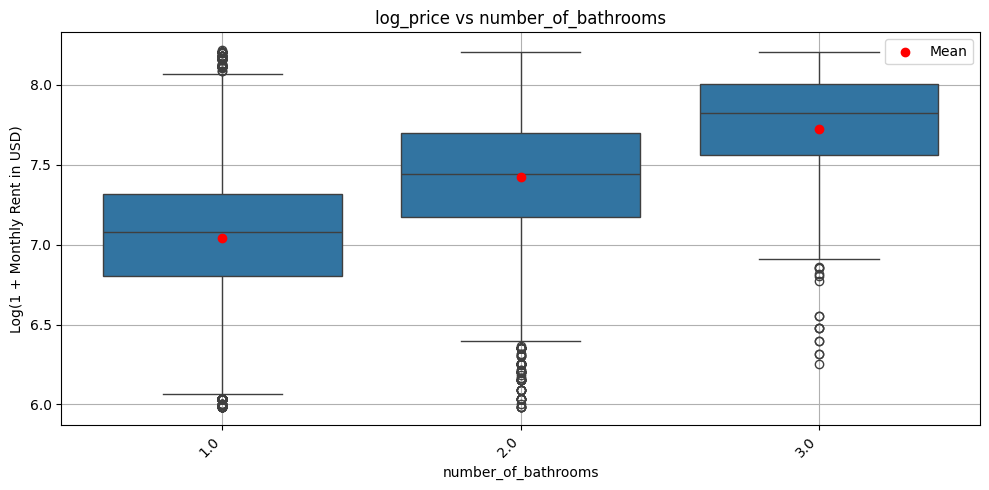

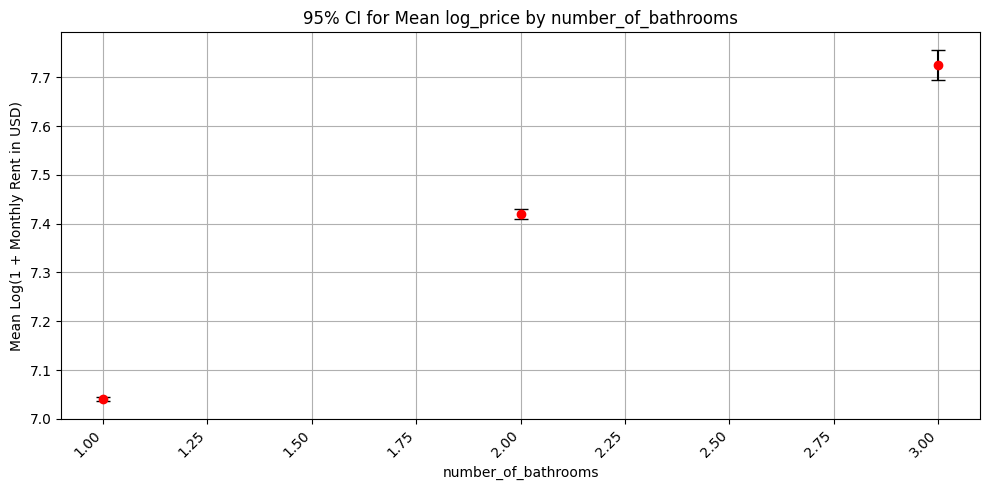

number_of_bathrooms      mean  count       std        se      ci95
0                  1.0  7.040175  31913  0.397568  0.002226  0.004362
1                  2.0  7.419919   6237  0.402026  0.005091  0.009978
2                  3.0  7.725158    559  0.374193  0.015827  0.031020

In [174]:
# Number of bathrooms
anova_categorical_column(df, 'number_of_bathrooms')


--- ANOVA for floor ---
F-statistic: 145.5022
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between            16               402.18                25.14
Within         38,642             6,675.60                 0.17
Total          38,658             7,077.78


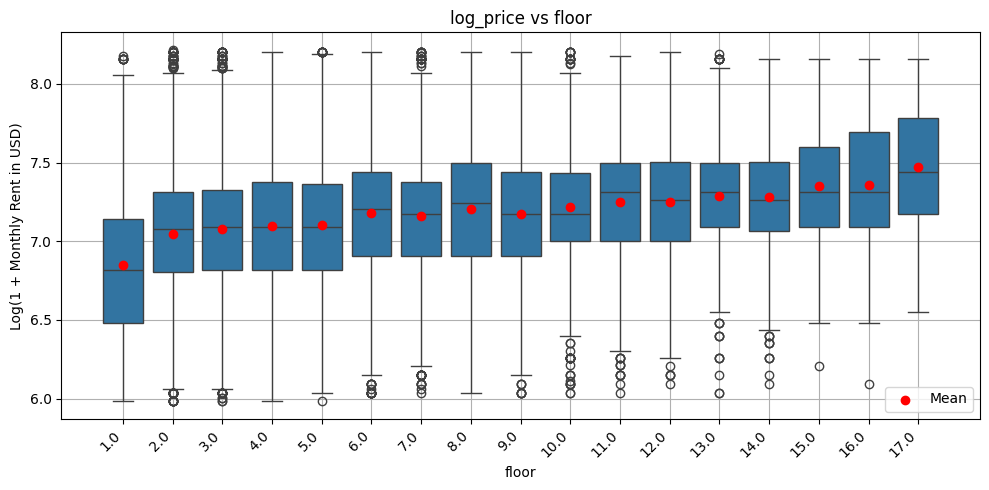

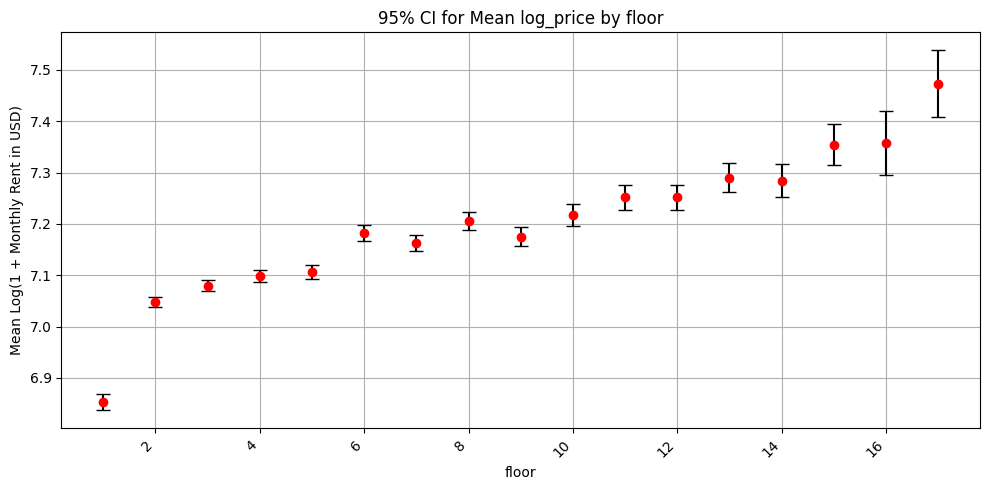

floor      mean  count       std        se      ci95
0     1.0  6.852432   2873  0.422423  0.007881  0.015447
1     2.0  7.047931   6225  0.421875  0.005347  0.010480
2     3.0  7.079869   6110  0.419852  0.005371  0.010528
3     4.0  7.098552   5388  0.428546  0.005838  0.011443
4     5.0  7.105999   4097  0.427859  0.006684  0.013102
5     6.0  7.182588   2588  0.418875  0.008234  0.016138
6     7.0  7.163349   2436  0.401747  0.008140  0.015954
7     8.0  7.205255   2211  0.423247  0.009001  0.017642
8     9.0  7.175222   1869  0.402951  0.009321  0.018269
9    10.0  7.217705   1225  0.374224  0.010692  0.020957
10   11.0  7.251818    946  0.385584  0.012536  0.024571
11   12.0  7.251619    962  0.385401  0.012426  0.024355
12   13.0  7.290014    612  0.364842  0.014748  0.028906
13   14.0  7.283777    541  0.383097  0.016471  0.032282
14   15.0  7.354359    289  0.347760  0.020456  0.040095
15   16.0  7.358284    158  0.400139  0.031833  0.062393
16   17.0  7.473212    129  0.375364  0.033049  0.064776

In [175]:
# Number of floors
anova_categorical_column(df, 'floor')


--- ANOVA for elevator ---
F-statistic: 2379.1016
P-value:    0
→ Significant differences.

ANOVA Table Summary:
Source             DF                   SS                   MS
Between             1               410.91               410.91
Within         38,707             6,685.28                 0.17
Total          38,708             7,096.18


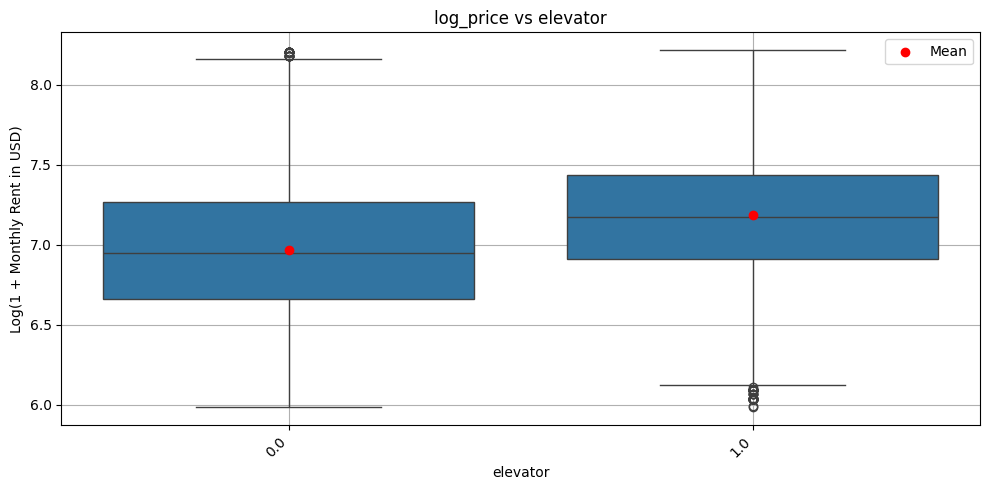

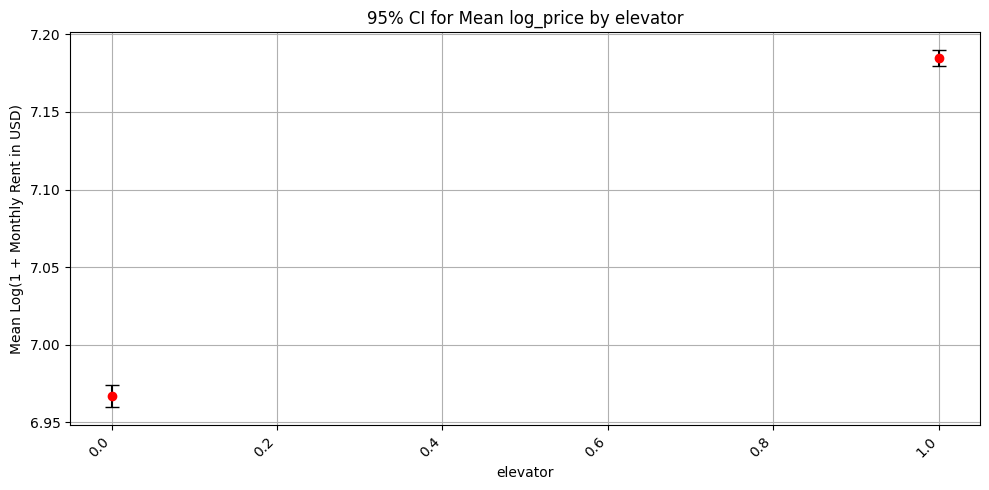

elevator      mean  count       std        se      ci95
0       0.0  6.966957  13071  0.430419  0.003765  0.007379
1       1.0  7.184819  25638  0.407822  0.002547  0.004992

In [176]:
# Elevator
anova_categorical_column(df, 'elevator')

In [197]:
# Task1b

In [198]:
# Export cleaned DataFrame to CSV
df.to_csv('cleaned_apartment_data_1b.csv', index=False)

In [199]:
# Ensure both columns are numeric
df['monthly_price_usd'] = pd.to_numeric(df['monthly_price_usd'], errors='coerce')
df['floor_area'] = pd.to_numeric(df['floor_area'], errors='coerce')

# Calculate unit price per square meter
df['unit_price_per_m2'] = df['monthly_price_usd']/df['floor_area']


In [200]:
df_1b = df[['number_of_rooms', 'duration', 'log_price', 'unit_price_per_m2']]

In [201]:
df_1b

number_of_rooms duration  log_price  unit_price_per_m2
0                  2.0    daily   7.366866          38.577236
1                  4.0  monthly   6.555357           9.236842
2                  3.0  monthly   6.033086           5.333333
4                  1.0    daily   7.366866          39.541667
6                  3.0  monthly   6.255750           5.200000
...                ...      ...        ...                ...
40729              3.0  monthly   7.601402          23.529412
40730              4.0  monthly   7.863651          20.000000
40731              8.0  monthly   8.003363          17.588235
40732              2.0    daily   7.589884          38.766340
40733              2.0    daily   7.589884          36.612654

[38710 rows x 4 columns]

In [202]:
df.to_csv('1b.csv', index=False)

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\3339481108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=room_counts.index, y=room_counts.values, palette='Blues_d')
C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\3339481108.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_counts.index, y=room_counts.values, palette='Blues_d')


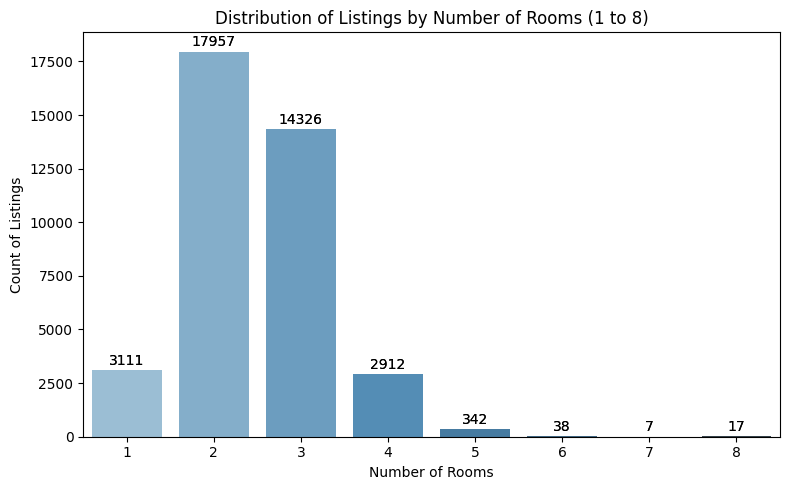

In [203]:
# Count the frequency of each room number
room_counts = df_1b['number_of_rooms'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=room_counts.index, y=room_counts.values, palette='Blues_d')
sns.barplot(x=room_counts.index, y=room_counts.values, palette='Blues_d')
plt.xlabel("Number of Rooms")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listings by Number of Rooms (1 to 8)")
plt.xticks(ticks=range(8), labels=[1, 2, 3, 4, 5, 6,7,8])

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 100,  # adjust vertical offset if needed
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [204]:
def describe_log_price_by_group(df, group_col, target_col='log_price'):
    """
    Displays descriptive statistics and a bar chart for log_price grouped by a given column.

    Parameters:
    - df: DataFrame
    - group_col: column to group by (e.g., 'number_of_rooms', 'duration')
    - target_col: column for which to compute stats (default: 'log_price')
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import skew

    label_map = {'daily': 'Daily', 'monthly': 'Monthly', 0: 'Daily', 1: 'Monthly'}

    # Filter out non-numeric values if column is supposed to be numeric (like number_of_rooms)
    if group_col == 'number_of_rooms':
        df = df[pd.to_numeric(df[group_col], errors='coerce').notnull()]
        df[group_col] = df[group_col].astype(int)

    stats_list = []
    groups = sorted(df[group_col].dropna().unique())

    for val in groups:
        group_data = df[df[group_col] == val][target_col]
        
        # Only apply label_map when the group_col is 'duration' or 'duration_binary'
        display_val = label_map[val] if group_col in ['duration', 'duration_binary'] and val in label_map else val
    
        stats = {
            group_col: display_val,
            'count': len(group_data),
            'mean': round(group_data.mean(), 4),
            'median': round(group_data.median(), 4),
            'std': round(group_data.std(), 4),
            'skewness': round(skew(group_data), 4),
            'iqr': round(group_data.quantile(0.75) - group_data.quantile(0.25), 4)
        }
        stats_list.append(stats)

    stats_df = pd.DataFrame(stats_list)
    display(stats_df)

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(x=group_col, y='mean', data=stats_df, palette='viridis')
    plt.xlabel(group_col.replace('_', ' ').title())
    plt.ylabel(f"Mean Log(1 + Monthly Rent in USD)")
    plt.title(f"Mean {target_col} by {group_col.replace('_', ' ').title()}")

    for index, row in stats_df.iterrows():
        plt.text(index, row['mean'] + 0.01, f"{row['mean']:.2f}", ha='center')

    plt.tight_layout()
    plt.show()


duration  count    mean  median     std  skewness     iqr
0    Daily   5928  7.3672  7.3669  0.4071   -0.2651  0.5846
1  Monthly  32782  7.0650  7.0909  0.4154   -0.0373  0.4993

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\2306916831.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y='mean', data=stats_df, palette='viridis')


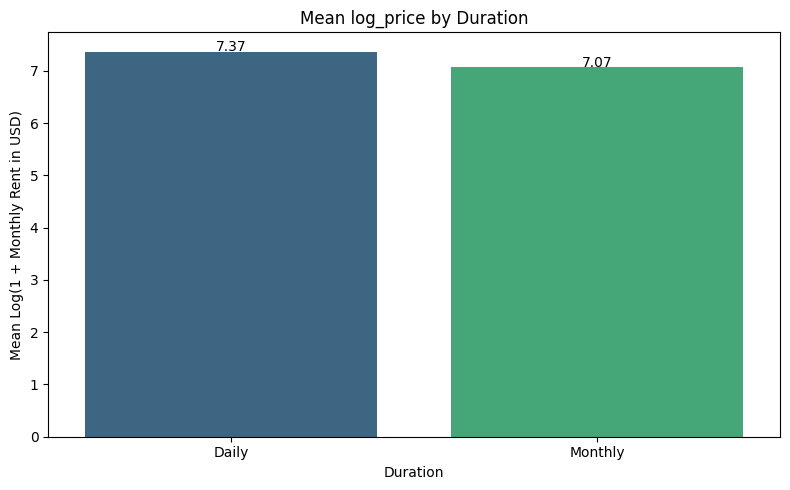

In [205]:
describe_log_price_by_group(df_1b, 'duration')

In [206]:
# Clean the number_of_rooms column
df_1b['number_of_rooms'] = pd.to_numeric(df_1b['number_of_rooms'], errors='coerce')
df_1b = df_1b[df_1b['number_of_rooms'].between(1, 8)]  # Only allow valid room counts
df_1b['number_of_rooms'] = df_1b['number_of_rooms'].astype(int)

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\2707555441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1b['number_of_rooms'] = pd.to_numeric(df_1b['number_of_rooms'], errors='coerce')


number_of_rooms  count    mean  median     std  skewness     iqr
0                1   3111  6.8179  6.8145  0.4254    0.2839  0.6124
1                2  17957  7.0373  7.0794  0.3713   -0.1325  0.4993
2                3  14326  7.1917  7.2449  0.4214   -0.1746  0.5873
3                4   2912  7.4191  7.4390  0.4538   -0.5161  0.6128
4                5    342  7.5751  7.6014  0.4746   -1.1505  0.6013
5                6     38  7.6988  7.8040  0.3930   -1.0837  0.4872
6                7      7  7.8594  8.0067  0.3487   -1.4343  0.2503
7                8     17  7.3868  7.3669  0.5912   -0.3735  0.9240

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\2306916831.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y='mean', data=stats_df, palette='viridis')


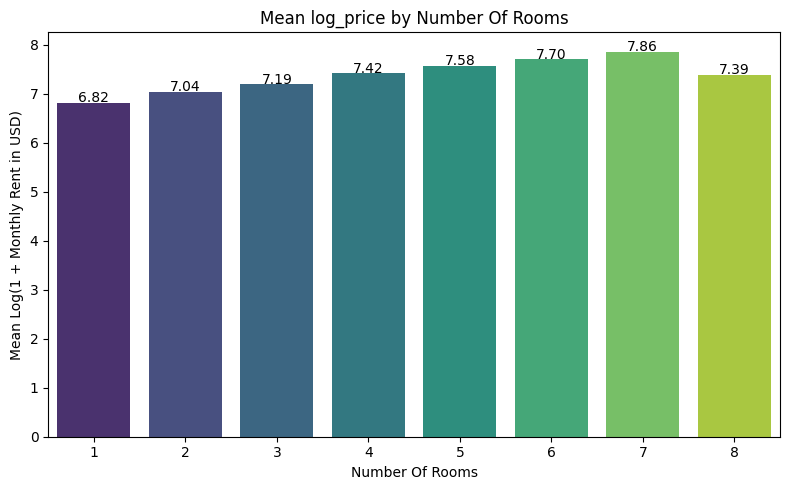

In [207]:
describe_log_price_by_group(df_1b, 'number_of_rooms')

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


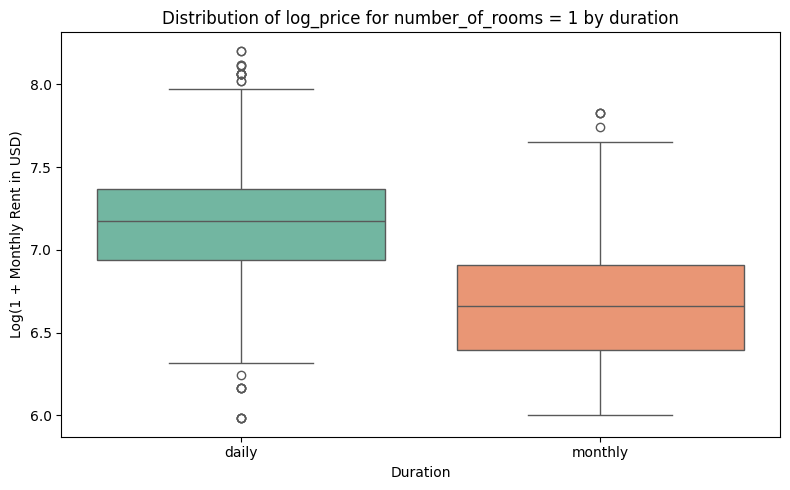

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


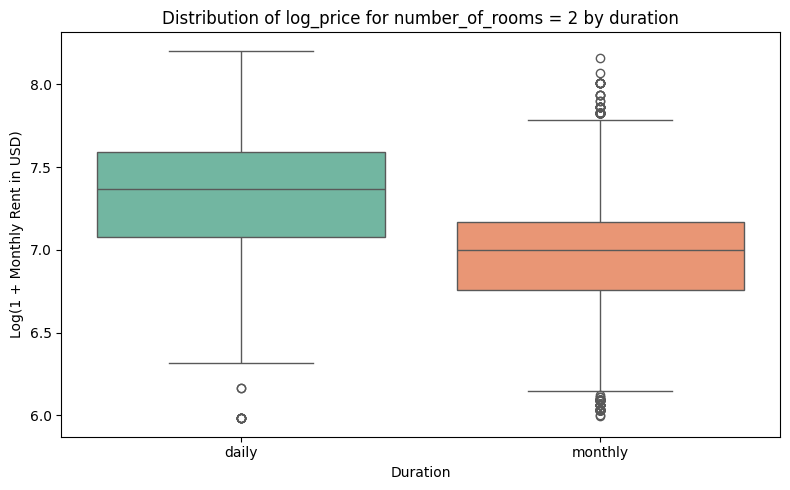

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


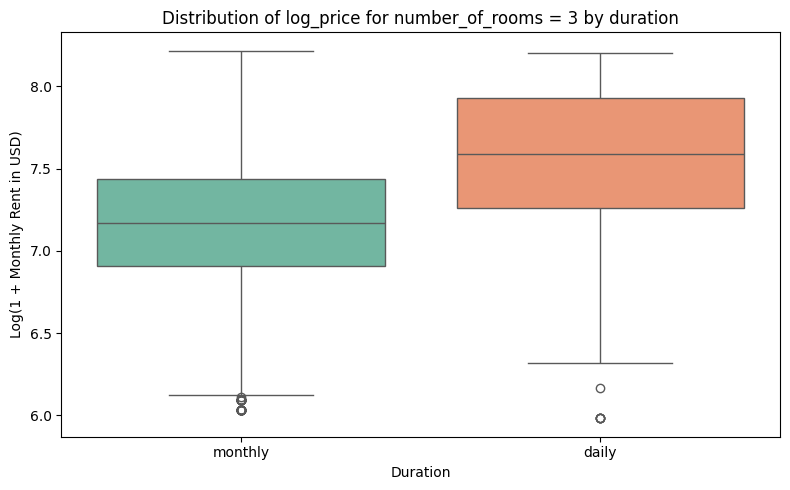

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


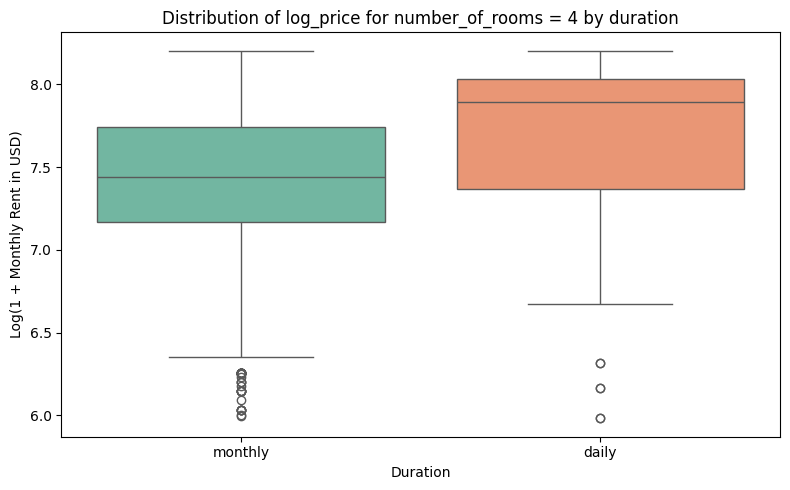

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


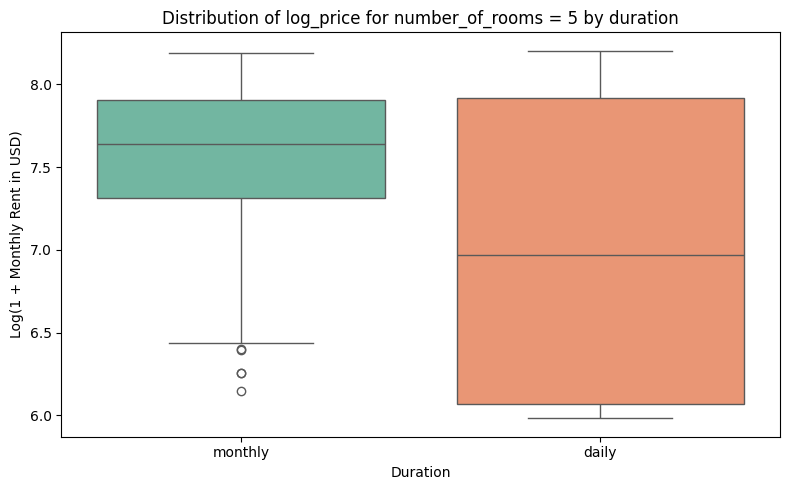

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


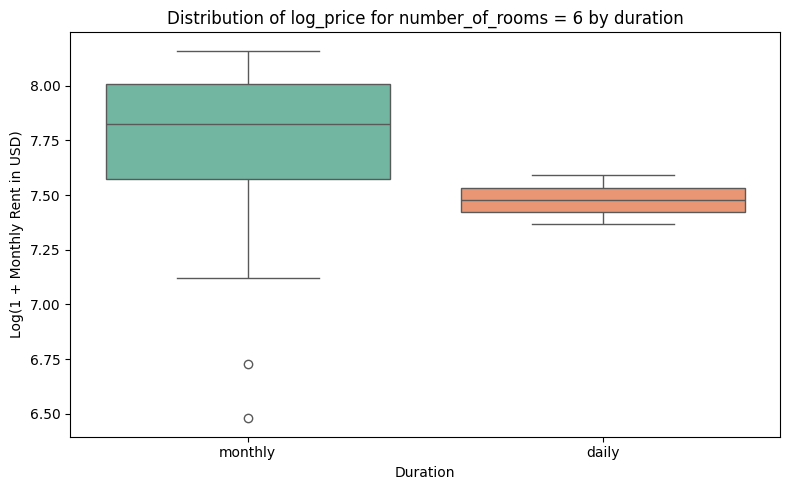

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


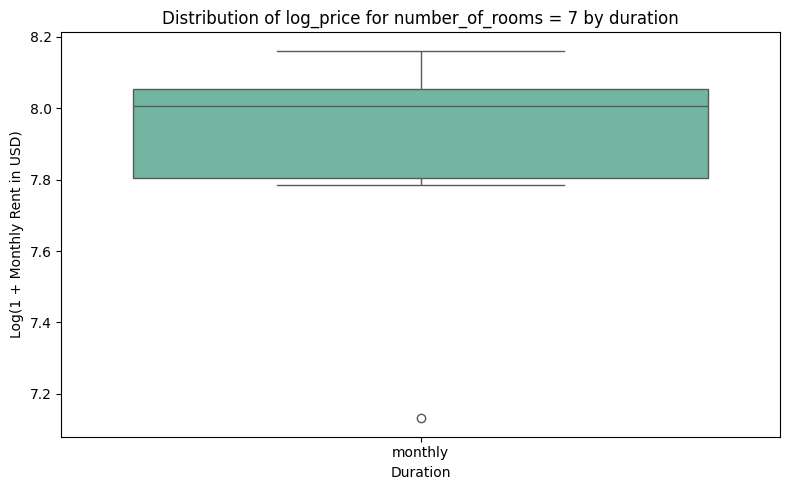

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\76669047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')


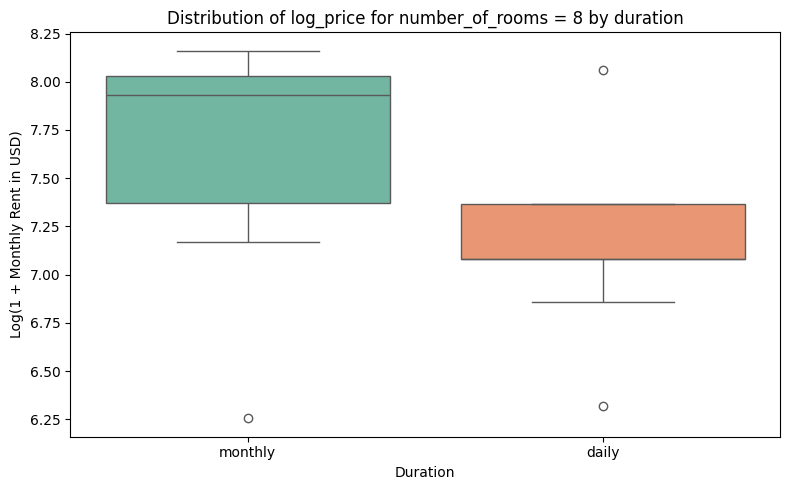

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_log_price_distributions_by_room_and_duration(df, room_col, price_col, duration_col):
    room_values = sorted(df[room_col].dropna().unique())
    for room in room_values:
        subset = df[df[room_col] == room]
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=duration_col, y=price_col, data=subset, palette='Set2')
        plt.title(f'Distribution of {price_col} for {room_col} = {room} by {duration_col}')
        plt.xlabel(duration_col.capitalize())
        plt.ylabel('Log(1 + Monthly Rent in USD)')
        plt.tight_layout()
        plt.show()

# Example usage (replace df_1b with your actual DataFrame name if different)
plot_log_price_distributions_by_room_and_duration(df_1b, 'number_of_rooms', 'log_price', 'duration')


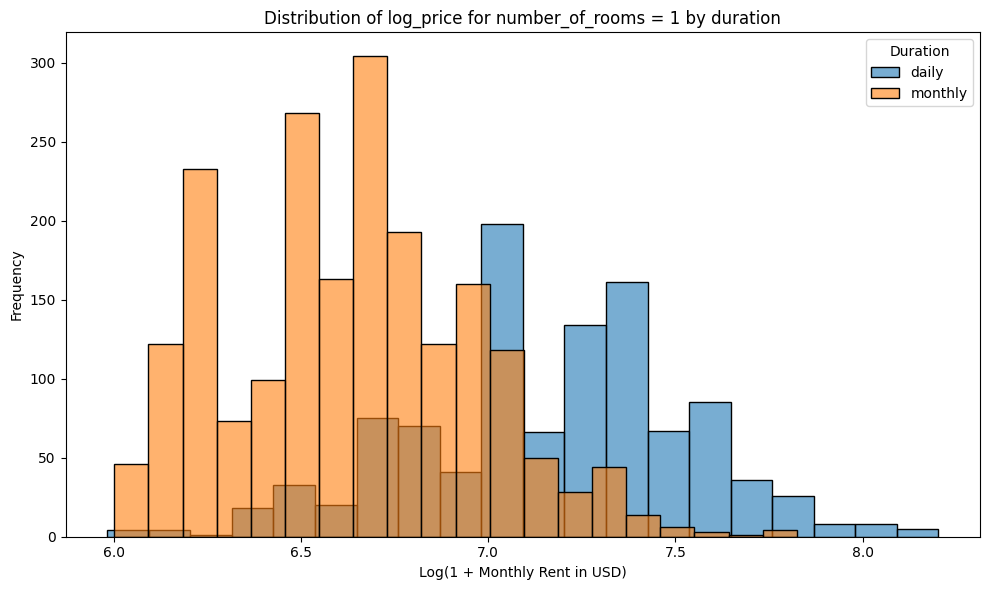

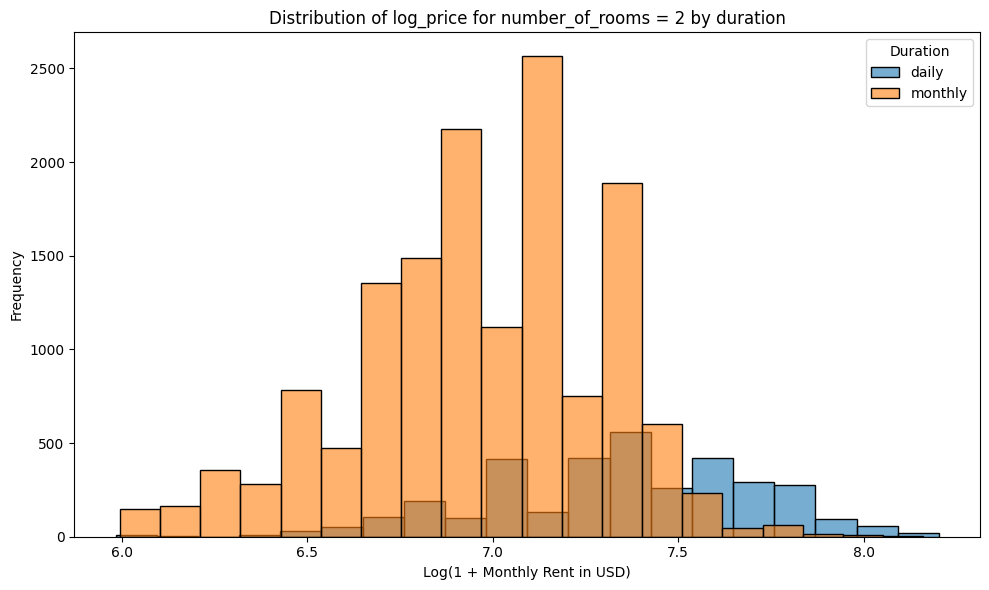

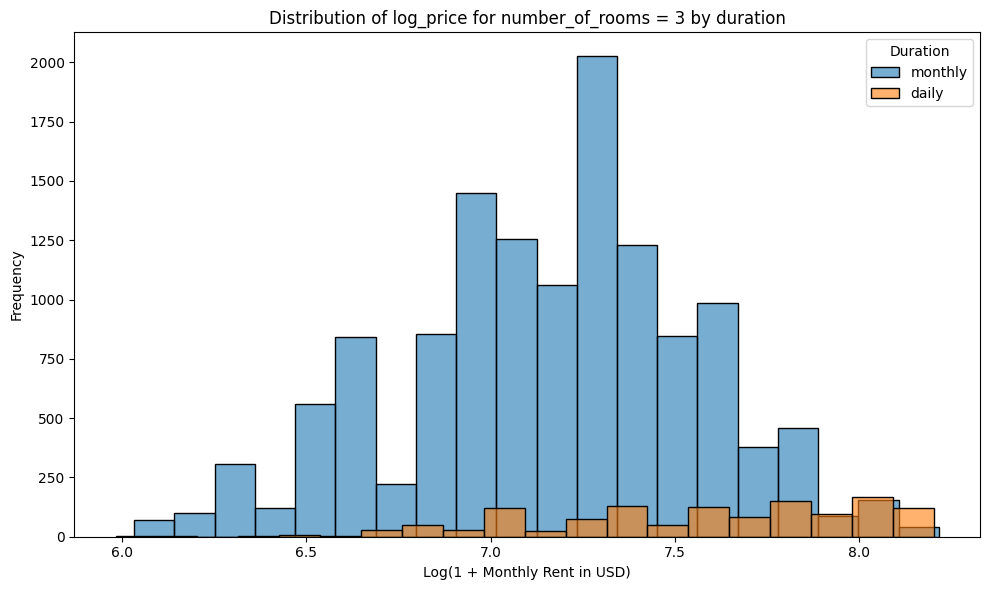

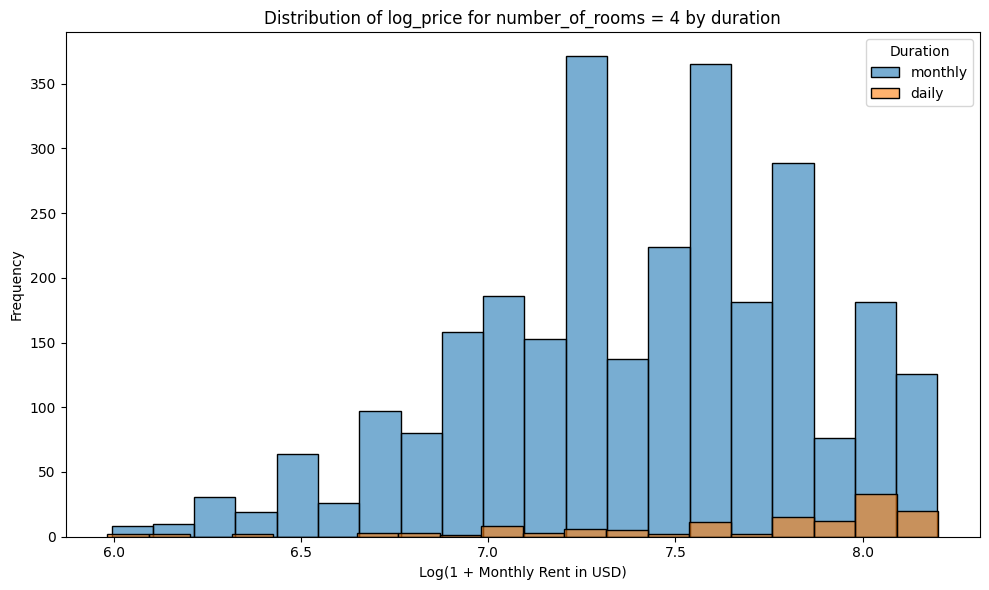

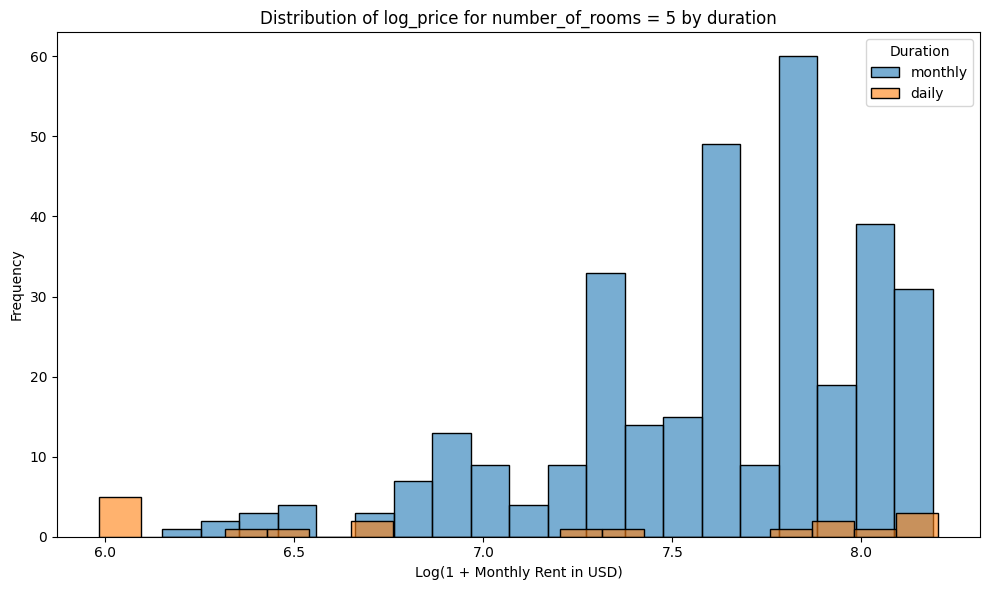

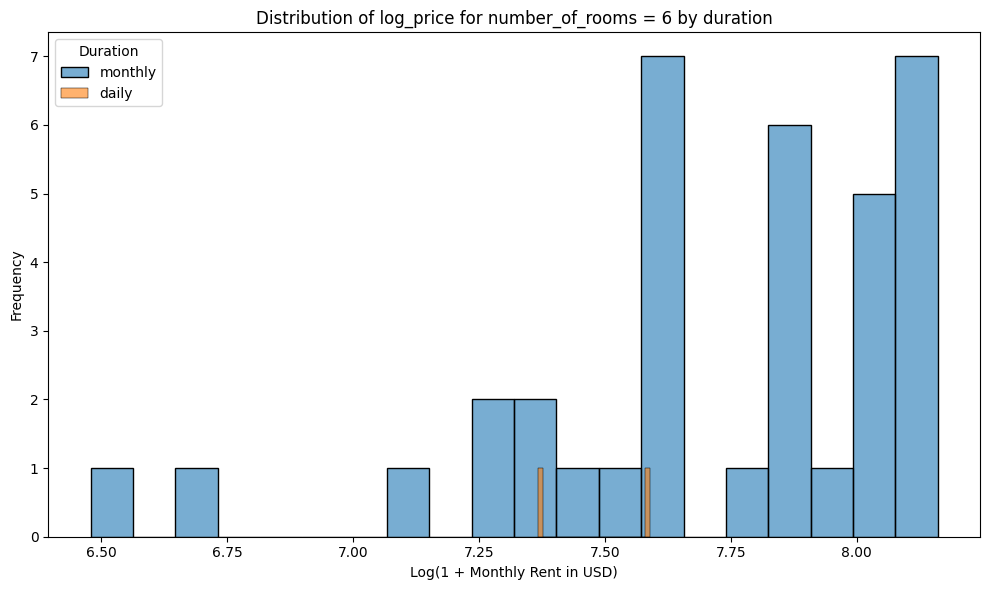

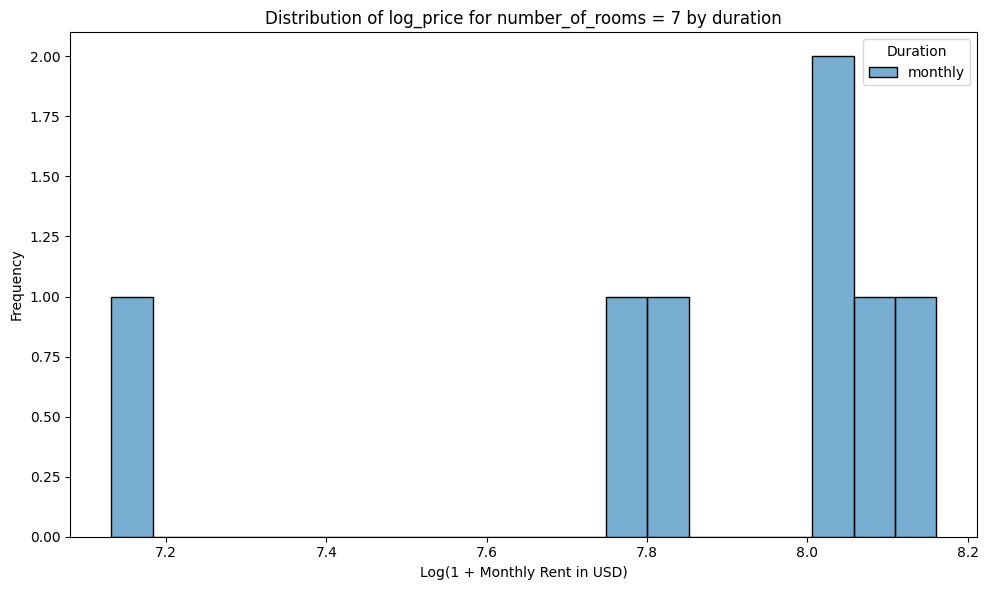

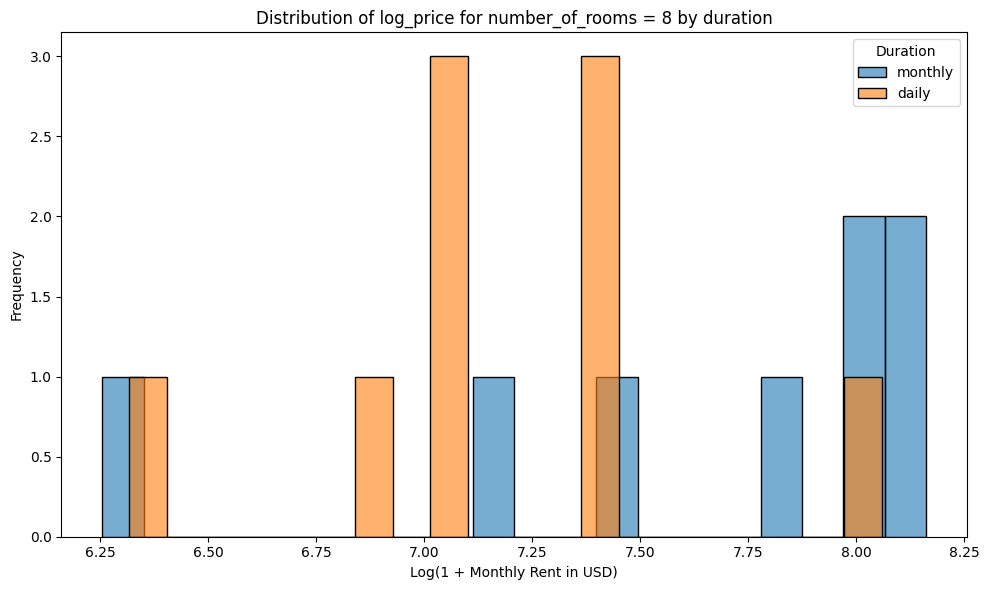

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_log_price_histograms_by_room_and_duration(df, room_col, price_col, duration_col, bins=20):
    room_values = sorted(df[room_col].dropna().unique())
    
    for room in room_values:
        subset = df[df[room_col] == room]
        durations = subset[duration_col].unique()
        
        plt.figure(figsize=(10, 6))
        for dur in durations:
            dur_subset = subset[subset[duration_col] == dur]
            sns.histplot(dur_subset[price_col], bins=bins, kde=False, label=f'{dur}', alpha=0.6)
        
        plt.title(f'Distribution of {price_col} for {room_col} = {room} by {duration_col}')
        plt.xlabel('Log(1 + Monthly Rent in USD)')
        plt.ylabel('Frequency')
        plt.legend(title=duration_col.capitalize())
        plt.tight_layout()
        plt.show()

# Example usage:
plot_log_price_histograms_by_room_and_duration(df_1b, 'number_of_rooms', 'log_price', 'duration', bins=20)


In [210]:
# Encode duration 
df_1b['duration_encoded'] = df_1b['duration'].map({'daily': 0, 'monthly': 1})

In [211]:
df_1b

number_of_rooms duration  log_price  unit_price_per_m2  \
0                    2    daily   7.366866          38.577236   
1                    4  monthly   6.555357           9.236842   
2                    3  monthly   6.033086           5.333333   
4                    1    daily   7.366866          39.541667   
6                    3  monthly   6.255750           5.200000   
...                ...      ...        ...                ...   
40729                3  monthly   7.601402          23.529412   
40730                4  monthly   7.863651          20.000000   
40731                8  monthly   8.003363          17.588235   
40732                2    daily   7.589884          38.766340   
40733                2    daily   7.589884          36.612654   

       duration_encoded  
0                     0  
1                     1  
2                     1  
4                     0  
6                     1  
...                 ...  
40729                 1  
40730                 1  
40731                 1  
40732                 0  
40733                 0  

[38710 rows x 5 columns]

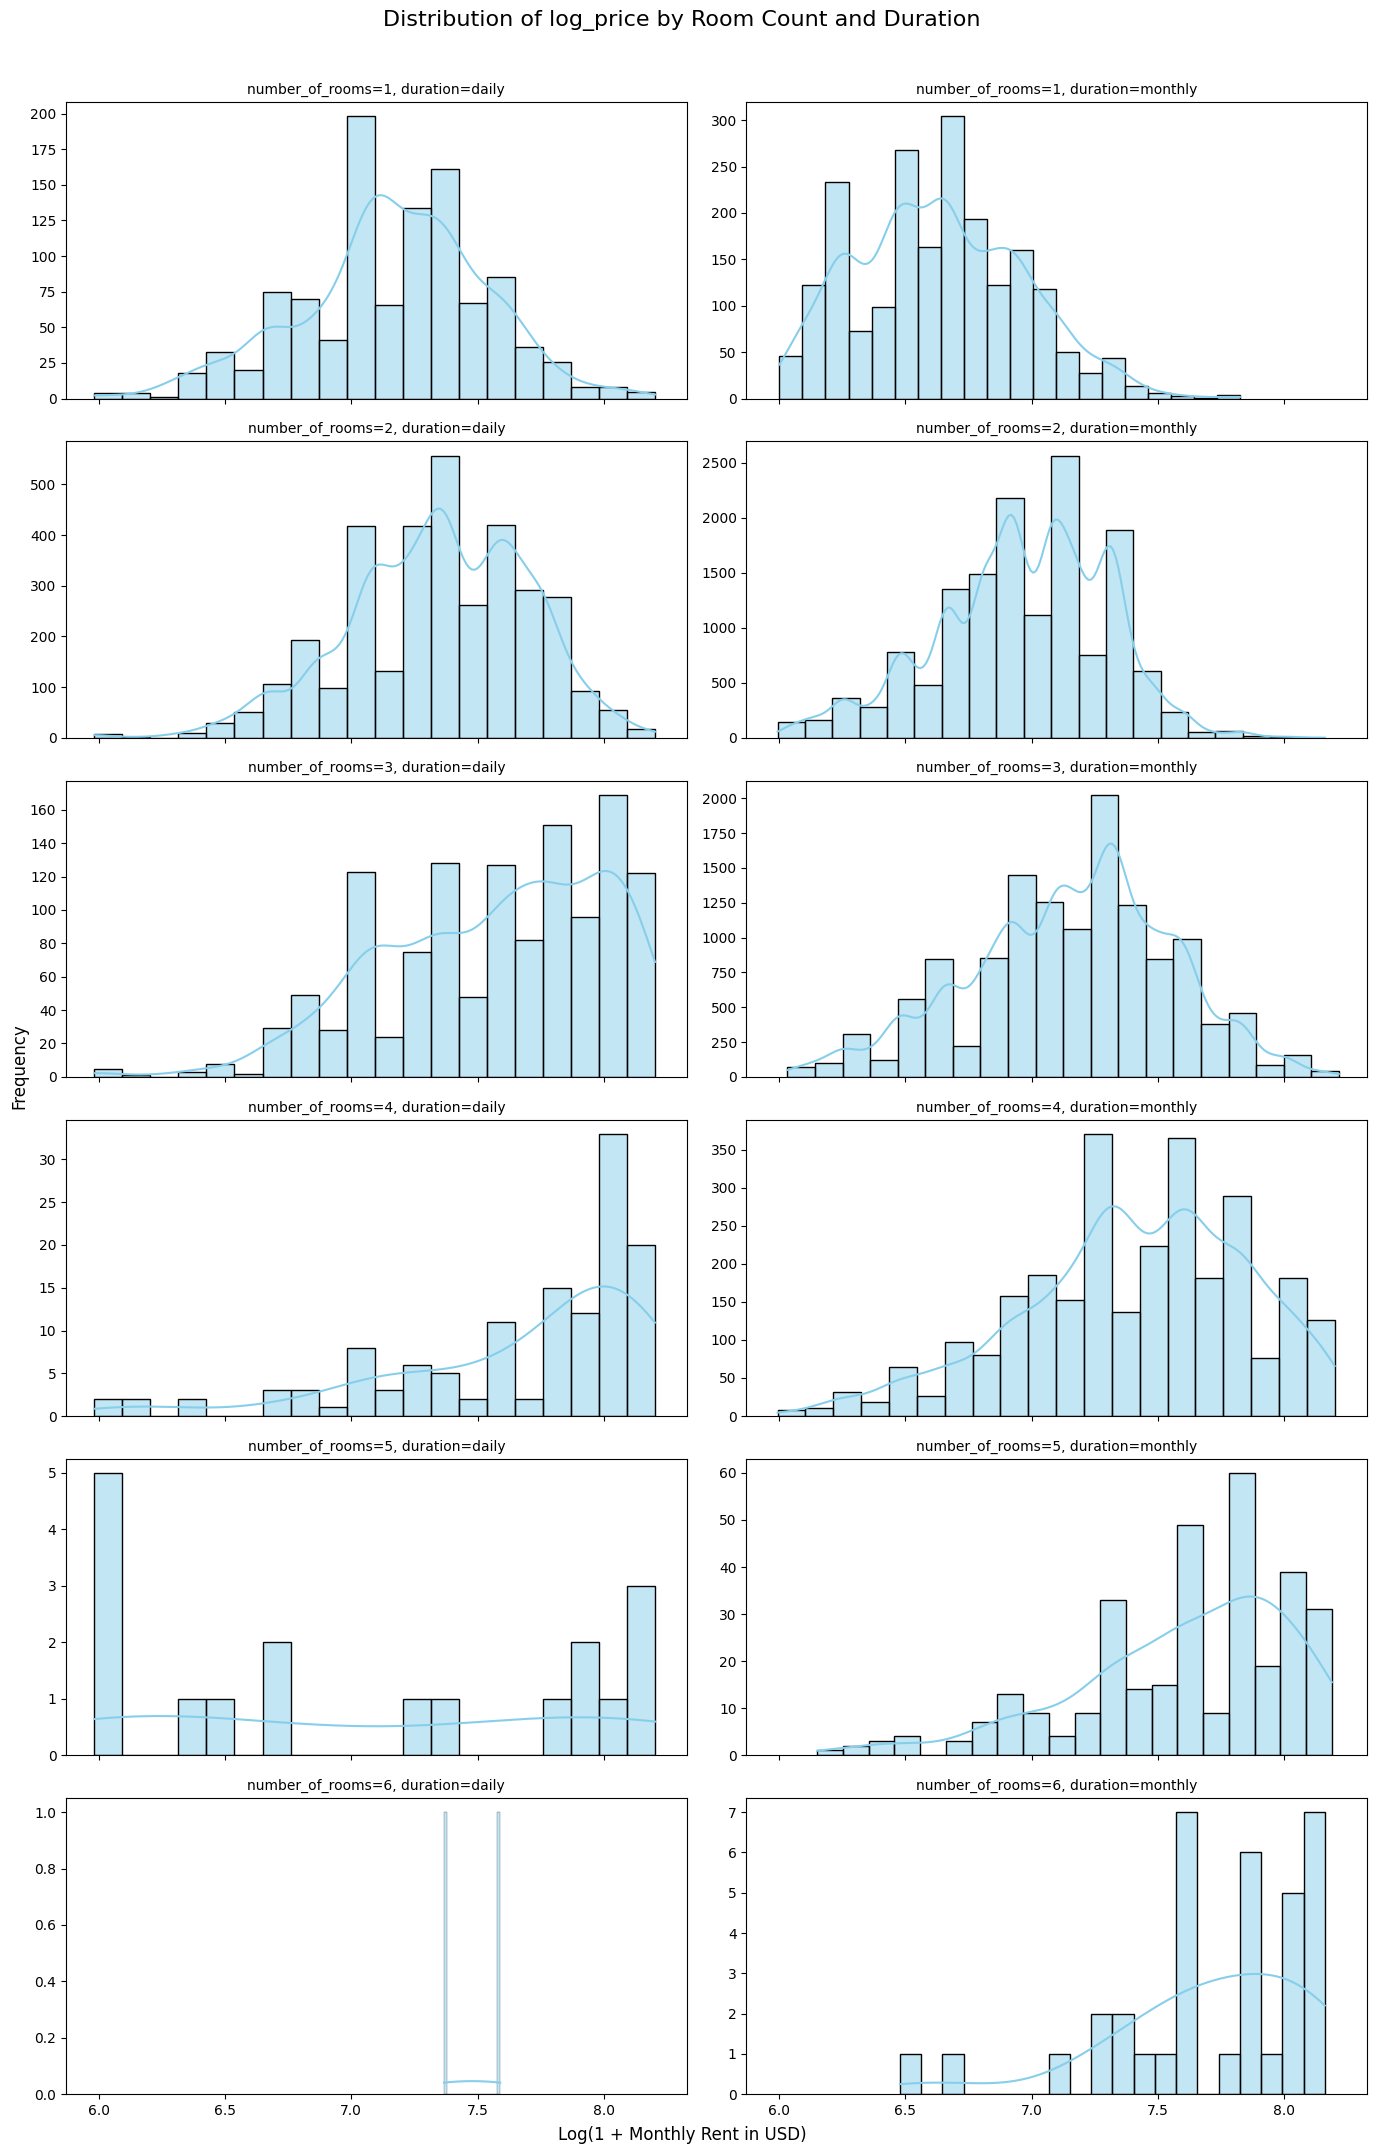

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grid_log_price_histograms(df, room_col, price_col, duration_col, bins=20):
    room_values = sorted(df[room_col].dropna().unique())
    room_values = [r for r in room_values if r in [1, 2, 3, 4, 5, 6]]
    durations = ['daily', 'monthly']
    
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 22), sharex=True, sharey=False)
    fig.suptitle(f'Distribution of {price_col} by Room Count and Duration', fontsize=16)

    for i, room in enumerate(room_values):
        for j, dur in enumerate(durations):
            ax = axes[i, j]
            subset = df[(df[room_col] == room) & (df[duration_col] == dur)]

            if not subset.empty:
                sns.histplot(subset[price_col], bins=bins, kde=True, ax=ax, color='skyblue')
            
            ax.set_title(f'{room_col}={room}, {duration_col}={dur}', fontsize=10)
            ax.set_xlabel('')
            ax.set_ylabel('')

    fig.supxlabel('Log(1 + Monthly Rent in USD)', fontsize=12)
    fig.supylabel('Frequency', fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Example usage:
plot_grid_log_price_histograms(df_1b, 'number_of_rooms', 'log_price', 'duration', bins=20)


In [213]:
def describe_log_price_by_subgroups(df, room_col='number_of_rooms', duration_col='duration', target_col='log_price'):
    """
    Displays descriptive statistics for log_price across combinations of number_of_rooms and duration.

    Parameters:
    - df: DataFrame
    - room_col: column representing number of rooms
    - duration_col: column representing rental duration
    - target_col: column for which to compute statistics (e.g., log_price)
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import skew

    label_map = {'daily': 'Daily', 'monthly': 'Monthly', 0: 'Daily', 1: 'Monthly'}

    # Clean room_col
    df = df.copy()
    df = df[pd.to_numeric(df[room_col], errors='coerce').notnull()]
    df[room_col] = df[room_col].astype(int)

    stats_list = []
    room_values = sorted(df[room_col].dropna().unique())
    duration_values = sorted(df[duration_col].dropna().unique())

    for room in room_values:
        for dur in duration_values:
            subset = df[(df[room_col] == room) & (df[duration_col] == dur)]
            if subset.empty:
                continue

            display_label = f"{room} rooms - {label_map.get(dur, dur)}"
            stats = {
                'Group': display_label,
                'number_of_rooms': room,
                'duration': label_map.get(dur, dur),
                'count': len(subset),
                'mean': round(subset[target_col].mean(), 4),
                'median': round(subset[target_col].median(), 4),
                'std': round(subset[target_col].std(), 4),
                'skewness': round(skew(subset[target_col]), 4),
                'iqr': round(subset[target_col].quantile(0.75) - subset[target_col].quantile(0.25), 4)
            }
            stats_list.append(stats)

    stats_df = pd.DataFrame(stats_list)
    display(stats_df)

    # Optional barplot for visual comparison of means
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Group', y='mean', data=stats_df, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f"Mean {target_col}")
    plt.title(f"Mean {target_col} by Room Count and Duration")
    for i, row in stats_df.iterrows():
        plt.text(i, row['mean'] + 0.01, f"{row['mean']:.2f}", ha='center')
    plt.tight_layout()
    plt.show()

    return stats_df


Group  number_of_rooms duration  count    mean  median  \
0     1 rooms - Daily                1    Daily   1060  7.1668  7.1742   
1   1 rooms - Monthly                1  Monthly   2051  6.6375  6.6606   
2     2 rooms - Daily                2    Daily   3439  7.3442  7.3669   
3   2 rooms - Monthly                2  Monthly  14518  6.9647  6.9967   
4     3 rooms - Daily                3    Daily   1270  7.5711  7.5899   
5   3 rooms - Monthly                3  Monthly  13056  7.1548  7.1709   
6     4 rooms - Daily                4    Daily    130  7.6729  7.8913   
7   4 rooms - Monthly                4  Monthly   2782  7.4072  7.4390   
8     5 rooms - Daily                5    Daily     18  7.0468  6.9680   
9   5 rooms - Monthly                5  Monthly    324  7.6044  7.6406   
10    6 rooms - Daily                6    Daily      2  7.4784  7.4784   
11  6 rooms - Monthly                6  Monthly     36  7.7111  7.8244   
12  7 rooms - Monthly                7  Monthly      7  7.8594  8.0067   
13    8 rooms - Daily                8    Daily      9  7.1748  7.0794   
14  8 rooms - Monthly                8  Monthly      8  7.6253  7.9335   

       std  skewness     iqr  
0   0.3669   -0.2959  0.4304  
1   0.3310    0.3056  0.5135  
2   0.3548   -0.3996  0.5105  
3   0.3363   -0.3525  0.4151  
4   0.4389   -0.5776  0.6646  
5   0.4010   -0.2849  0.5302  
6   0.5222   -1.3557  0.6675  
7   0.4470   -0.5024  0.5702  
8   0.9026    0.0291  1.8488  
9   0.4225   -0.9340  0.5921  
10  0.1577    0.0000  0.1115  
11  0.3995   -1.1672  0.4316  
12  0.3487   -1.4343  0.2503  
13  0.4685    0.0655  0.2875  
14  0.6520   -1.2582  0.6586

C:\Users\kelst\AppData\Local\Temp\ipykernel_48528\747051537.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='mean', data=stats_df, palette='viridis')


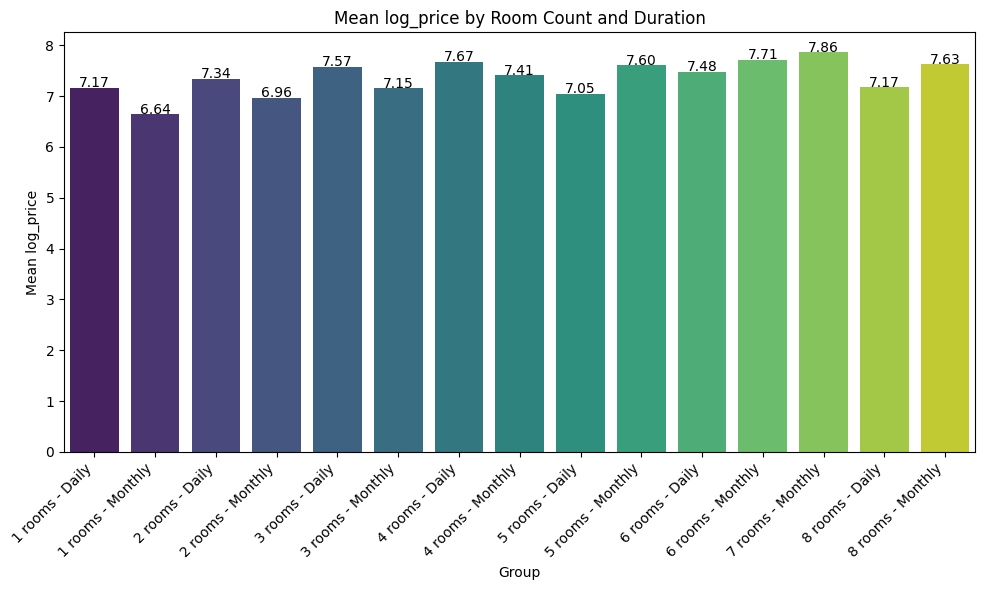

Group  number_of_rooms duration  count    mean  median  \
0     1 rooms - Daily                1    Daily   1060  7.1668  7.1742   
1   1 rooms - Monthly                1  Monthly   2051  6.6375  6.6606   
2     2 rooms - Daily                2    Daily   3439  7.3442  7.3669   
3   2 rooms - Monthly                2  Monthly  14518  6.9647  6.9967   
4     3 rooms - Daily                3    Daily   1270  7.5711  7.5899   
5   3 rooms - Monthly                3  Monthly  13056  7.1548  7.1709   
6     4 rooms - Daily                4    Daily    130  7.6729  7.8913   
7   4 rooms - Monthly                4  Monthly   2782  7.4072  7.4390   
8     5 rooms - Daily                5    Daily     18  7.0468  6.9680   
9   5 rooms - Monthly                5  Monthly    324  7.6044  7.6406   
10    6 rooms - Daily                6    Daily      2  7.4784  7.4784   
11  6 rooms - Monthly                6  Monthly     36  7.7111  7.8244   
12  7 rooms - Monthly                7  Monthly      7  7.8594  8.0067   
13    8 rooms - Daily                8    Daily      9  7.1748  7.0794   
14  8 rooms - Monthly                8  Monthly      8  7.6253  7.9335   

       std  skewness     iqr  
0   0.3669   -0.2959  0.4304  
1   0.3310    0.3056  0.5135  
2   0.3548   -0.3996  0.5105  
3   0.3363   -0.3525  0.4151  
4   0.4389   -0.5776  0.6646  
5   0.4010   -0.2849  0.5302  
6   0.5222   -1.3557  0.6675  
7   0.4470   -0.5024  0.5702  
8   0.9026    0.0291  1.8488  
9   0.4225   -0.9340  0.5921  
10  0.1577    0.0000  0.1115  
11  0.3995   -1.1672  0.4316  
12  0.3487   -1.4343  0.2503  
13  0.4685    0.0655  0.2875  
14  0.6520   -1.2582  0.6586

In [214]:
describe_log_price_by_subgroups(df_1b)

In [215]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder

def compute_correlation_table(
    df, 
    price_col='log_price', 
    min_room=1, 
    max_room=6, 
    method='pearson', 
    include_room_price=True, 
    include_duration_price=True, 
    include_room_duration=False
):
    """
    Returns a DataFrame with correlation coefficients and p-values for specified comparisons.

    Parameters:
    - df: input DataFrame
    - price_col: column name to use for price ('log_price' or 'unit_price_per_m2')
    - min_room, max_room: range of number_of_rooms to filter
    - method: 'pearson' or 'spearman'
    - include_room_price: include correlation between number_of_rooms and price
    - include_duration_price: include correlation between duration and price
    - include_room_duration: include correlation between number_of_rooms and duration

    Returns:
    - pd.DataFrame with correlation results
    """

    df_sub = df[(df['number_of_rooms'] >= min_room) & (df['number_of_rooms'] <= max_room)].copy()
    df_sub = df_sub.dropna(subset=['number_of_rooms', 'duration', price_col])

    # Encode duration as numeric
    le = LabelEncoder()
    df_sub['duration_encoded'] = le.fit_transform(df_sub['duration'])

    corr_func = pearsonr if method == 'pearson' else spearmanr
    results = []

    if include_room_price:
        r, p = corr_func(df_sub['number_of_rooms'], df_sub[price_col])
        results.append({
            'Comparison': f'number_of_rooms vs {price_col}',
            'Correlation Coefficient': round(r, 4),
            'p-value': "< 2.2e-308" if p == 0.0 else f"{p:.4g}"
        })

    if include_duration_price:
        r, p = corr_func(df_sub['duration_encoded'], df_sub[price_col])
        results.append({
            'Comparison': f'duration vs {price_col}',
            'Correlation Coefficient': round(r, 4),
            'p-value': "< 2.2e-308" if p == 0.0 else f"{p:.4g}"
        })

    if include_room_duration:
        r, p = corr_func(df_sub['number_of_rooms'], df_sub['duration_encoded'])
        results.append({
            'Comparison': 'number_of_rooms vs duration',
            'Correlation Coefficient': round(r, 4),
            'p-value': "< 2.2e-308" if p == 0.0 else f"{p:.4g}"
        })

    return pd.DataFrame(results)

In [216]:
# Example usage:
compute_correlation_table(df_1b, min_room=1, max_room=3, price_col='log_price', method='pearson', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs log_price                   0.2639  < 2.2e-308
1         duration vs log_price                  -0.3010  < 2.2e-308
2   number_of_rooms vs duration                   0.1976  1.609e-308

In [217]:
compute_correlation_table(df_1b, min_room=4, max_room=6, price_col='log_price', method='spearman', include_room_duration=True)

Comparison  Correlation Coefficient    p-value
0  number_of_rooms vs log_price                   0.1357  5.197e-15
1         duration vs log_price                  -0.1015  5.313e-09
2   number_of_rooms vs duration                  -0.0122     0.4829

In [218]:
#control!!!
compute_correlation_table(df_1b, min_room=1, max_room=3, price_col='log_price', method='spearman', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs log_price                   0.2528  < 2.2e-308
1         duration vs log_price                  -0.2869  < 2.2e-308
2   number_of_rooms vs duration                   0.1924  3.805e-292

In [219]:
#control!!!
compute_correlation_table(df_1b, min_room=4, max_room=6, price_col='log_price', method='pearson', include_room_duration=True)

Comparison  Correlation Coefficient    p-value
0  number_of_rooms vs log_price                   0.1204  4.271e-12
1         duration vs log_price                  -0.0747  1.807e-05
2   number_of_rooms vs duration                  -0.0118     0.5001

In [220]:
compute_correlation_table(df_1b, min_room=1, max_room=3, price_col='unit_price_per_m2', method='pearson', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs unit_price_per_m2                  -0.3250  < 2.2e-308
1         duration vs unit_price_per_m2                  -0.5036  < 2.2e-308
2           number_of_rooms vs duration                   0.1976  1.553e-308

In [221]:
compute_correlation_table(df_1b, min_room=4, max_room=6, price_col='unit_price_per_m2', method='spearman', include_room_duration=True)

Comparison  Correlation Coefficient    p-value
0  number_of_rooms vs unit_price_per_m2                  -0.1155  2.981e-11
1         duration vs unit_price_per_m2                  -0.1663  7.425e-22
2           number_of_rooms vs duration                  -0.0122     0.4829

In [222]:
#control!!!
compute_correlation_table(df_1b, min_room=1, max_room=3, price_col='unit_price_per_m2', method='spearman', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs unit_price_per_m2                  -0.3362  < 2.2e-308
1         duration vs unit_price_per_m2                  -0.4188  < 2.2e-308
2           number_of_rooms vs duration                   0.1924  3.639e-292

In [223]:
#control!!!
compute_correlation_table(df_1b, min_room=4, max_room=6, price_col='unit_price_per_m2', method='pearson', include_room_duration=True)

Comparison  Correlation Coefficient    p-value
0  number_of_rooms vs unit_price_per_m2                  -0.1083  4.653e-10
1         duration vs unit_price_per_m2                  -0.2587  1.816e-51
2           number_of_rooms vs duration                  -0.0118     0.5001

In [224]:
# control
compute_correlation_table(df_1b, min_room=1, max_room=6, price_col='log_price', method='pearson', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs log_price                   0.3382  < 2.2e-308
1         duration vs log_price                  -0.2547  < 2.2e-308
2   number_of_rooms vs duration                   0.2048  < 2.2e-308

In [225]:
# Use Spearman for number_of_rooms vs duration!!
compute_correlation_table(df_1b, min_room=1, max_room=6, price_col='log_price', method='spearman', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs log_price                   0.3177  < 2.2e-308
1         duration vs log_price                  -0.2484  < 2.2e-308
2   number_of_rooms vs duration                   0.2084  < 2.2e-308

In [226]:
# Use Spearman for number_of_rooms vs duration!!
compute_correlation_table(df_1b, min_room=1, max_room=6, price_col='unit_price_per_m2', method='spearman', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs unit_price_per_m2                  -0.3732  < 2.2e-308
1         duration vs unit_price_per_m2                  -0.4120  < 2.2e-308
2           number_of_rooms vs duration                   0.2084  < 2.2e-308

In [227]:
# control
compute_correlation_table(df_1b, min_room=1, max_room=6, price_col='unit_price_per_m2', method='pearson', include_room_duration=True)

Comparison  Correlation Coefficient     p-value
0  number_of_rooms vs unit_price_per_m2                  -0.3503  < 2.2e-308
1         duration vs unit_price_per_m2                  -0.5025  < 2.2e-308
2           number_of_rooms vs duration                   0.2048  < 2.2e-308

In [228]:
df_1b

number_of_rooms duration  log_price  unit_price_per_m2  \
0                    2    daily   7.366866          38.577236   
1                    4  monthly   6.555357           9.236842   
2                    3  monthly   6.033086           5.333333   
4                    1    daily   7.366866          39.541667   
6                    3  monthly   6.255750           5.200000   
...                ...      ...        ...                ...   
40729                3  monthly   7.601402          23.529412   
40730                4  monthly   7.863651          20.000000   
40731                8  monthly   8.003363          17.588235   
40732                2    daily   7.589884          38.766340   
40733                2    daily   7.589884          36.612654   

       duration_encoded  
0                     0  
1                     1  
2                     1  
4                     0  
6                     1  
...                 ...  
40729                 1  
40730                 1  
40731                 1  
40732                 0  
40733                 0  

[38710 rows x 5 columns]

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_room_price_heatmap(df, min_room=1, max_room=6, price_col='log_price', method='pearson'):
    """
    Plots a heatmap showing the correlation between number_of_rooms and price.

    Parameters:
    - df: pandas DataFrame containing the data
    - min_room: int, minimum number_of_rooms to include
    - max_room: int, maximum number_of_rooms to include
    - price_col: str, either 'log_price' or 'unit_price_per_m2'
    - method: str, 'pearson' or 'spearman'
    """

    # Filter DataFrame
    subset = df[(df['number_of_rooms'].between(min_room, max_room)) & df[price_col].notna()]
    
    if subset.empty:
        print("No data in selected room range.")
        return

    # Prepare pivot table: rows = number_of_rooms, values = mean price
    pivot = subset.groupby('number_of_rooms')[price_col].mean().to_frame()

    # Since correlation heatmap requires at least two columns, duplicate the price column for visualization
    pivot['duplicate'] = pivot[price_col]

    # Compute correlation matrix
    corr_matrix = pivot.corr(method=method)

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                cbar_kws={'label': f'{method.title()} Correlation'})
    plt.title(f"{method.title()} Correlation Heatmap\n(Rooms {min_room}-{max_room}) — {price_col}")
    plt.tight_layout()
    plt.show()


In [230]:
#Task1c
df_1c = pd.read_csv('cleaned_apartment_data_1b.csv')